Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=12 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=51
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
#
drop_n_dataset_days=145
#

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
238                           NaN                Thailand  15.870032   
239                           NaN             Timor-Leste  -8.874217   
240                           NaN                    Togo   8.619500   
241                           NaN     Trinidad and Tobago  10.691800   
242                           NaN                 Tunisia  33.886917   
243                           NaN                  Turkey  38.963700   
244                           NaN           United States  40.000000   
245                           NaN                  Uganda   1.373333   
246                           NaN                 Ukraine  48.379400   
247                           NaN    United Arab Emirates  23.424076   
248                      Anguilla          United Kingdom  18.220600   
249                       Bermuda          United Kingdom  32.307800   
250        British Virgin Islands          United Kingdom  18.420700   
251                Cayman Islands          United Kingdom  19.313300   
252               Channel Islands          United Kingdom  49.372300   
253   Falkland Islands (Malvinas)          United Kingdom -51.796300   
254                     Gibraltar          United Kingdom  36.140800   
255                   Isle of Man          United Kingdom  54.236100   
256                    Montserrat          United Kingdom  16.742498   
257      Turks and Caicos Islands          United Kingdom  21.694000   
258                           NaN          United Kingdom  55.378100   
259                           NaN                 Uruguay -32.522800   
260                           NaN              Uzbekistan  41.377491   
261                           NaN               Venezuela  

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
243                           NaN                Thailand  15.870032   
244                           NaN             Timor-Leste  -8.874217   
245                           NaN                    Togo   8.619500   
246                           NaN     Trinidad and Tobago  10.691800   
247                           NaN                 Tunisia  33.886917   
248                           NaN                  Turkey  38.963700   
249                           NaN           United States  40.000000   
250                           NaN                  Uganda   1.373333   
251                           NaN                 Ukraine  48.379400   
252                           NaN    United Arab Emirates  23.424076   
253                      Anguilla          United Kingdom  18.220600   
254                       Bermuda          United Kingdom  32.307800   
255        British Virgin Islands          United Kingdom  18.420700   
256                Cayman Islands          United Kingdom  19.313300   
257               Channel Islands          United Kingdom  49.372300   
258   Falkland Islands (Malvinas)          United Kingdom -51.796300   
259                     Gibraltar          United Kingdom  36.140800   
260                   Isle of Man          United Kingdom  54.236100   
261                    Montserrat          United Kingdom  16.742498   
262      Turks and Caicos Islands          United Kingdom  21.694000   
263                           NaN          United Kingdom  55.378100   
264                           NaN                 Uruguay -32.522800   
265                           NaN              Uzbekistan  41.377491   
266                           NaN               Venezuela  

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN         Monaco  43.733300    7.416700   
186                               NaN       Mongolia  46.862500  103.846700   
187                               NaN     Montenegro  42.708678   19.374390   
188                               NaN        Morocco  31.791700   -7.092600   
189                               NaN     Mozambique -18.665695   35.529562   
190                               NaN        Namibia -22.957600   18.490400   
191                               NaN          Nepal  28.166700   84.250000   
192                             Aruba    Netherlands  12.521100  -69.968300   
193  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
194                           Curacao    Netherlands  12.169600  -68.990000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/23/20  \
185        0        0        0        0        0        0  ...         2   
186        0        0        0        0        0        0  ...         0   
187        0        0        0        0        0        0  ...       255   
188        0        0        0        0        0        0  ...      3205   
189        0        0        0        0        0        0  ...        82   
190        0        0        0        0        0        0  ...       133   
191        0        0        0        0        0        0  ...       829   
192        0        0        0        0        0        0  ...        36   
193        0        0        0        0        0        0  ...         3   
194        0        0        0        0        0        0  ...         1   

     10/24/20  10/25/20  10/26/20  10/27/20  10/28/20  10/29/20  10/30/20  \
185         2         2         2         2         2         2         2   
186         0         0         0         0         0         0         0   
187       263       266       270       275       282       290       294   
188      3255      3301      3373      3445      3506      3572      3625   
189        85        86        88        89        91        91        91   
190       133       133       133       133       133       133       133   
191       842       847       862       876       887       904       920   
192        36        36        36        36        37        37        37   
193         3         3         3         3         3         3         3   
194         1         1         1         1         1         1         1   

      Population                                         region  
185        39,183                                    Monaco_nan  
186           NaN                                  Mongolia_nan  
187       622 500                                Montenegro_nan  
188    36,817,128                                   Morocco_nan  
189           NaN                                Mozambique_nan  
190           NaN                                   Namibia_nan  
191    29,300,000                                     Nepal_nan  
192           NaN                             Netherlands_Aruba  
193           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
194           NaN                           Netherlands_Curacao  

[10 rows x 289 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat        Long  \
175                               NaN        Namibia -22.957600   18.490400   
176                               NaN          Nepal  28.166700   84.250000   
177                             Aruba    Netherlands  12.521100  -69.968300   
178  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
179                           Curacao    Netherlands  12.169600  -68.990000   
180                      Sint Maarten    Netherlands  18.042500  -63.054800   
181                               NaN    Netherlands  52.132600    5.291300   
182                               NaN    New Zealand -40.900600  174.886000   
183                               NaN      Nicaragua  12.865416  -85.207229   
184                               NaN          Niger  17.607789    8.081666   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/23/20  \
175        0        0        0        0        0        0  ...     10748   
176        0        0        0        0        0        0  ...    105488   
177        0        0        0        0        0        0  ...      4160   
178        0        0        0        0        0        0  ...       121   
179        0        0        0        0        0        0  ...       534   
180        0        0        0        0        0        0  ...       702   
181        0        0        0        0        0        0  ...         0   
182        0        0        0        0        0        0  ...      1835   
183        0        0        0        0        0        0  ...      4225   
184        0        0        0        0        0        0  ...      1128   

     10/24/20  10/25/20  10/26/20  10/27/20  10/28/20  10/29/20  10/30/20  \
175     10775     10779     10813     10878     10929     10972     11000   
176    108334    111670    115675    118843    121824    124862    128958   
177      4186      4209      4222      4253      4265      4286      4286   
178       121       121       126       126       126       145       145   
179       555       584       590       606       623       643       660   
180       705       705       710       714       724       730       753   
181         0         0         0         0         0         0         0   
182      1840      1841      1848      1852      1854      1857      1857   
183      4225      4225      4225      4225      4225      4225      4225   
184      1128      1128      1129      1132      1132      1135      1137   

      Population                                         region  
175           NaN                                   Namibia_nan  
176    29,300,000                                     Nepal_nan  
177           NaN                             Netherlands_Aruba  
178           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
179           NaN                           Netherlands_Curacao  
180           NaN                      Netherlands_Sint Maarten  
181    17,180,000                               Netherlands_nan  
182     4,813,844                               New Zealand_nan  
183     6,649,701                                 Nicaragua_nan  
184    24,002,020                                     Niger_nan  

[10 rows x 289 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN         Monaco  43.733300    7.416700   
186                               NaN       Mongolia  46.862500  103.846700   
187                               NaN     Montenegro  42.708678   19.374390   
188                               NaN        Morocco  31.791700   -7.092600   
189                               NaN     Mozambique -18.665695   35.529562   
190                               NaN        Namibia -22.957600   18.490400   
191                               NaN          Nepal  28.166700   84.250000   
192                             Aruba    Netherlands  12.521100  -69.968300   
193  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
194                           Curacao    Netherlands  12.169600  -68.990000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/23/20  \
185        0        0        0        0        0        0  ...       295   
186        0        0        0        0        0        0  ...       328   
187        0        0        0        0        0        0  ...     16436   
188        0        0        0        0        0        0  ...    190416   
189        0        0        0        0        0        0  ...     11748   
190        0        0        0        0        0        0  ...     12501   
191        0        0        0        1        1        1  ...    153008   
192        0        0        0        0        0        0  ...      4401   
193        0        0        0        0        0        0  ...       150   
194        0        0        0        0        0        0  ...       818   

     10/24/20  10/25/20  10/26/20  10/27/20  10/28/20  10/29/20  10/30/20  \
185       296       306       310       320       337       347       355   
186       338       339       340       340       340       340       346   
187     16629     16797     16909     17091     17392     17746     18066   
188    194461    197481    199745    203733    207718    212038    215294   
189     11895     11986     12161     12273     12415     12525     12777   
190     12579     12660     12675     12729     12806     12858     12907   
191    155233    158089    159830    160400    162354    164718    168235   
192      4410      4420      4422      4437      4455      4472      4494   
193       150       150       150       150       150       153       153   
194       837       858       873       884       907       944       958   

      Population                                         region  
185        39,183                                    Monaco_nan  
186           NaN                                  Mongolia_nan  
187       622 500                                Montenegro_nan  
188    36,817,128                                   Morocco_nan  
189           NaN                                Mozambique_nan  
190           NaN                                   Namibia_nan  
191    29,300,000                                     Nepal_nan  
192           NaN                             Netherlands_Aruba  
193           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
194           NaN                           Netherlands_Curacao  

[10 rows x 289 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State         Country/Region        Lat        Long  1/22/20  \
220            NaN  Sao Tome and Principe   0.186400    6.613100        0   
221            NaN           Saudi Arabia  23.885942   45.079162        0   
222            NaN                Senegal  14.497400  -14.452400        0   
223            NaN                 Serbia  44.016500   21.005900        0   
224            NaN             Seychelles  -4.679600   55.492000        0   
225            NaN           Sierra Leone   8.460555  -11.779889        0   
226            NaN              Singapore   1.283300  103.833300        0   
227            NaN               Slovakia  48.669000   19.699000        0   
228            NaN               Slovenia  46.151200   14.995500        0   
229            NaN        Solomon Islands  -9.645700  160.156200        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/23/20  10/24/20  \
220        0        0        0        0        0  ...       938       940   
221        0        0        0        0        0  ...    344157    344552   
222        0        0        0        0        0  ...     15525     15543   
223        0        0        0        0        0  ...     38115     38872   
224        0        0        0        0        0  ...       153       153   
225        0        0        0        0        0  ...      2343      2345   
226        1        3        3        4        5  ...     57951     57965   
227        0        0        0        0        0  ...     37911     40801   
228        0        0        0        0        0  ...     19307     21274   
229        0        0        0        0        0  ...         4         4   

     10/25/20  10/26/20  10/27/20  10/28/20  10/29/20  10/30/20   Population   \
220       940       941       941       943       944       945           NaN   
221    344875    345232    345631    346047    346482    346880    34,695,447   
222     15551     15565     15571     15582     15593     15605           NaN   
223     39486     39827     40880     42208     43592     45137     8,744,671   
224       153       153       153       153       153       153           NaN   
225      2346      2346      2350      2354      2362      2365           NaN   
226     57970     57973     57980     57987     57994     58003     5,612,000   
227     43843     45155     46056     48943     51728     55091     5,459,087   
228     22950     24080     25603     28215     30705     32503     2,078,878   
229         4         4         8         8         8         8           NaN   

                        region  
220  Sao Tome and Principe_nan  
221           Saudi Arabia_nan  
222                Senegal_nan  
223                 Serbia_nan  
224             Seychelles_nan  
225           Sierra Leone_nan  
226              Singapore_nan  
227               Slovakia_nan  
228               Slovenia_nan  
229        Solomon Islands_nan  

[10 rows x 289 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

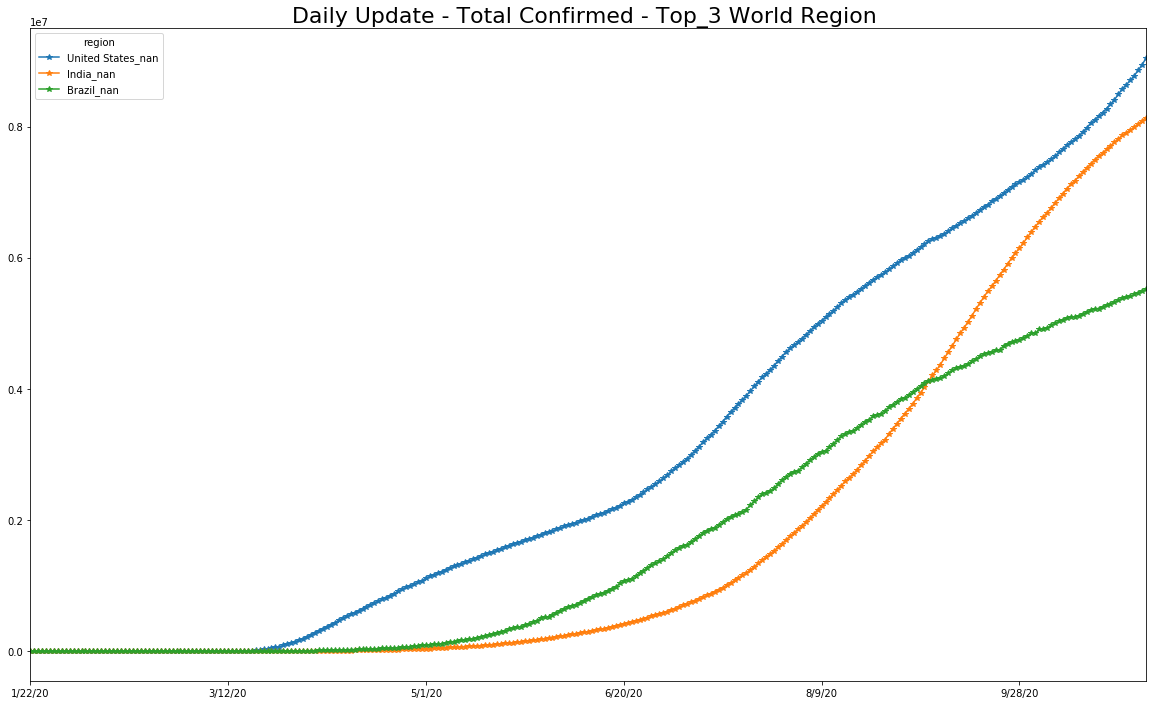

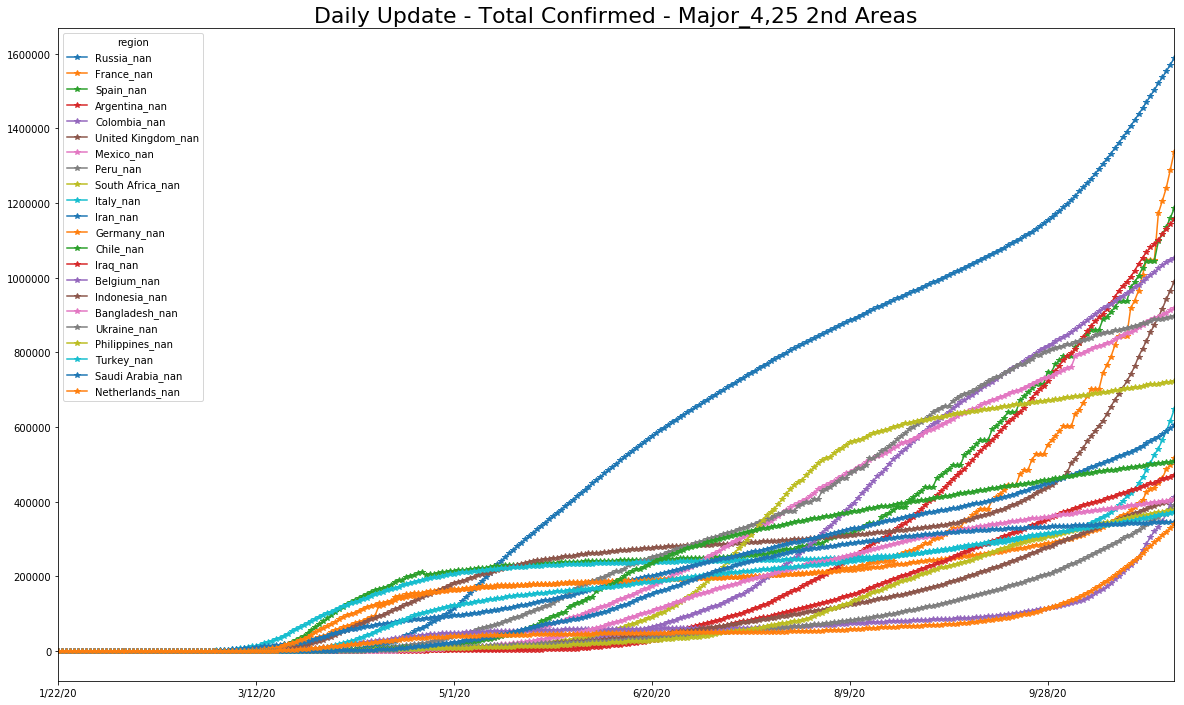

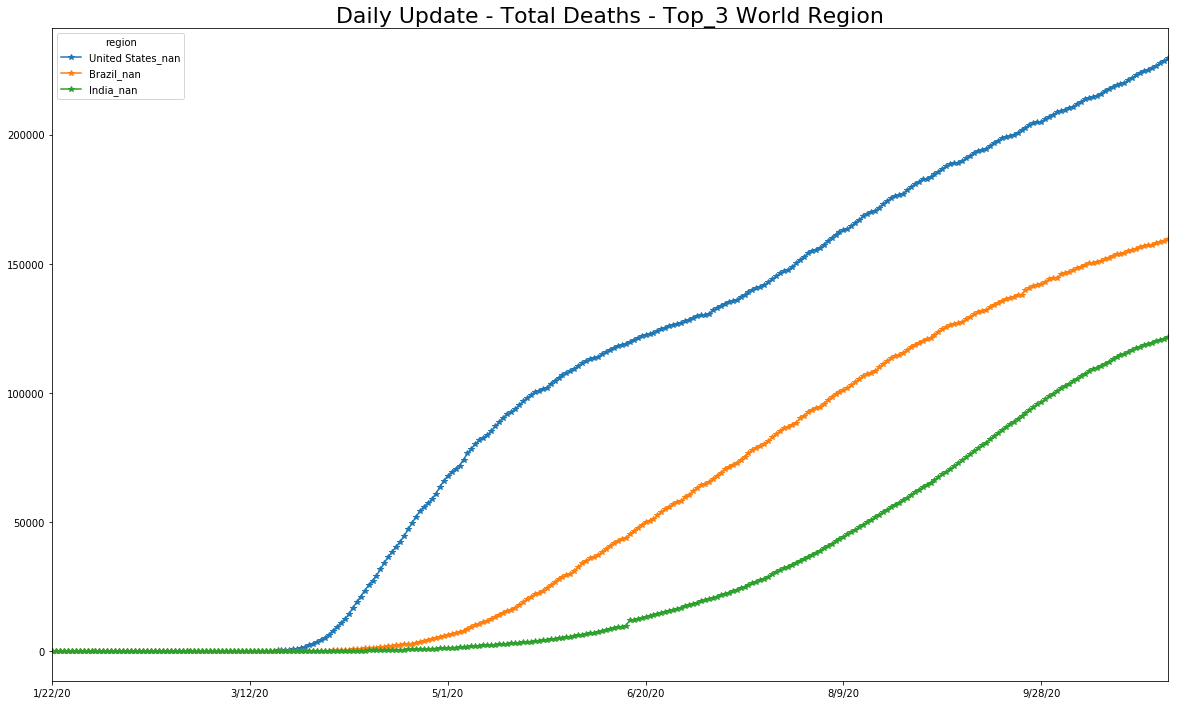

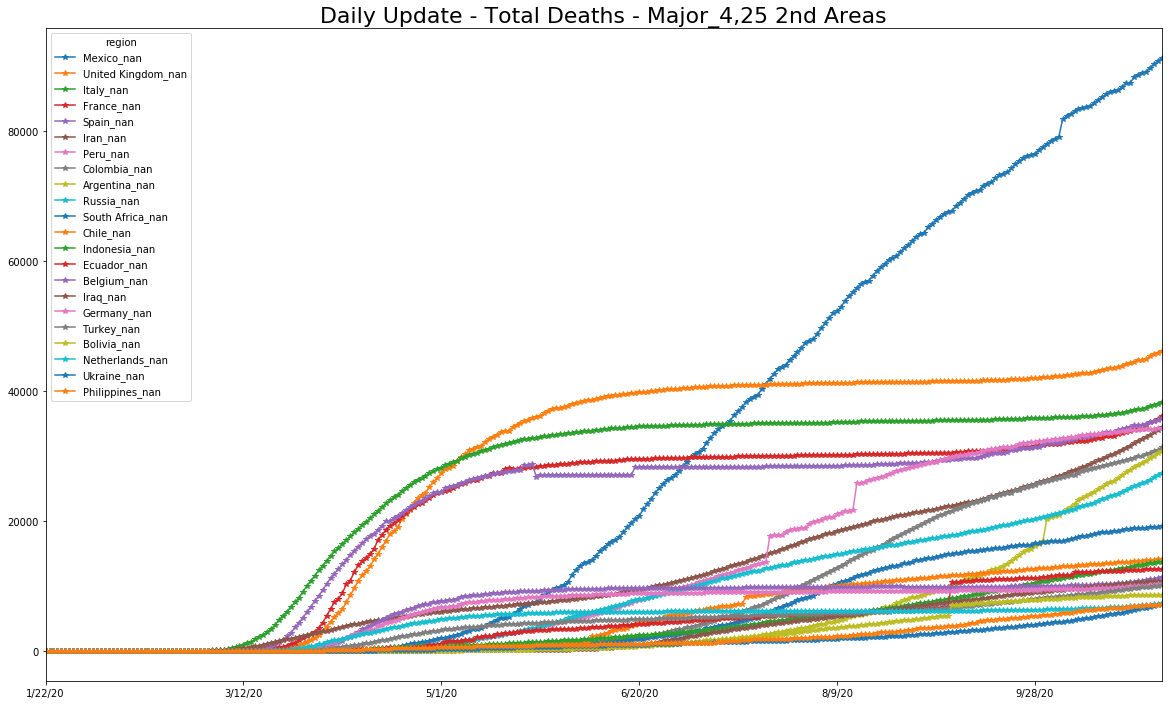

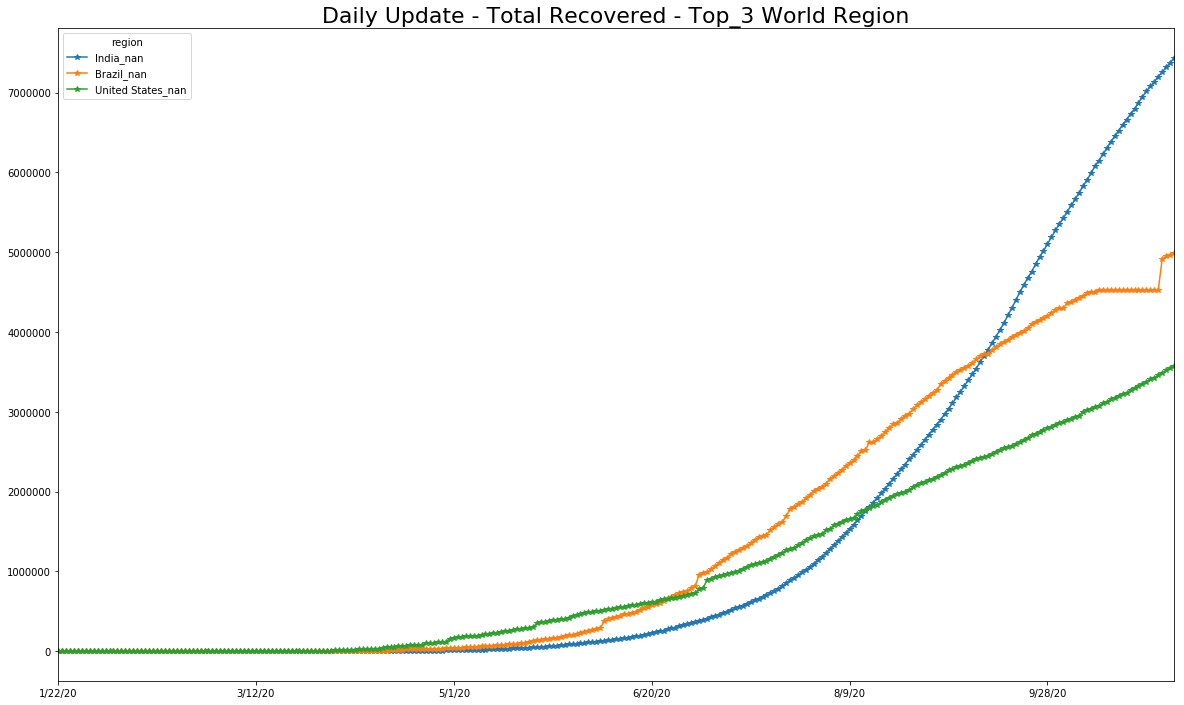

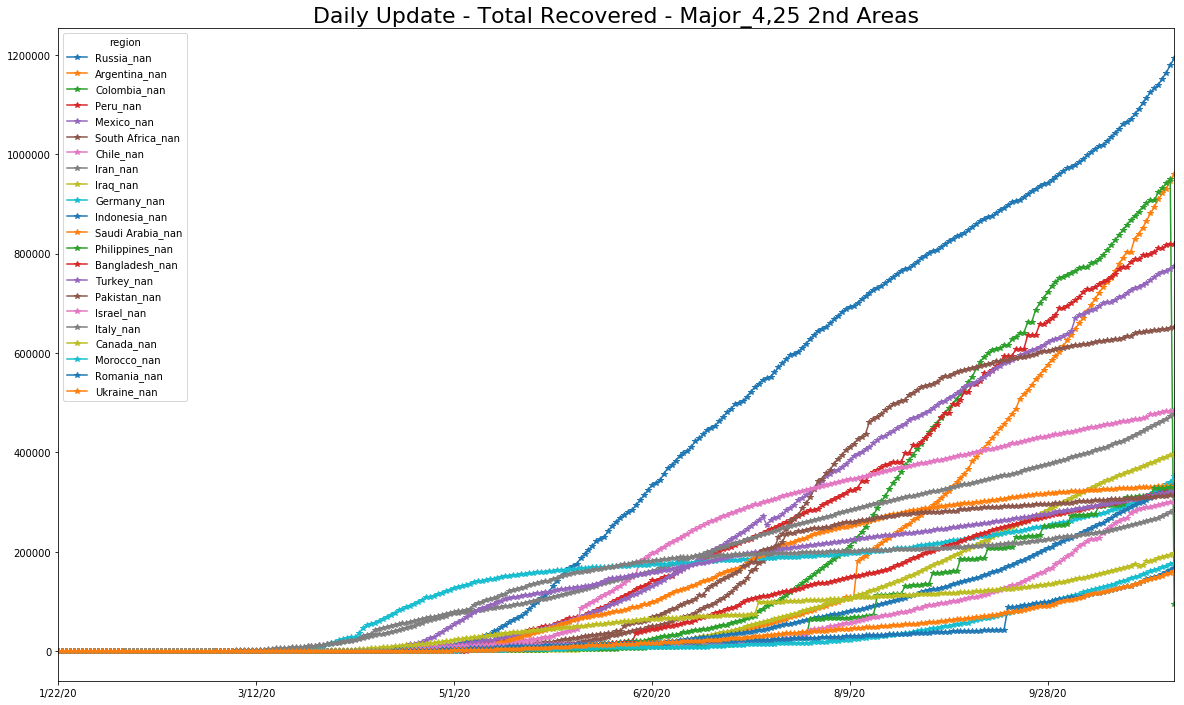

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/10/31


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [23]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
6/15/20            25527         1590        11031          853         142   
6/16/20            26310         1672        11147          854         148   
6/17/20            26874         1722        11268          854         155   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
6/15/20                       26          32785        17064   
6/16/20                       26          34159        17489   
6/17/20                       26          35552        18033   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
6/15/20                                     108                       3134   
6/16/20                                     108                       3135   
6/17/20                                     108                       3137   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
6/15/20  ...            2111291          848            5263           3062   
6/16/20  ...            2135088          849            5493           3150   
6/17/20  ...            2160997          849            5682           3386   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
6/15/20          334                     505                   9        844   
6/16/20          334                     514                   9        885   
6/17/20          335                     555                   9        902   

region   Zambia_nan  Zimbabwe_nan  
6/15/20        1382           387  
6/16/20        1405           391  
6/17/20        1412           401  

[3 rows x 268 columns]

In [24]:
ts[-4:]

region    Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
10/27/20            41032        19729        56706         4410        9871   
10/28/20            41145        20040        57026         4517       10074   
10/29/20            41268        20315        57332         4567       10269   
10/30/20            41334        20634        57651         4665       10558   

region    Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
10/27/20                      124        1116609        80410   
10/28/20                      124        1130533        82651   
10/29/20                      124        1143800        85034   
10/30/20                      127        1157179        87432   

region    Australia_Australian Capital Territory  Australia_New South Wales  \
10/27/20                                     114                       4406   
10/28/20                                     114                       4411   
10/29/20                                     114                       4417   
10/30/20                                     114                       4421   

region    ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
10/27/20  ...            8778055         2916           65881          90400   
10/28/20  ...            8856413         2981           66141          90876   
10/29/20  ...            8944934         3044           66392          91280   
10/30/20  ...            9044255         3082           66628          91589   

region    Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
10/27/20         1172                   51528                  10       2060   
10/28/20         1173                   51948                  10       2061   
10/29/20         1177                   52571                  10       2062   
10/30/20         1177                   53075                  10       2062   

region    Zambia_nan  Zimbabwe_nan  
10/27/20       16243          8315  
10/28/20       16285          8320  
10/29/20       16325          8349  
10/30/20       16415          8362  

[4 rows x 268 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-06-16  Afghanistan_nan      26310             0             0   
2     2020-06-17  Afghanistan_nan      26874           783             0   
3     2020-06-18  Afghanistan_nan      27532           564             0   
4     2020-06-19  Afghanistan_nan      27878           658          2005   
5     2020-06-20  Afghanistan_nan      28424           346          1568   
6     2020-06-21  Afghanistan_nan      28833           546          1550   
7     2020-06-22  Afghanistan_nan      29157           409          1301   
8     2020-06-23  Afghanistan_nan      29481           324          1279   
9     2020-06-24  Afghanistan_nan      29640           324          1057   
10    2020-06-25  Afghanistan_nan      30175           159           807   
11    2020-06-26  Afghanistan_nan      30451           535          1018   
12    2020-06-27  Afghanistan_nan      30616           276           970   
13    2020-06-28  Afghanistan_nan      30967           165           976   
14    2020-06-29  Afghanistan_nan      31238           351           792   
15    2020-06-30  Afghanistan_nan      31517           271           787   
16    2020-07-01  Afghanistan_nan      31836           279           901   
17    2020-07-02  Afghanistan_nan      32022           319           869   
18    2020-07-03  Afghanistan_nan      32324           186           784   
19    2020-07-04  Afghanistan_nan      32672           302           807   
20    2020-07-05  Afghanistan_nan      32951           348           836   
21    2020-07-06  Afghanistan_nan      33190           279           929   
22    2020-07-07  Afghanistan_nan      33384           239           866   
23    2020-07-08  Afghanistan_nan      33594           194           712   
24    2020-07-09  Afghanistan_nan      33908           210           643   
25    2020-07-10  Afghanistan_nan      34194           314           718   
26    2020-07-11  Afghanistan_nan      34366           286           810   
27    2020-07-12  Afghanistan_nan      34451           172           772   
28    2020-07-13  Afghanistan_nan      34455            85           543   
29    2020-07-14  Afghanistan_nan      34740             4           261   
30    2020-07-15  Afghanistan_nan      34994           285           374   
...          ...              ...        ...           ...           ...   
37917 2020-10-02     Zimbabwe_nan       7858            12            34   
37918 2020-10-03     Zimbabwe_nan       7885             8            21   
37919 2020-10-04     Zimbabwe_nan       7888            27            47   
37920 2020-10-05     Zimbabwe_nan       7898             3            38   
37921 2020-10-06     Zimbabwe_nan       7915            10            40   
37922 2020-10-07     Zimbabwe_nan       7919            17            30   
37923 2020-10-08     Zimbabwe_nan       7951             4            31   
37924 2020-10-09     Zimbabwe_nan       7994            32            53   
37925 2020-10-10     Zimbabwe_nan       8010            43            79   
37926 2020-10-11     Zimbabwe_nan       8011            16            91   
37927 2020-10-12     Zimbabwe_nan       8021             1            60   
37928 2020-10-13     Zimbabwe_nan       8036            10            27   
37929 2020-10-14     Zimbabwe_nan       8055            15            26   
37930 2020-10-15     Zimbabwe_nan       8075            19            44   
37931 2020-10-16     Zimbabwe_nan       8099            20            54   
37932 2020-10-17     Zimbabwe_nan       8110            24            63   
37933 2020-10-18     Zimbabwe_nan       8147            11            55   
37934 2020-10-19     Zimbabwe_nan       8159            37            72   
37935 2020-10-20     Zimbabwe_nan       8187            12            60   
37936 2020-10-21     Zimbabwe_nan       8215            28            77   
37937 2020-10-22     Zimbabwe_nan       8242            28  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
37946 2020-10-31  Zimbabwe_nan          0            13            47   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
37946           105         100.155827         100.565364         101.271769   

       last_day  kalman_prediction  population  infected_rate  min  max  
37946      8362             8377.0    14862924       0.000006  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
37944  2020-10-29  Zimbabwe_nan       8349             5            44   
37945  2020-10-30  Zimbabwe_nan       8362            29            46   
37946  2020-10-31  Zimbabwe_nan          0            13            47   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
37944           105         100.060253         100.531779         101.278271   
37945           107         100.348678         100.554137         101.298350   
37946           105         100.155827         100.565364         101.271769   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
37944                 8320  ...    14862924       0.000006  NaN  NaN   
37945                 8349  ...    14862924       0.000006  NaN  NaN   
37946                 8362  ...    14862924       0.000006  NaN  NaN   

       population_percentage : infected_rate confirmed  \
37944                                         0.000560   
37945                                         0.000562   
37946                                         0.000563   

       population_percentage : factor 9/10 infected_rate confirmed  \
37944                                           0.005598             
37945                                           0.005618             
37946                                           0.005627             

       delta : new_cases  delta : new_cases per 1M hab  \
37944               23.0                      1.547475   
37945               12.0                      0.807378   
37946               15.0                      1.009223   

       delta : roling 7day AVG  \
37944                15.000000   
37945                15.285714   
37946                15.000000   

       delta : aprox 14-day case notification rate per 100k hab  
37944                                           1.412912         
37945                                           1.439824         
37946                                           1.412912         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
258  United States_nan  6.019078e+11  775827.16204  77748.768116


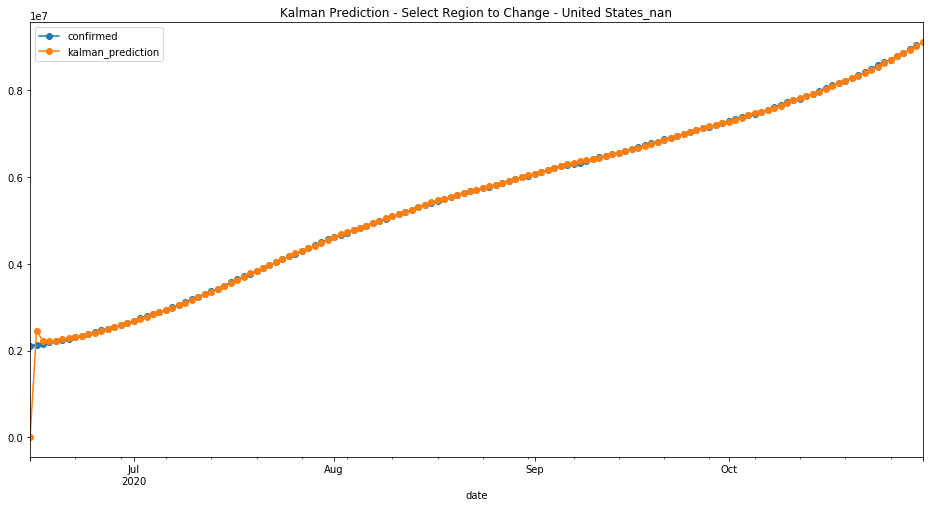

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
209  Russia_nan  1.870014e+10  136748.440555  13227.347826


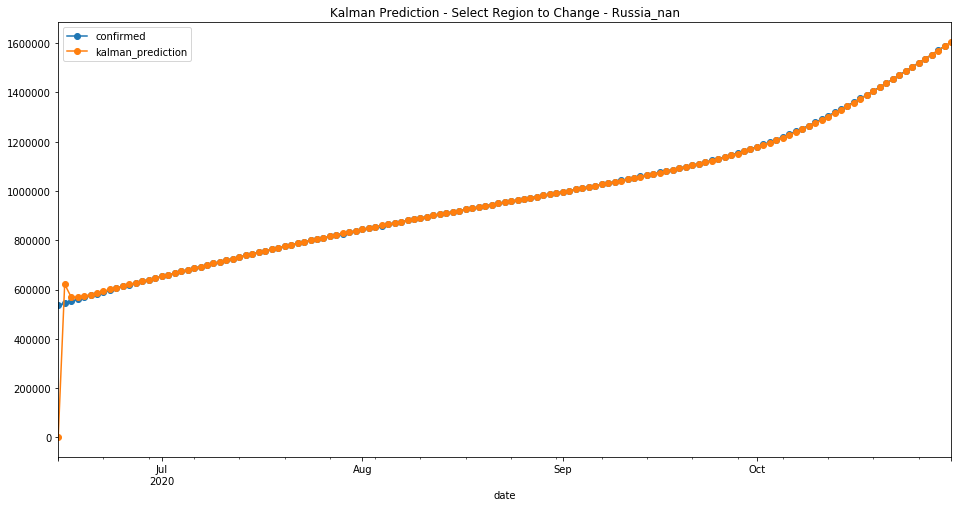

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  2.228327e+11  472051.636024  54993.891304


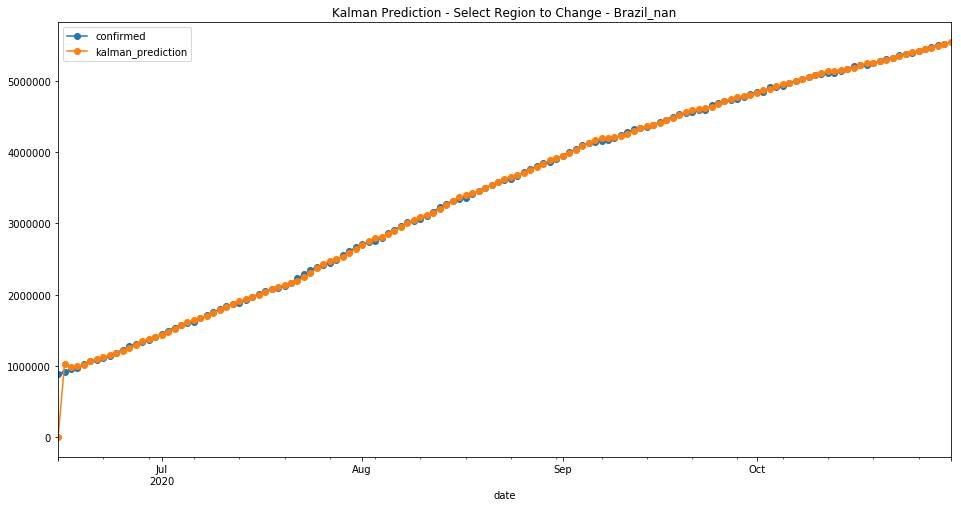

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
257  United Kingdom_nan  7.431622e+09  86206.85337  9080.072464


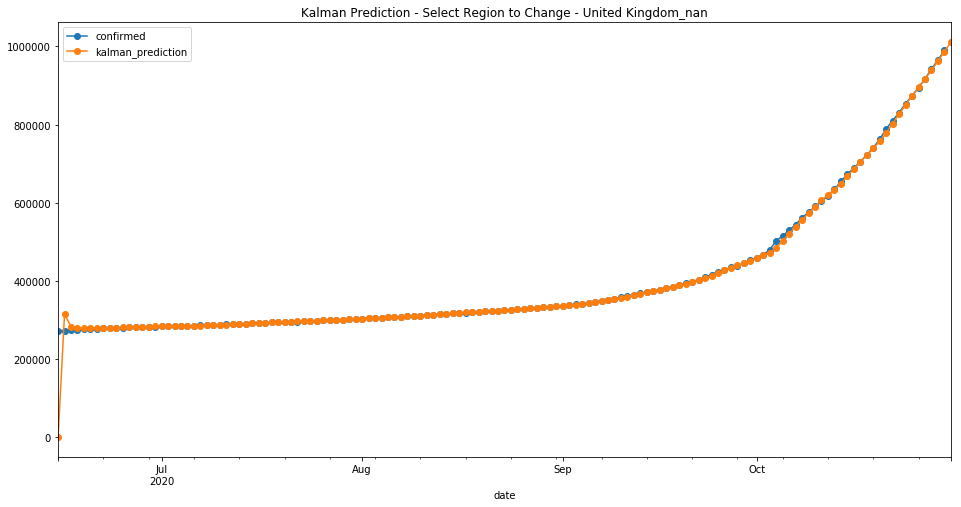

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9" 2020-10-20; OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpk9orpaj1
  JVM stdout: /tmp/tmpk9orpaj1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpk9orpaj1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    1 month and 2 days
H2O_cluster_name:           H2O_from_python_unknownUser_in7een
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.543 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.7 final
--------------------------  ------------------------------------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-10-19
last_train_date= 2020-10-30
first_bootstrap_date= 2020-10-22
boost_bootstrap_date= 2020-10-27
first_test_date= 2020-10-21
last_test_date= 2020-10-31
first_valid_date= 2020-10-29


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   40621.0      40626 2020-10-22  Afghanistan_nan
1   40745.0      40687 2020-10-23  Afghanistan_nan
2   40831.0      40768 2020-10-24  Afghanistan_nan
3   40925.0      40833 2020-10-25  Afghanistan_nan
4   40995.0      40937 2020-10-26  Afghanistan_nan
5   41093.0      41032 2020-10-27  Afghanistan_nan
6   41183.0      41145 2020-10-28  Afghanistan_nan
7   41293.0      41268 2020-10-29  Afghanistan_nan
8   41416.0      41334 2020-10-30  Afghanistan_nan
9   41493.0          0 2020-10-31  Afghanistan_nan
10  18295.0      18250 2020-10-22      Albania_nan
11  18614.0      18556 2020-10-23      Albania_nan
12  18931.0      18858 2020-10-24      Albania_nan
13  19244.0      19157 2020-10-25      Albania_nan
14  19552.0      19445 2020-10-26      Albania_nan
15  19849.0      19729 2020-10-27      Albania_nan
16  20136.0      20040 2020-10-28      Albania_nan
17  20437.0      20315 2020-10-29      Albania_nan
18  20721.0      20634 2020-10-30      Albania_nan
19  21027.0          0 2020-10-31      Albania_nan
20  55334.0      55357 2020-10-22      Algeria_nan
21  55614.0      55630 2020-10-23      Algeria_nan
22  55898.0      55880 2020-10-24      Algeria_nan
23  56165.0      56143 2020-10-25      Algeria_nan
24  56443.0      56419 2020-10-26      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  51324.0      51149 2020-10-27  Azerbaijan_nan
176  52047.0      52137 2020-10-28  Azerbaijan_nan
177  53000.0      53152 2020-10-29  Azerbaijan_nan
178  53987.0      54174 2020-10-30  Azerbaijan_nan
179  55034.0          0 2020-10-31  Azerbaijan_nan
180   6145.0       6135 2020-10-22     Bahamas_nan
181   6292.0       6268 2020-10-23     Bahamas_nan
182   6365.0       6268 2020-10-24     Bahamas_nan
183   6529.0       6410 2020-10-25     Bahamas_nan
184   6495.0       6410 2020-10-26     Bahamas_nan
185   6650.0       6502 2020-10-27     Bahamas_nan
186   6625.0       6549 2020-10-28     Bahamas_nan
187   6703.0       6607 2020-10-29     Bahamas_nan
188   6742.0       6644 2020-10-30     Bahamas_nan
189   6789.0          0 2020-10-31     Bahamas_nan
190  79750.0      79211 2020-10-22     Bahrain_nan
191  80053.0      79574 2020-10-23     Bahrain_nan
192  80427.0      79975 2020-10-24     Bahrain_nan
193  80828.0      80255 2020-10-25     Bahrain_nan
194  81120.0      80533 2020-10-26     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220   90409.0      90380 2020-10-22  Belarus_nan
221   91143.0      91167 2020-10-23  Belarus_nan
222   91943.0      91978 2020-10-24  Belarus_nan
223   92777.0      92823 2020-10-25  Belarus_nan
224   93652.0      93707 2020-10-26  Belarus_nan
225   94569.0      94609 2020-10-27  Belarus_nan
226   95507.0      95545 2020-10-28  Belarus_nan
227   96482.0      96529 2020-10-29  Belarus_nan
228   97503.0      97499 2020-10-30  Belarus_nan
229   98510.0          0 2020-10-31  Belarus_nan
230  264023.0     270132 2020-10-22  Belgium_nan
231  280857.0     287700 2020-10-23  Belgium_nan
232  298934.0     305409 2020-10-24  Belgium_nan
233  317995.0     321031 2020-10-25  Belgium_nan
234  335246.0     333718 2020-10-26  Belgium_nan
235  349518.0     347289 2020-10-27  Belgium_nan
236  364281.0     368337 2020-10-28  Belgium_nan
237  385782.0     392258 2020-10-29  Belgium_nan
238  409359.0     412314 2020-10-30  Belgium_nan
239  429846.0          0 2020-10-31  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [max, min]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |████████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  754782742.3242189
# MSE on the validation data =  1597547954812.9805
# R^2 on the training data =  0.9995999475105843
# R^2 on the validation data =  0.4651141317038452


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1604124448679_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0           17583185.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       21.0       23.0       22.95      1989.0      2912.0     2751.136



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 754782742.3242189
RMSE: 27473.309635430145
MAE: 3508.2078465777076
RMSLE: 0.2665089852678392
Mean Residual Deviance: 754782742.3242189

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 1597547954812.9805
RMSE: 1263941.4364649102
MAE: 315198.5295516485
RMSLE: 6.952803066069619
Mean Residual Deviance: 1597547954812.9805

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2020-10-31 06:07:35   0.057 sec              0.0            NaN   
1     2020-10-31 06:07:35   0.369 sec              1.0   55749.388677   
2     2020-10-31 06:07:35   0.497 sec              2.0   52035.842907   
3     2020-10-31 06:07:35   0.574 sec              3.0   48166.966439   
4     2020-10-31 06:07:35   0.781 sec              4.0   52377.990374   
5     2020-10-31 06:07:35   0.928 sec              5.0   49301.641848   
6     2020-10-31 06:07:35   0.972 sec              6.0   47421.929879   
7     2020-10-31 06:07:36   1.028 sec              7.0   46437.621631   
8     2020-10-31 06:07:36   1.087 sec              8.0   47896.262401   
9     2020-10-31 06:07:36   1.130 sec              9.0   44089.083490   
10    2020-10-31 06:07:36   1.171 sec             10.0   41596.217070   
11    2020-10-31 06:07:36   1.261 sec             11.0   41279.742735   
12    2020-10-31 06:07:36   1.356 sec             12.0   41430.743392   
13    2020-10-31 06:07:36   1.406 sec             13.0   41232.640891   
14    2020-10-31 06:07:36   1.461 sec             14.0   41678.961951   
15    2020-10-31 06:07:36   1.515 sec             15.0   41555.211600   
16    2020-10-31 06:07:36   1.570 sec             16.0   40217.184582   
17    2020-10-31 06:07:36   1.623 sec             17.0   41423.676295   
18    2020-10-31 06:07:36   1.673 sec             18.0   37152.225372   
19    2020-10-31 06:07:36   1.718 sec             19.0   37658.071740   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0            NaN                NaN              NaN             NaN   
1   11927.098175       3.107994e+09     1.182659e+06   323579.197947   
2   11283.261286       2.707729e+09     1.216214e+06   315724.456702   
3   10018.332656       2.320057e+09     1.239808e+06   317121.970902   
4    9328.961023       2.743454e+09     1.252694e+06   316585.639676   
5    8823.883922       2.430652e+09     1.261735e+06   317325.763139   
6    8380.213025       2.248839e+09     1.266453e+06   318307.032768   
7    8330.367869       2.156453e+09     1.269876e+06   317617.538494   
8    8142.855056       2.294052e+09     1.271154e+06   317580.994375   
9    7492.118641       1.943847e+09     1.273773e+06   317819.869665   
10   7144.100226       1.730245e+09     1.276492e+06   317949.127558   
11   7006.106602       1.704017e+09     1.278194e+06   317805.843344   
12   6876.129719       1.716506e+09     1.261475e+06   315112.277257   
13   6776.285244       1.700131e+09     1.254656e+06   313761.778629   
14   6894.063037       1.737136e+09     1.257742e+06   315000.119905   
15   6754.450898       1.726836e+09     1.260232e+06   315107.508080   
16   6479.011157       1.617422e+09     1.260761e+06   315629.491314   
17   6496.545318       1.715921e+09     1.262444e+06   315769.174498   
18   6194.618546       1.380288e+09     1.263934e+06   315755.376628   
19   6187.260952       1.418130e+09     1.263916e+06   315493.042888   

    validation_deviance  
0                   NaN  
1          1.398683e+12  
2          1.479177e+12  
3          1.537124e+12  
4          1.569242e+12  
5          1.591975e+12  
6          1.603903e+12  
7          1.612585e+12  
8          1.615833e+12  
9          1.622497e+12  
10         1.629432e+12  
11         1.633780e+12  
12         1.591320e+12  
13         1.574161e+12  
14         1.581916e+12  
15         1.588184e+12  
16         1.589518e+12  
17         1.593764e+12  
18         1.597530e+12  
19         1.597484e+12


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           last_day         1.510093e+18           1.000000    0.314073
1  kalman_prediction         1.299423e+18           0.860492    0.270257
2             region         6.549939e+17           0.433744    0.136227
3       7_day_change         5.963379e+17           0.394901    0.124028
4       3_day_change         3.238098e+17           0.214430    0.067347
5       1_day_change         2.378866e+17           0.157531    0.049476
6      infected_rate         5.651675e+16           0.037426    0.011755
7  3_day_change_rate         4.642266e+16           0.030742    0.009655
8  1_day_change_rate         4.584500e+16           0.030359    0.009535
9  7_day_change_rate         3.676617e+16           0.024347    0.007647

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0           last_day         1.510093e+18           1.000000    0.314073
1  kalman_prediction         1.299423e+18           0.860492    0.270257
2             region         6.549939e+17           0.433744    0.136227
3       7_day_change         5.963379e+17           0.394901    0.124028
4       3_day_change         3.238098e+17           0.214430    0.067347
5       1_day_change         2.378866e+17           0.157531    0.049476
6      infected_rate         5.651675e+16           0.037426    0.011755
7  3_day_change_rate         4.642266e+16           0.030742    0.009655
8  1_day_change_rate         4.584500e+16           0.030359    0.009535
9  7_day_change_rate         3.676617e+16           0.024347    0.007647

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


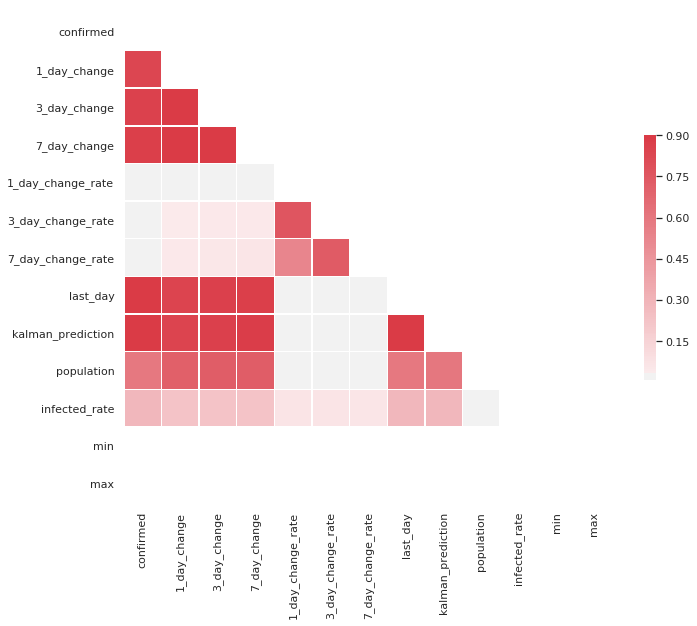

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.839509
3_day_change         0.858466
7_day_change         0.871236
1_day_change_rate    0.021070
3_day_change_rate    0.022336
7_day_change_rate    0.023096
last_day             0.989214
kalman_prediction    0.989614
population           0.595956
infected_rate        0.281516
min                       NaN
max                       NaN
Name: confirmed, dtype: float64


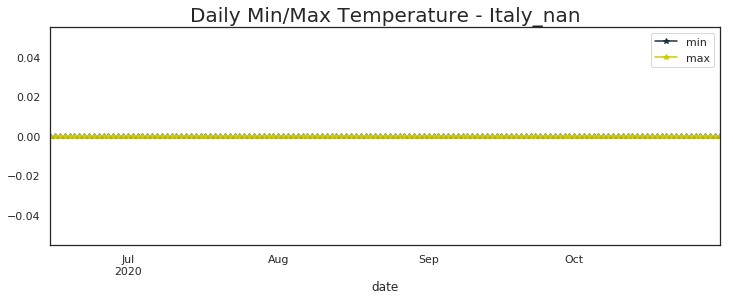

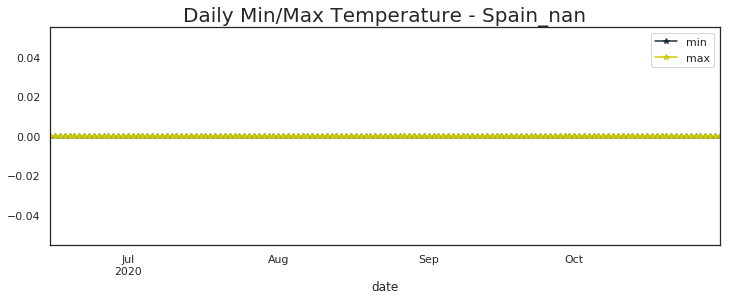

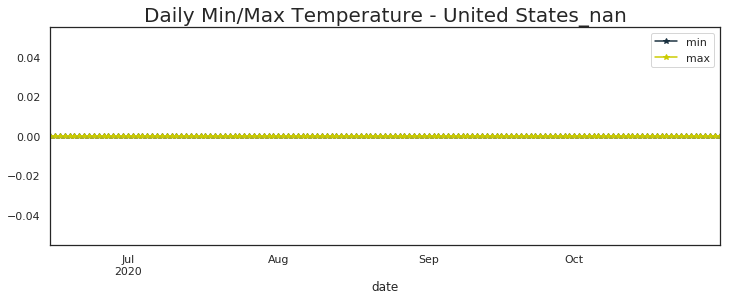

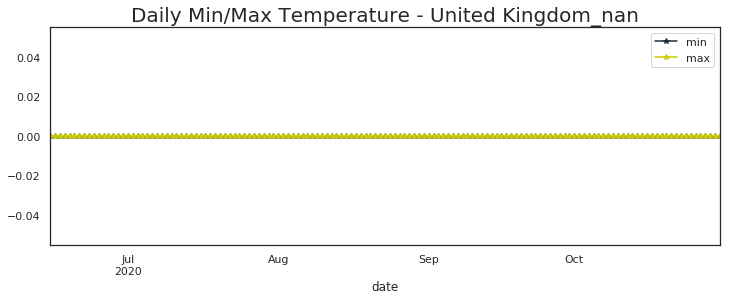

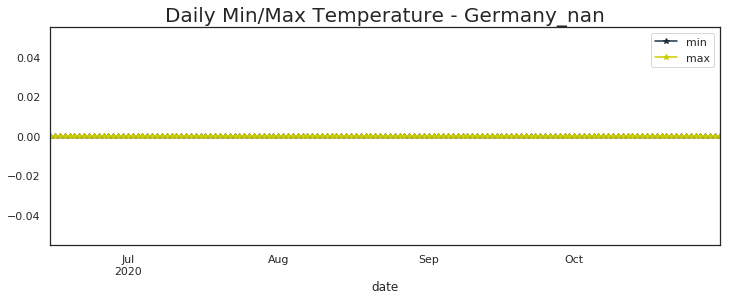

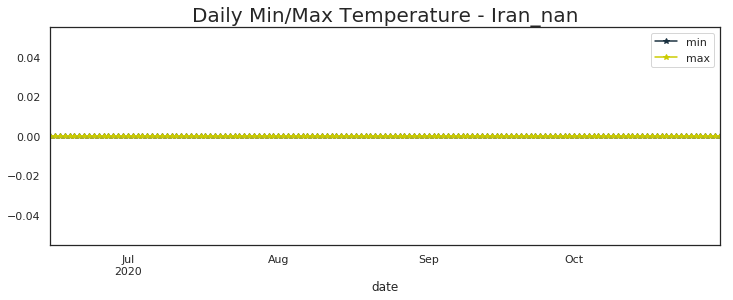

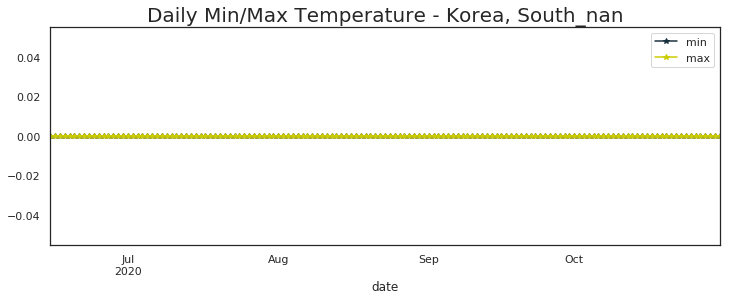

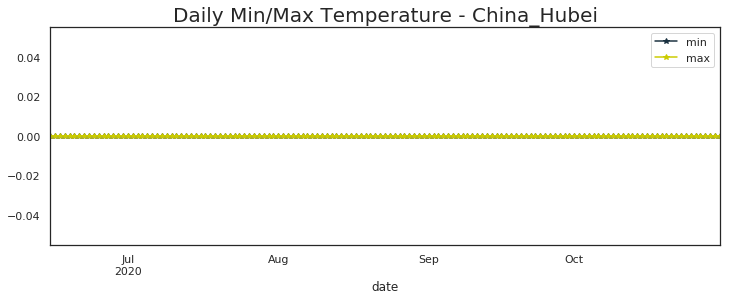

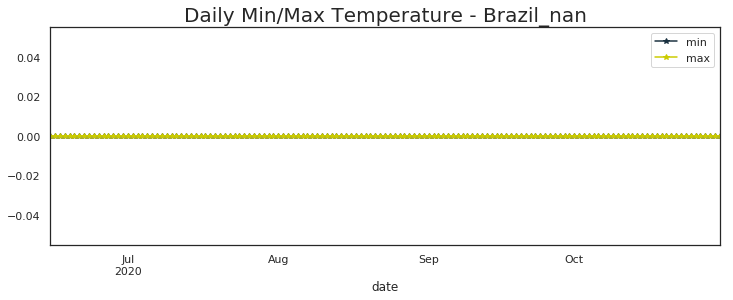

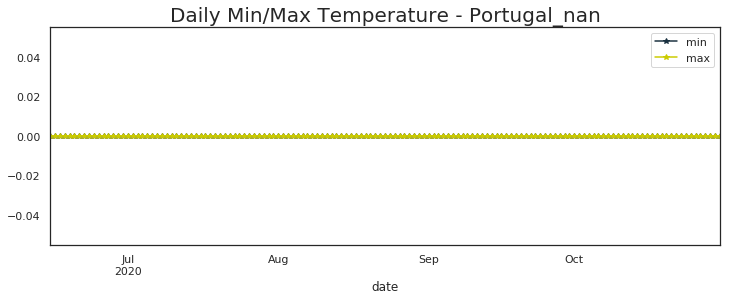

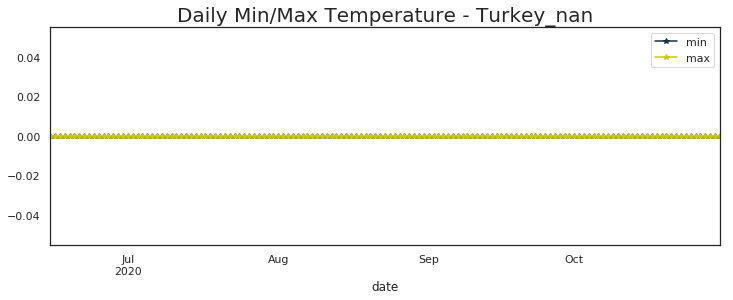

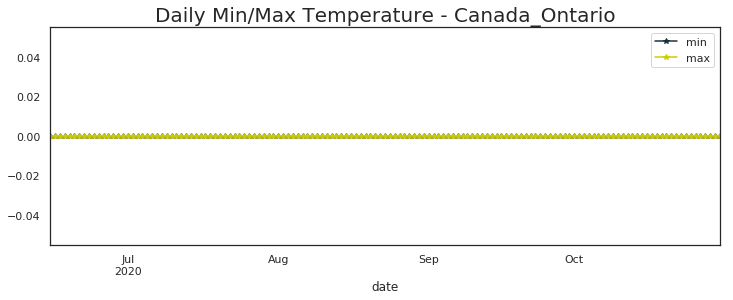

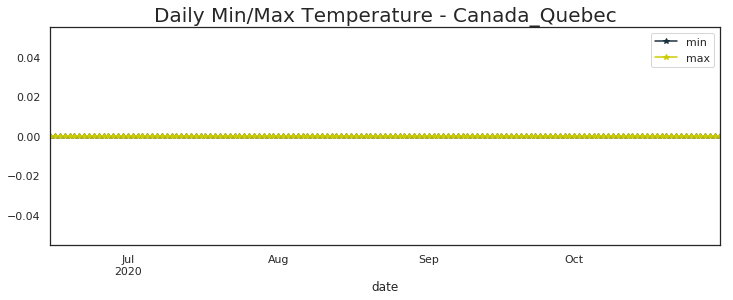

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                            min  max
region                              
United States_nan           0.0  0.0
India_nan                   0.0  0.0
Brazil_nan                  0.0  0.0
Russia_nan                  0.0  0.0
France_nan                  0.0  0.0
Spain_nan                   0.0  0.0
Argentina_nan               0.0  0.0
Colombia_nan                0.0  0.0
United Kingdom_nan          0.0  0.0
Mexico_nan                  0.0  0.0
Peru_nan                    0.0  0.0
South Africa_nan            0.0  0.0
Italy_nan                   0.0  0.0
Iran_nan                    0.0  0.0
Germany_nan                 0.0  0.0
Chile_nan                   0.0  0.0
Iraq_nan                    0.0  0.0
Belgium_nan                 0.0  0.0
Indonesia_nan               0.0  0.0
Bangladesh_nan              0.0  0.0
Ukraine_nan                 0.0  0.0
Philippines_nan             0.0  0.0
Turkey_nan                  0.0  0.0
Saudi Arabia_nan            0.0  0.0
Ne

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

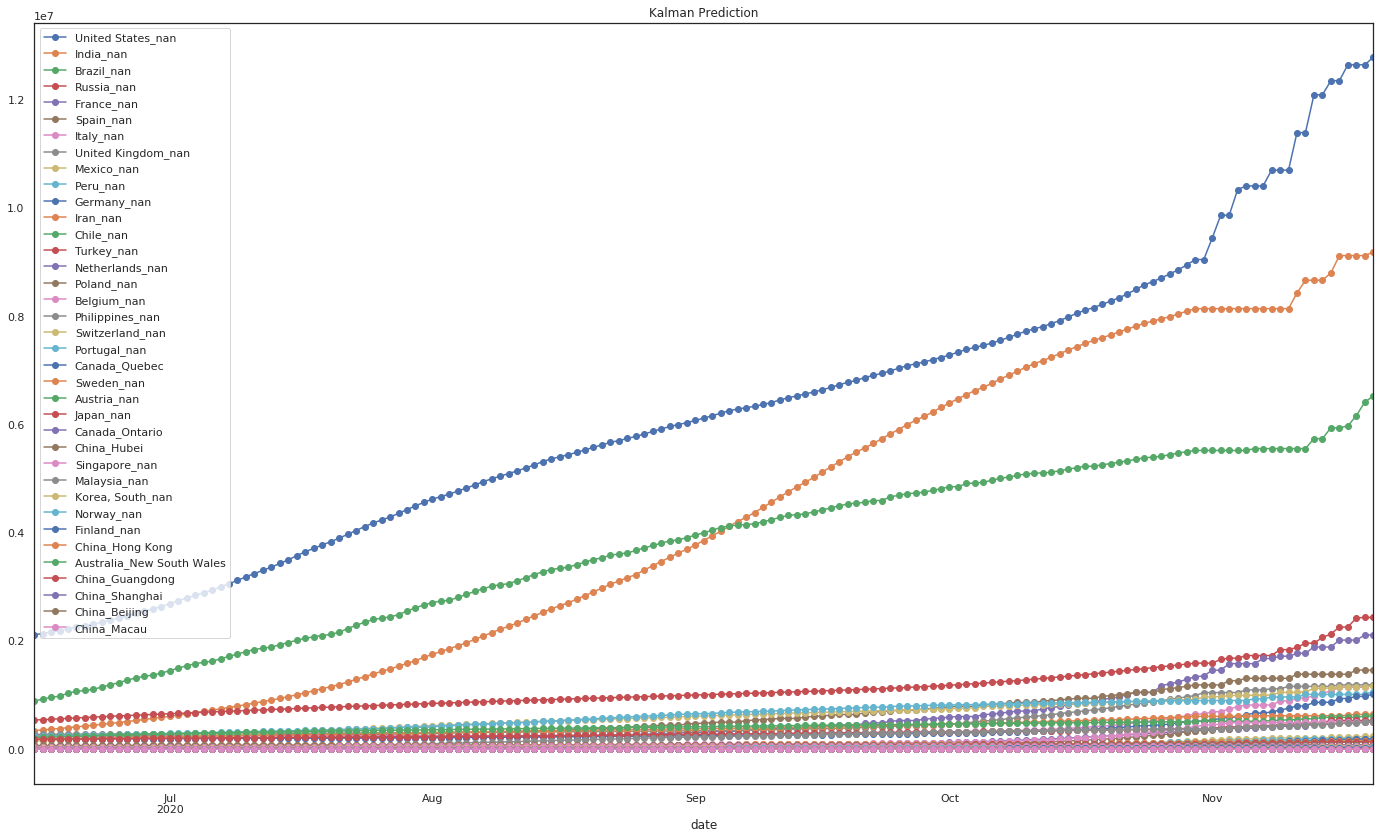

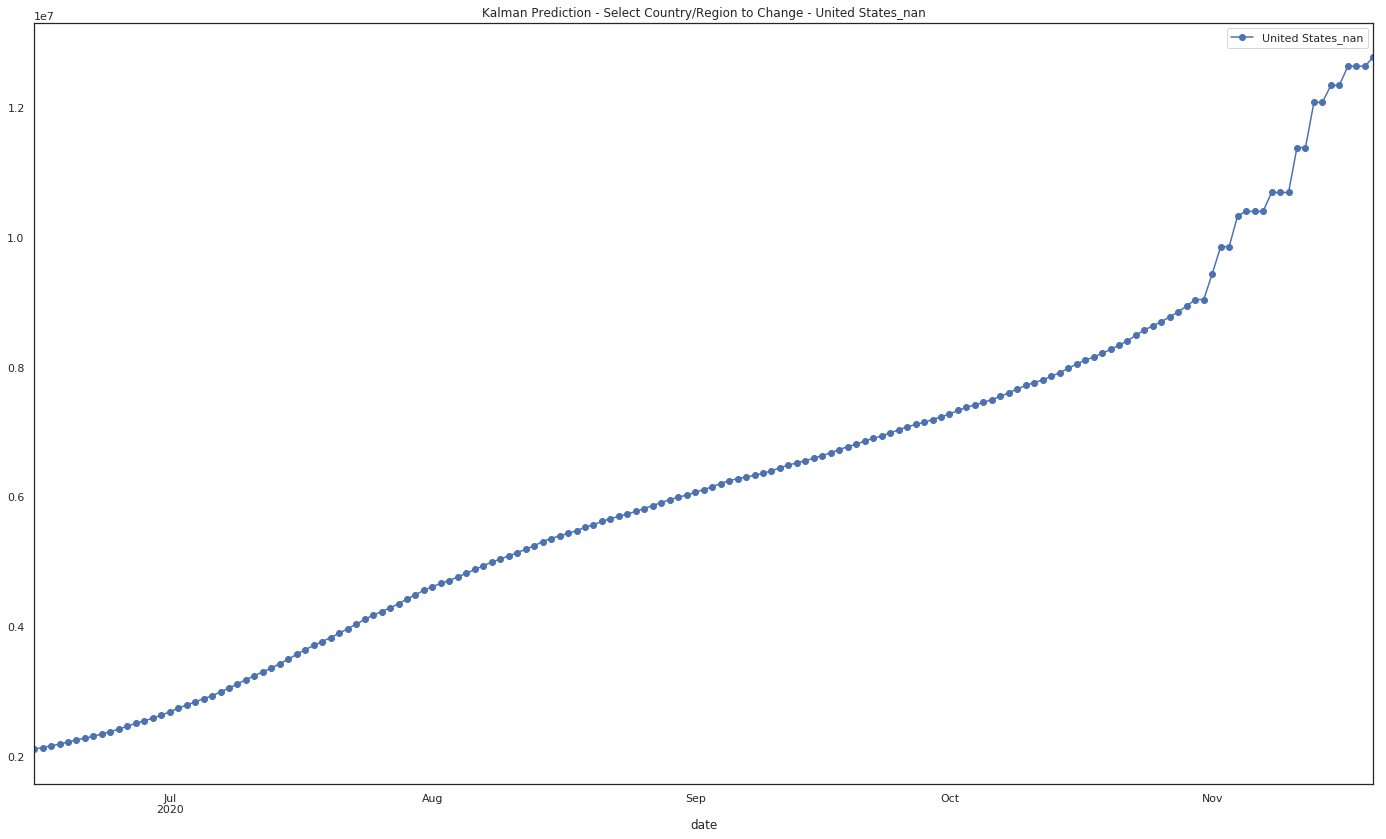

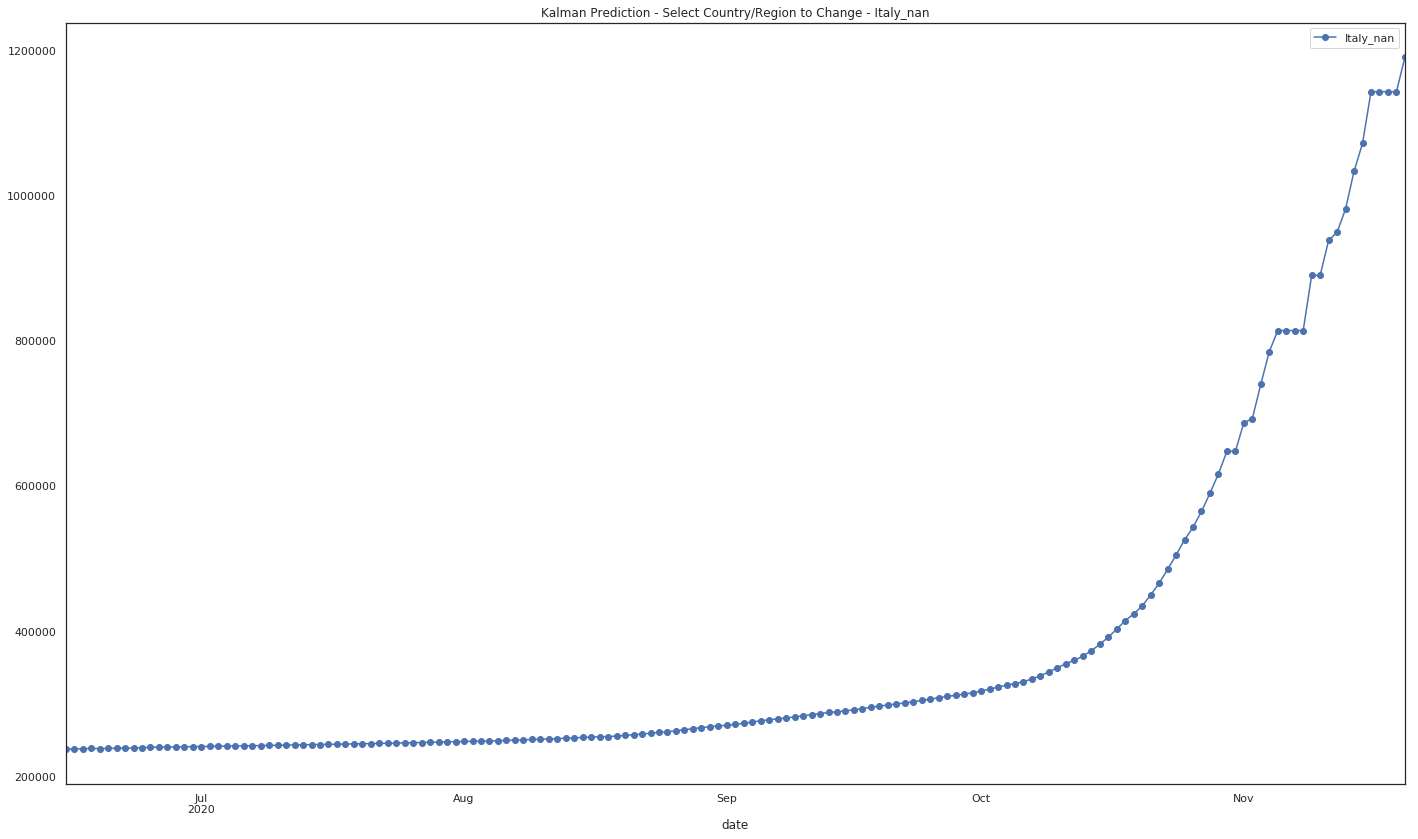

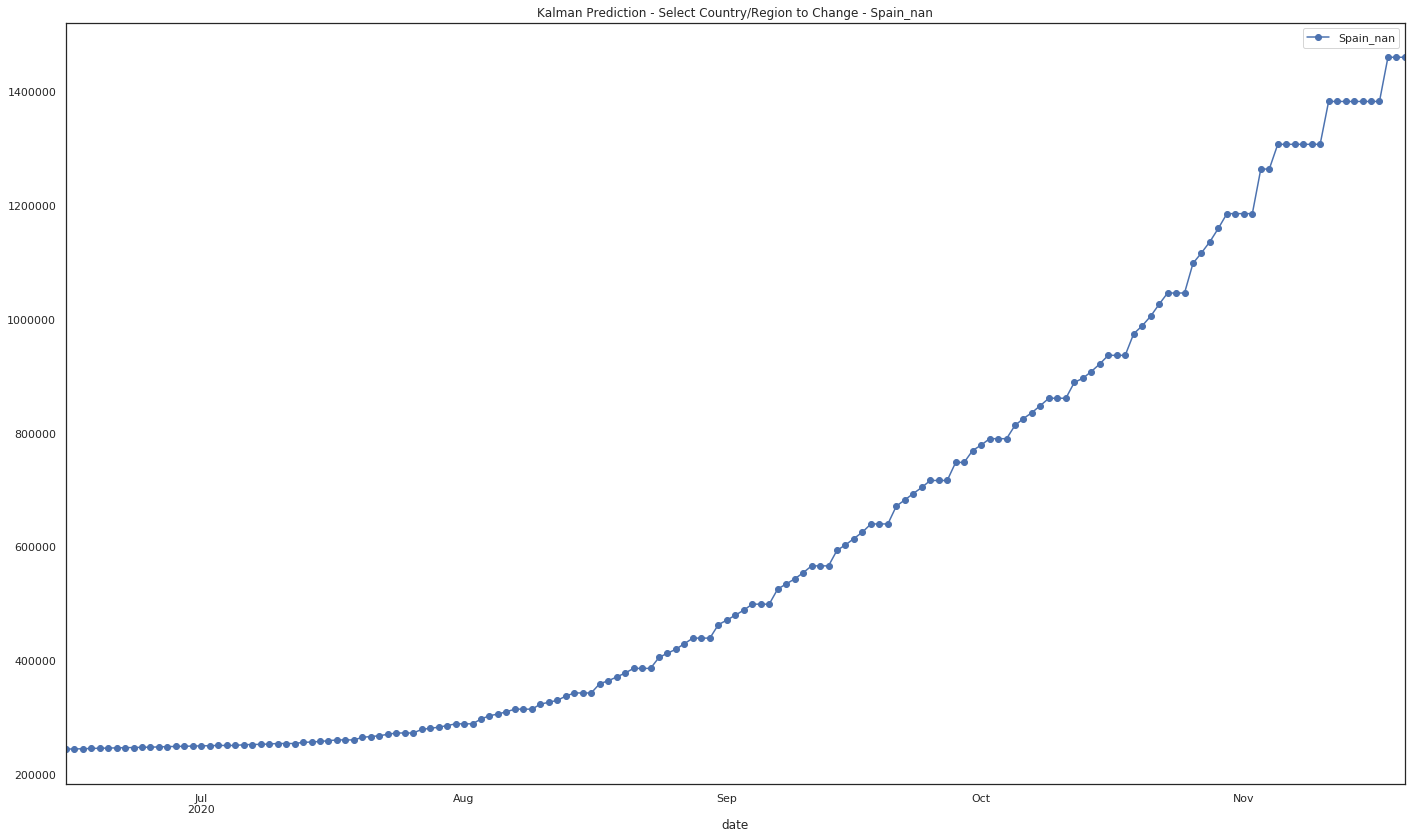

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


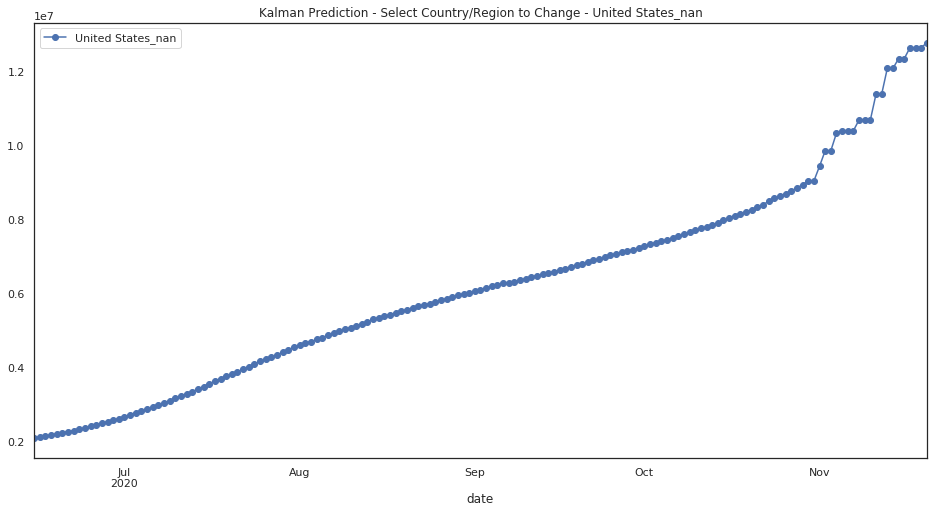

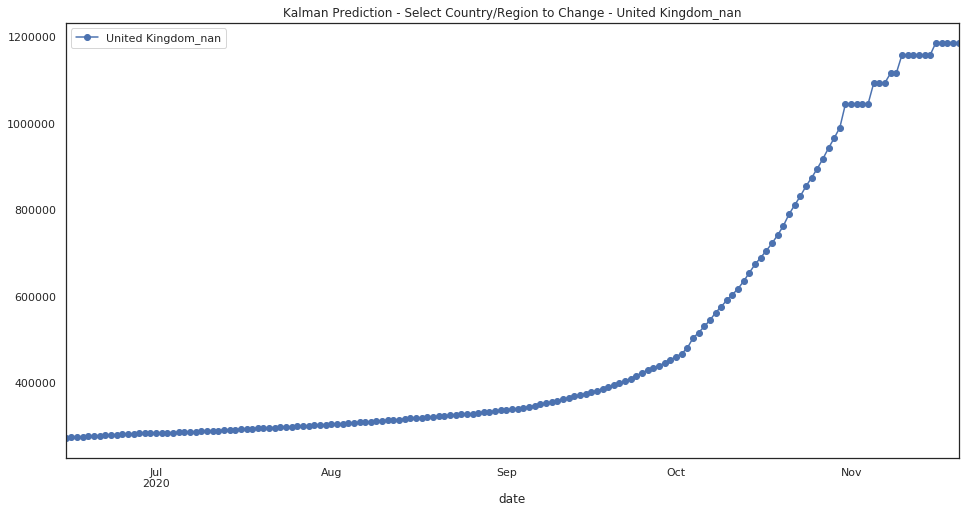

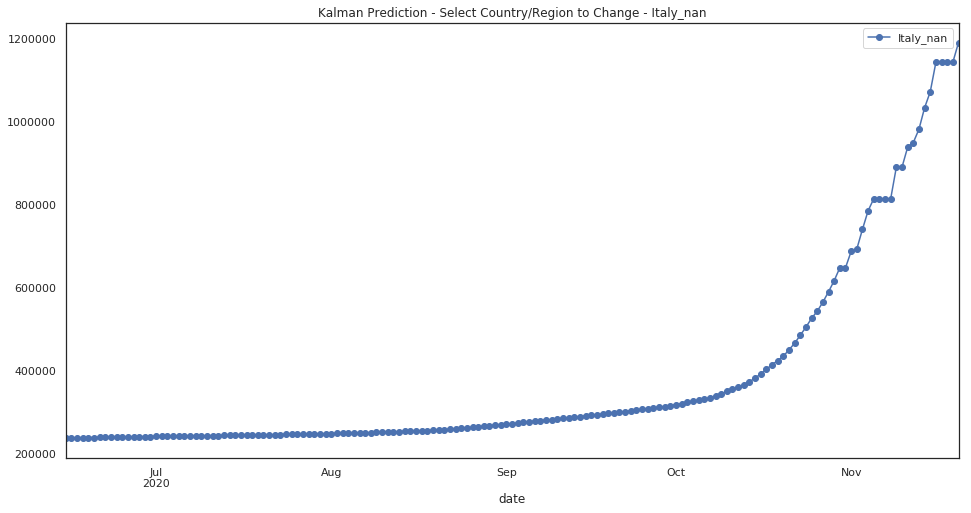

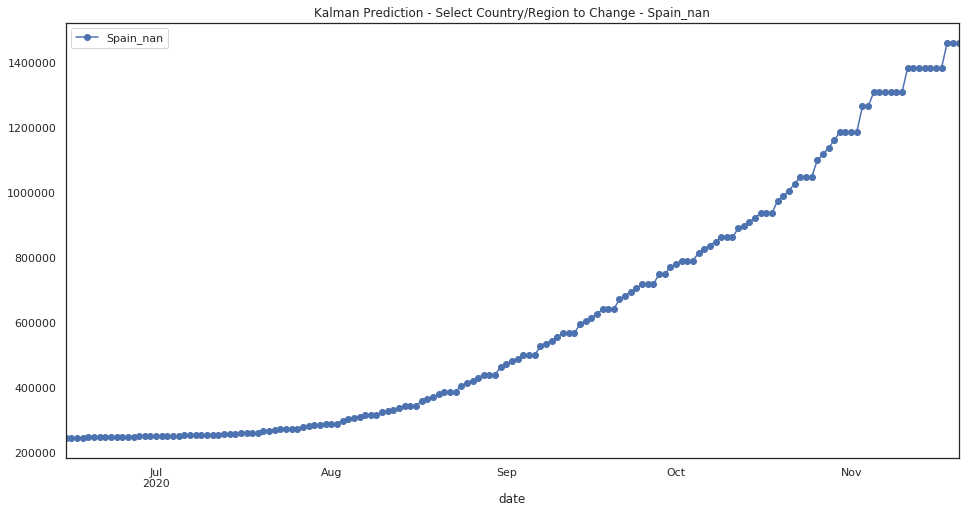

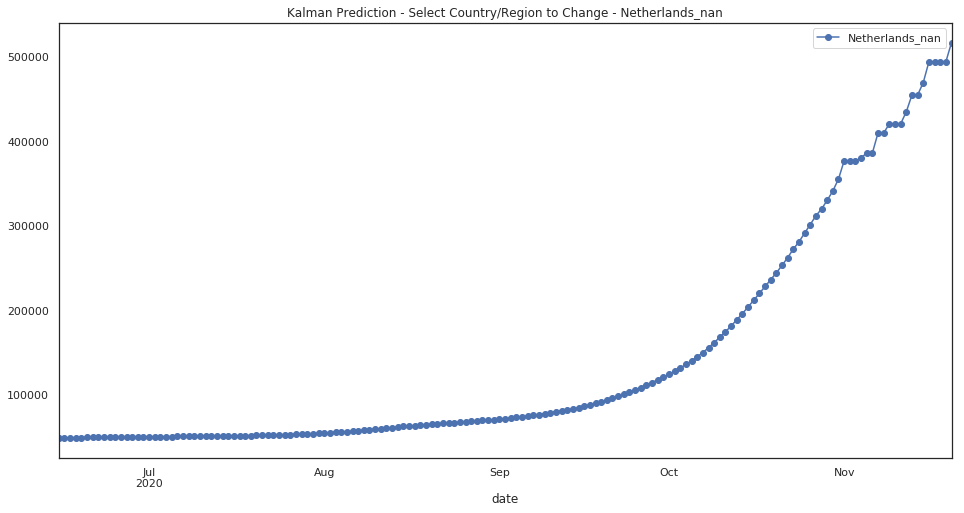

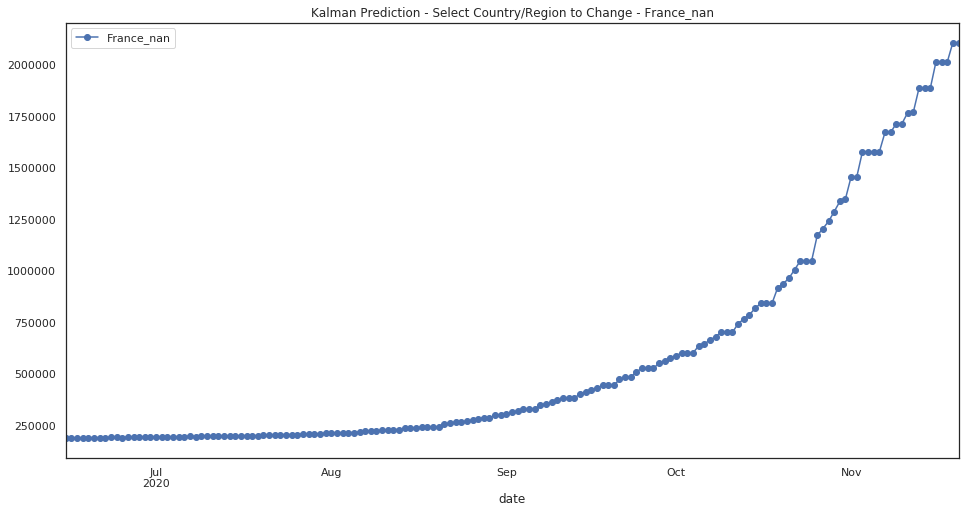

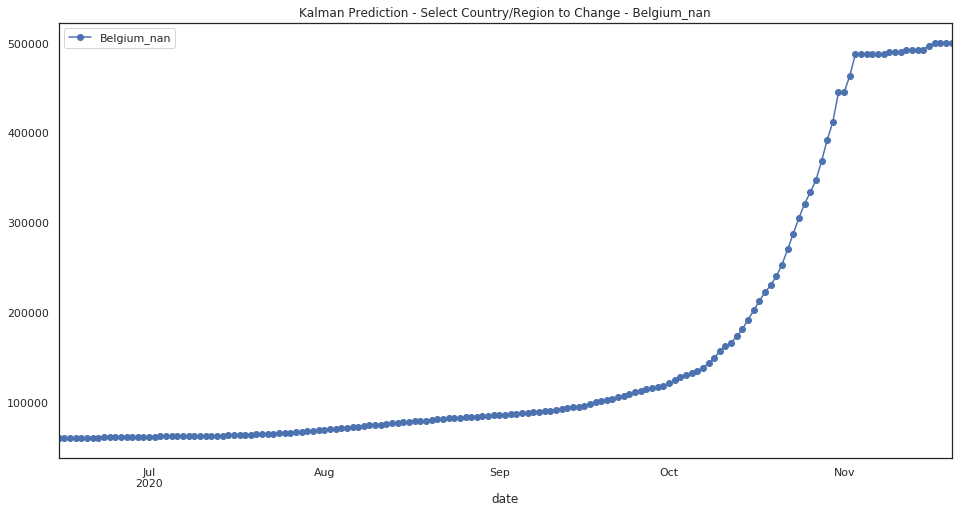

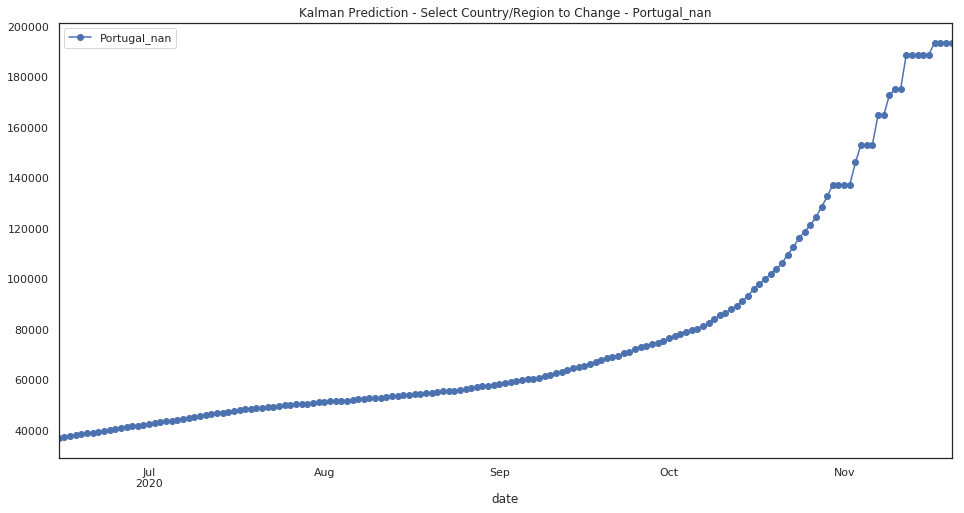

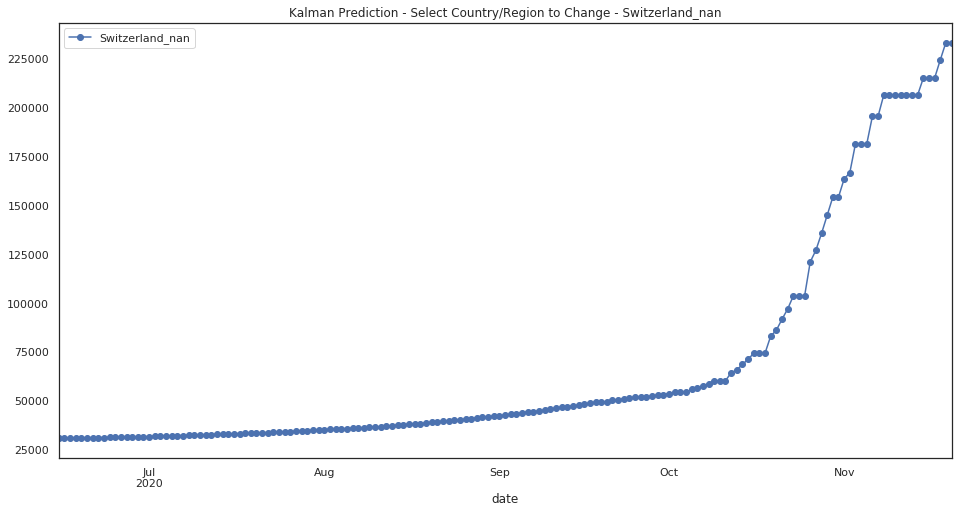

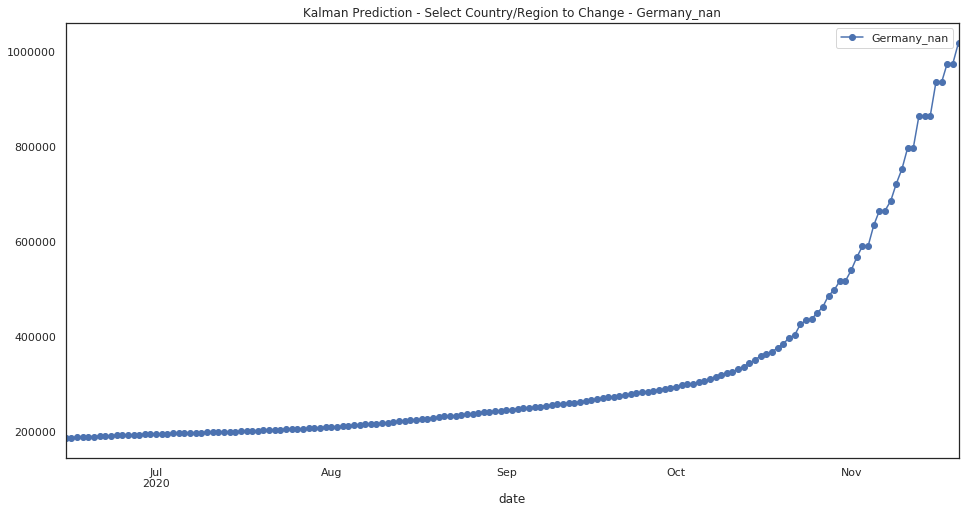

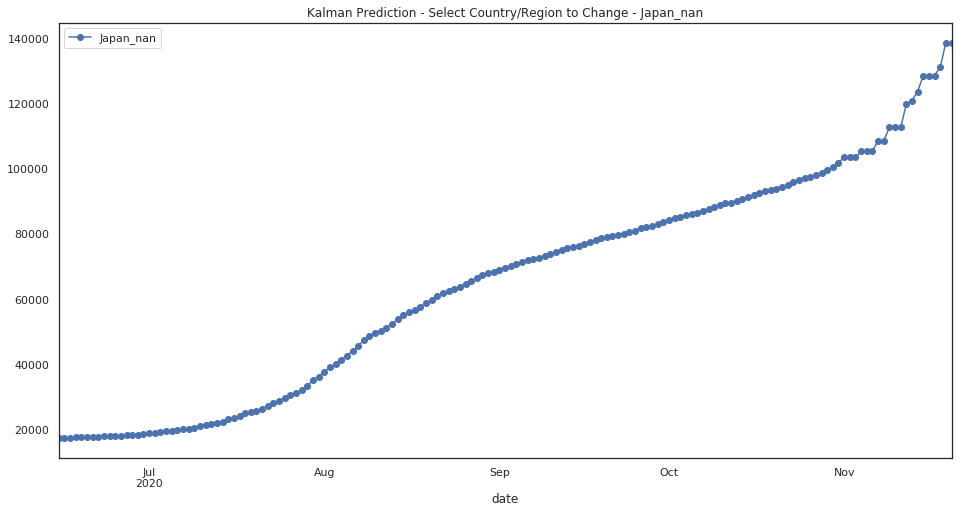

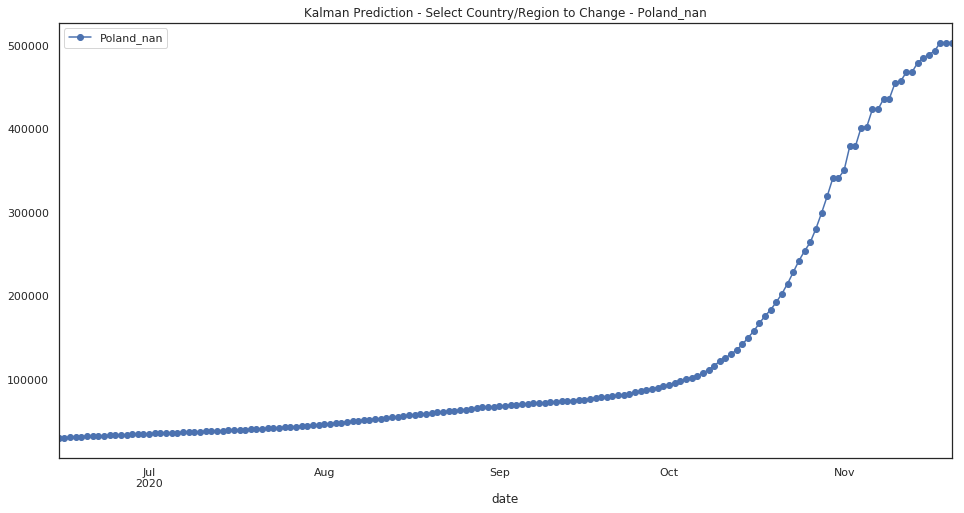

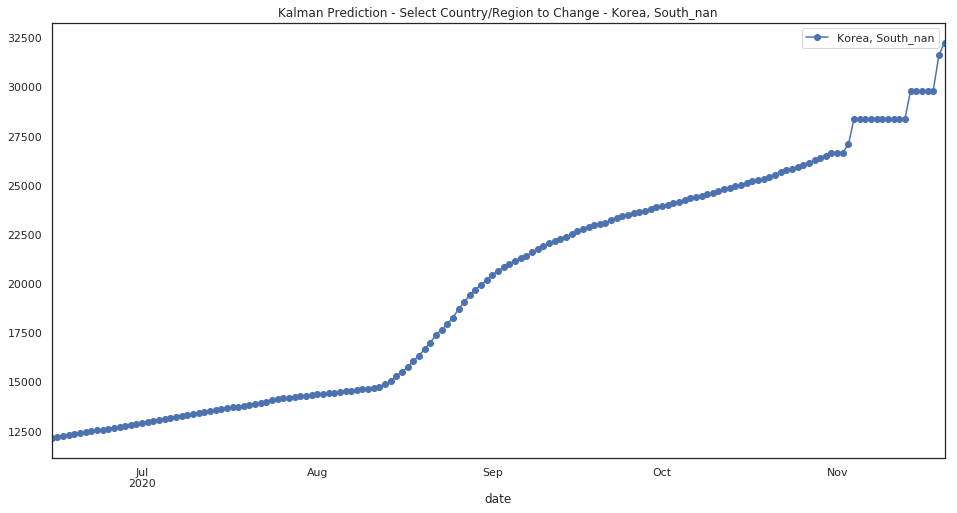

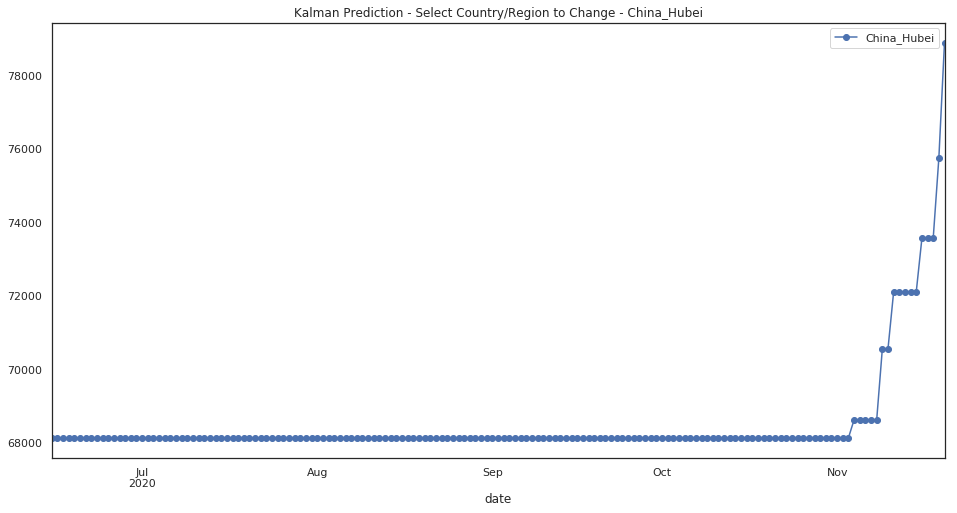

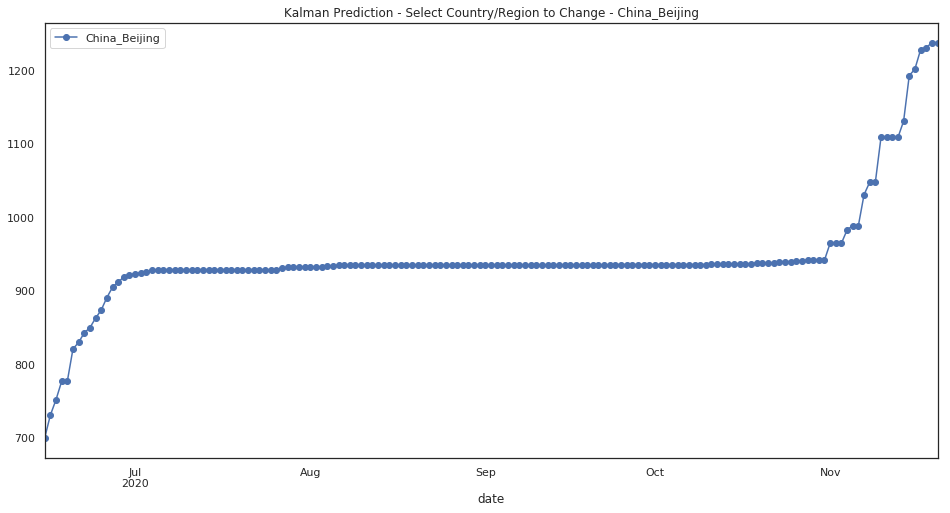

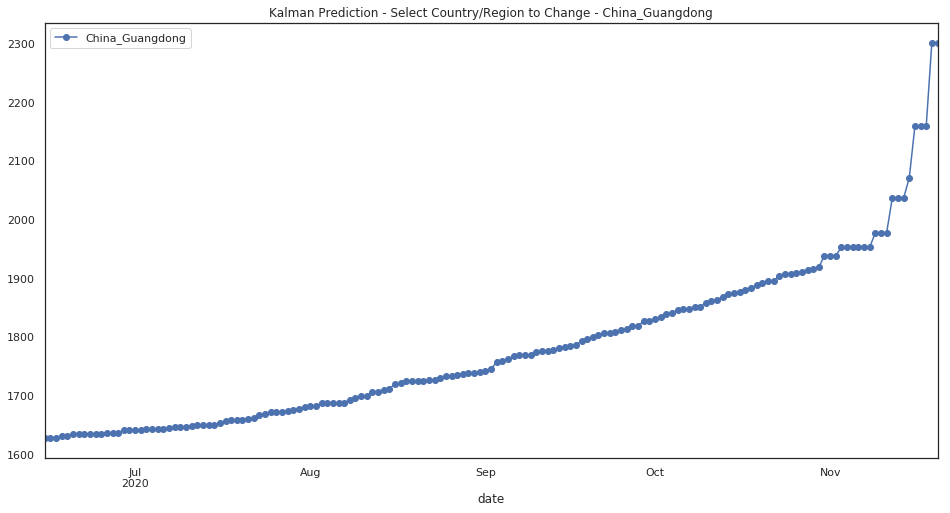

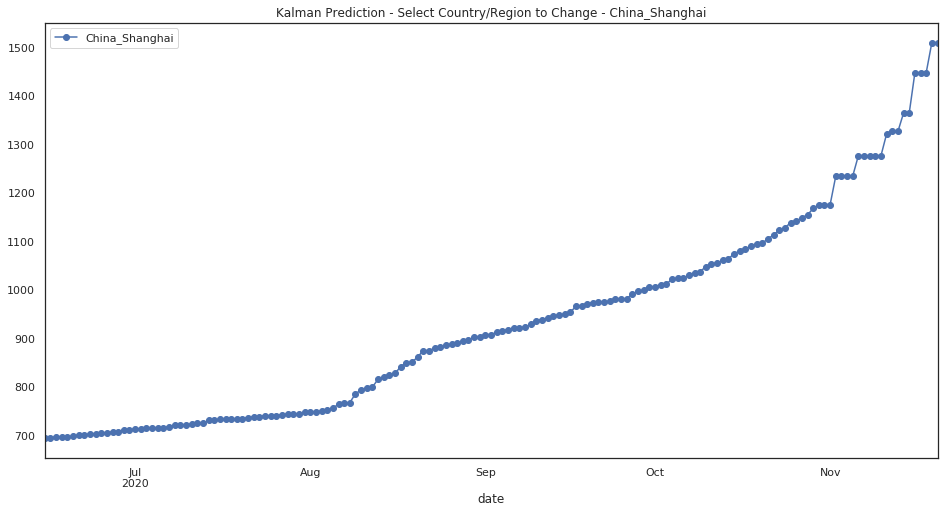

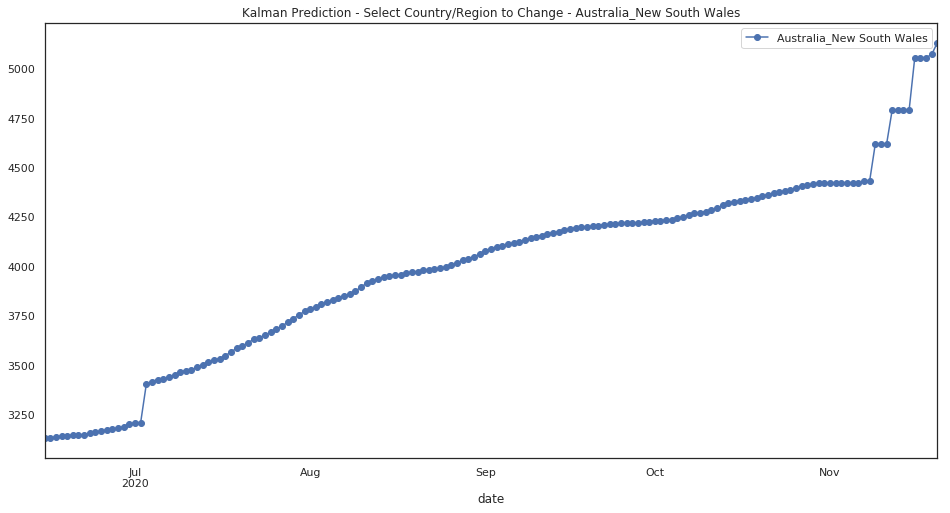

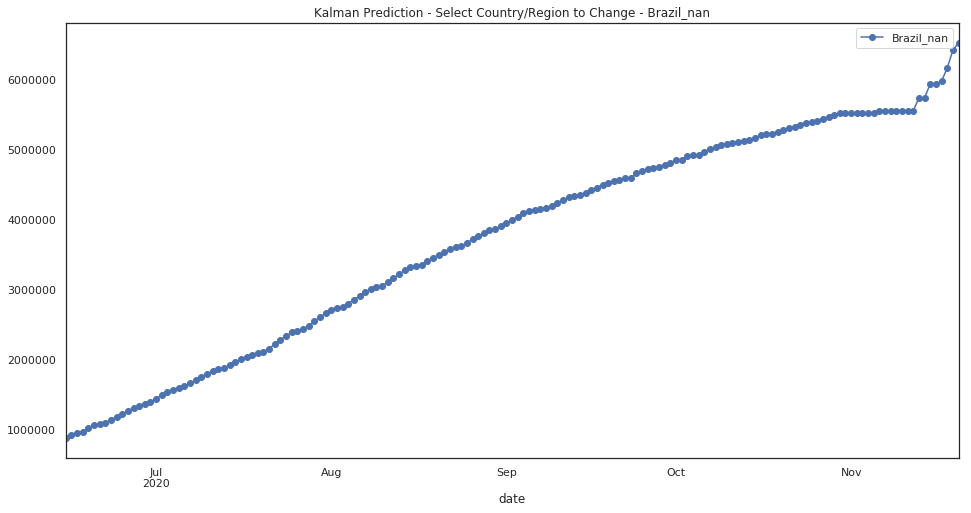

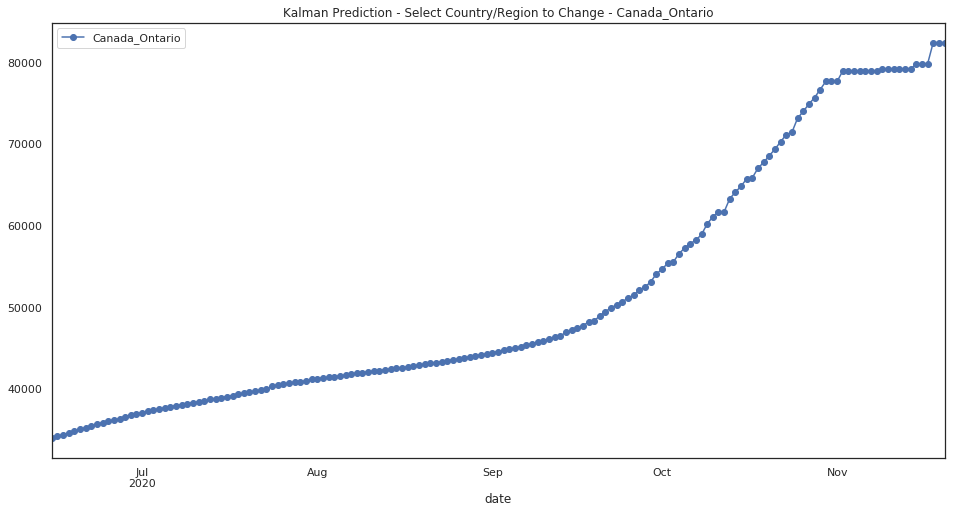

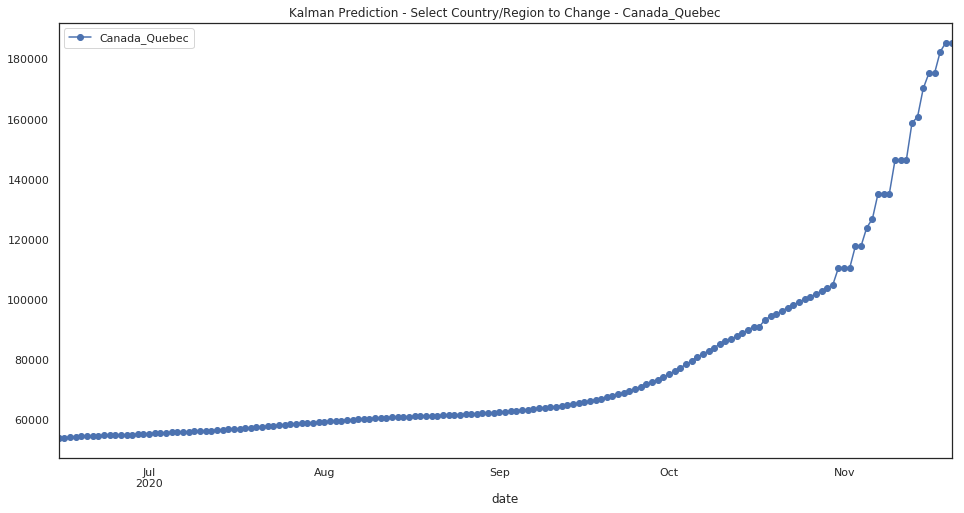

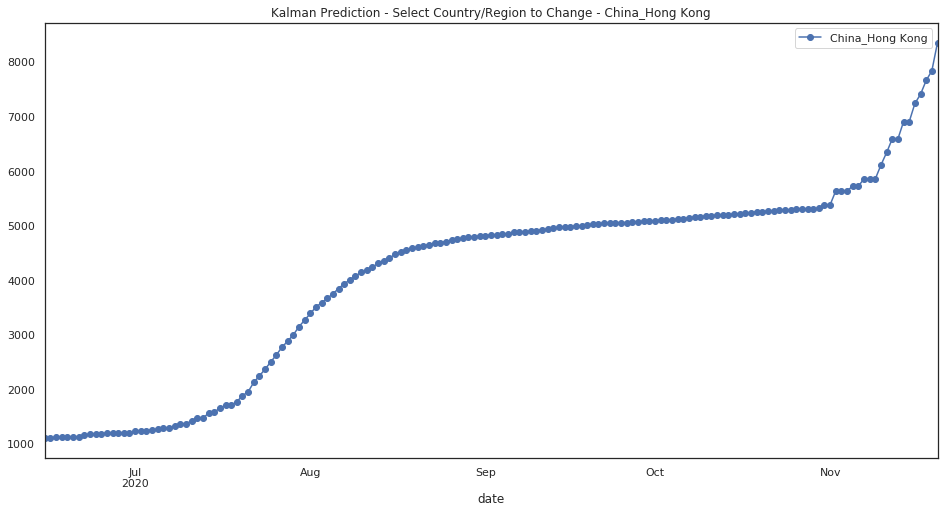

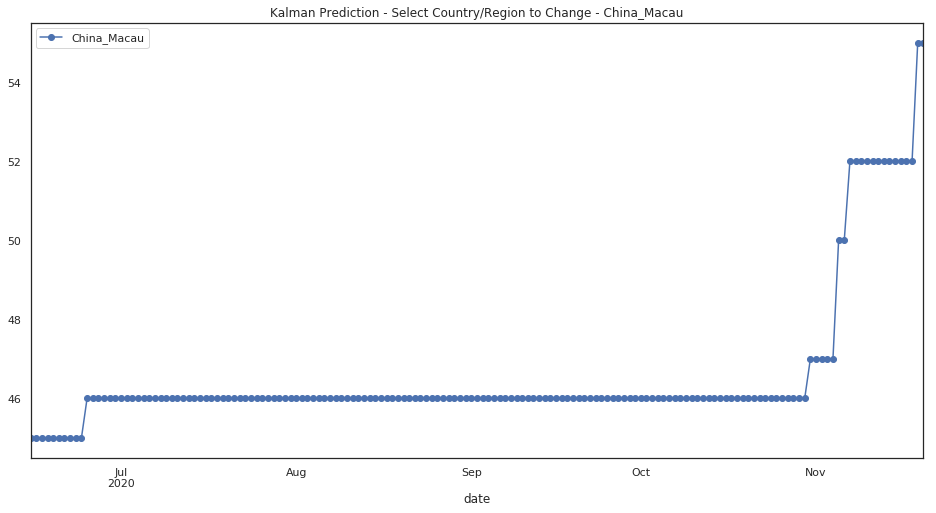

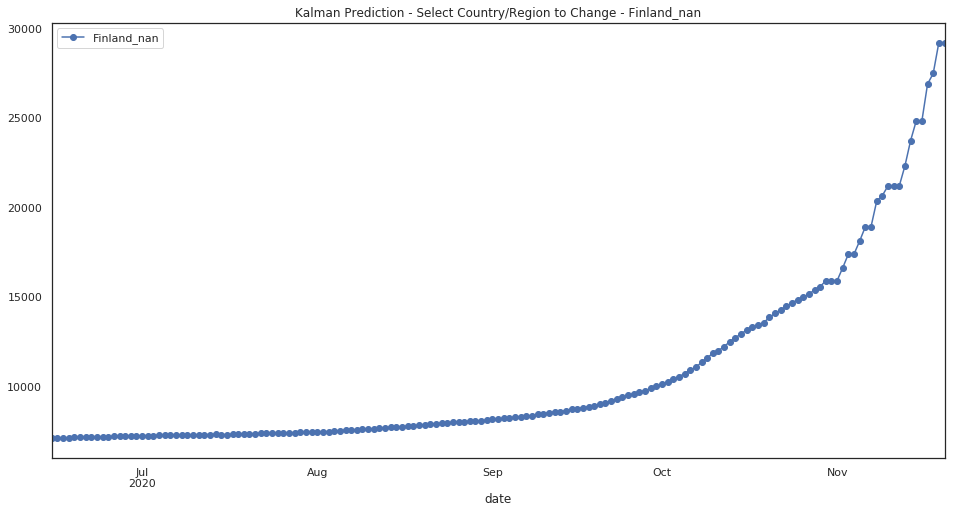

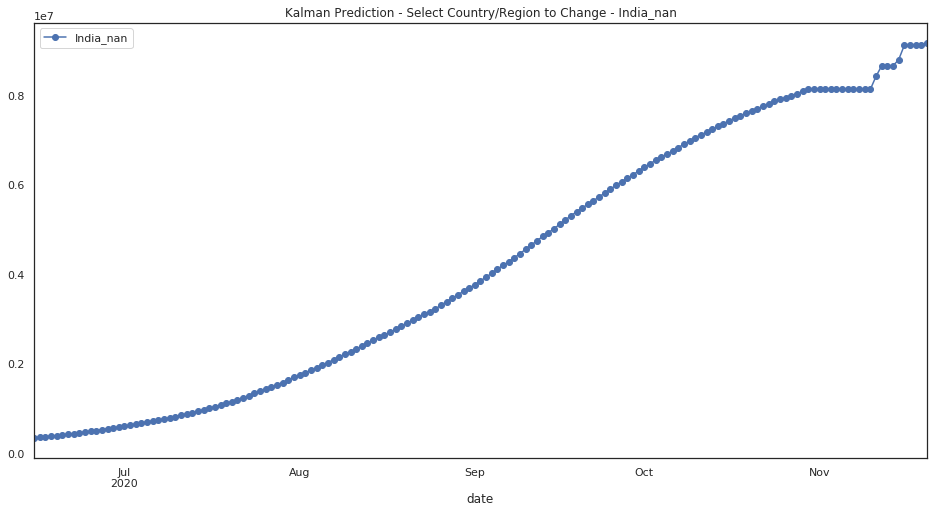

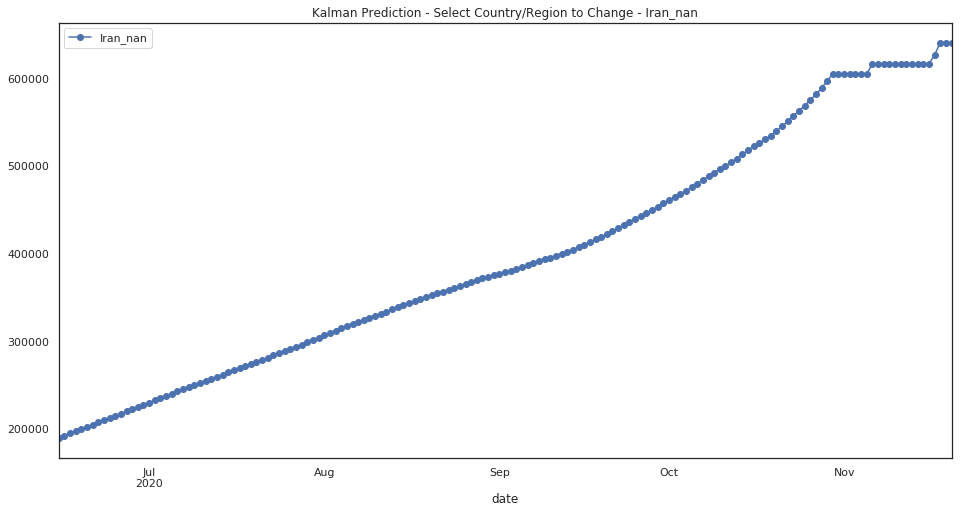

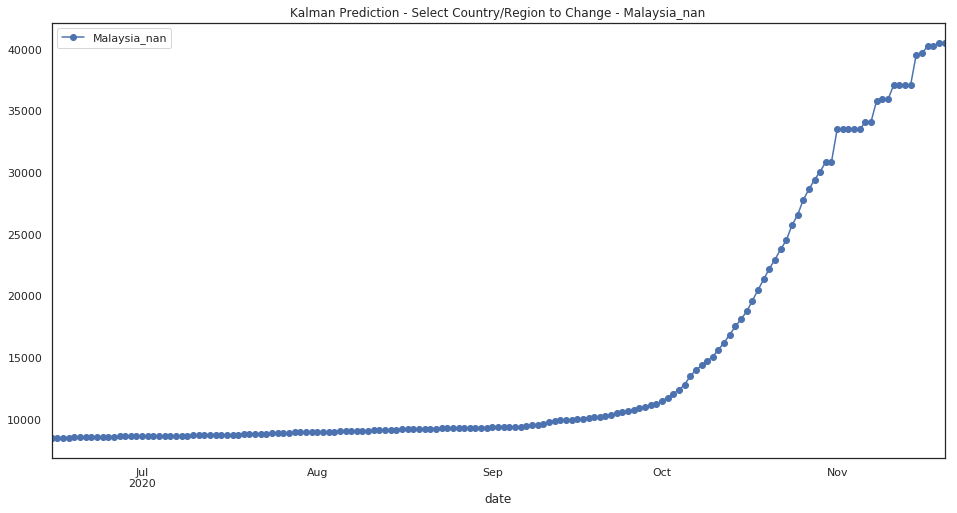

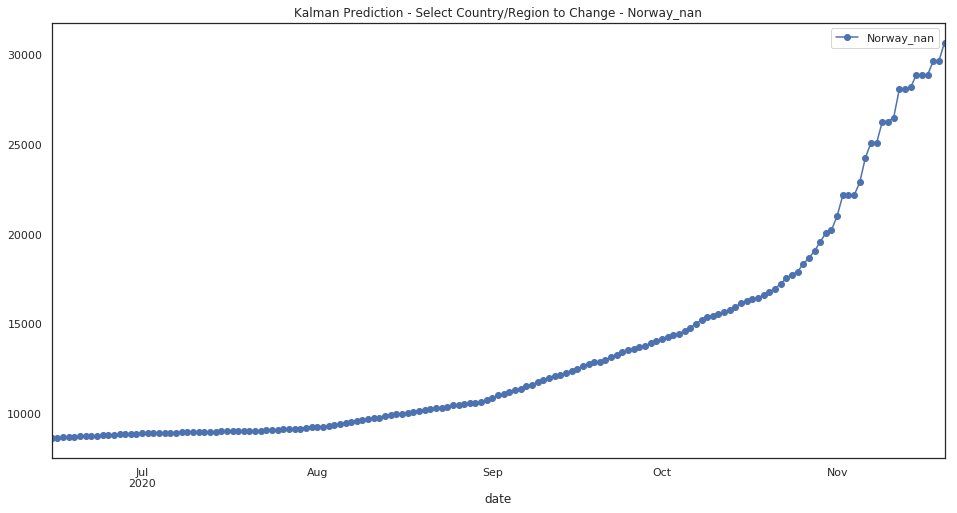

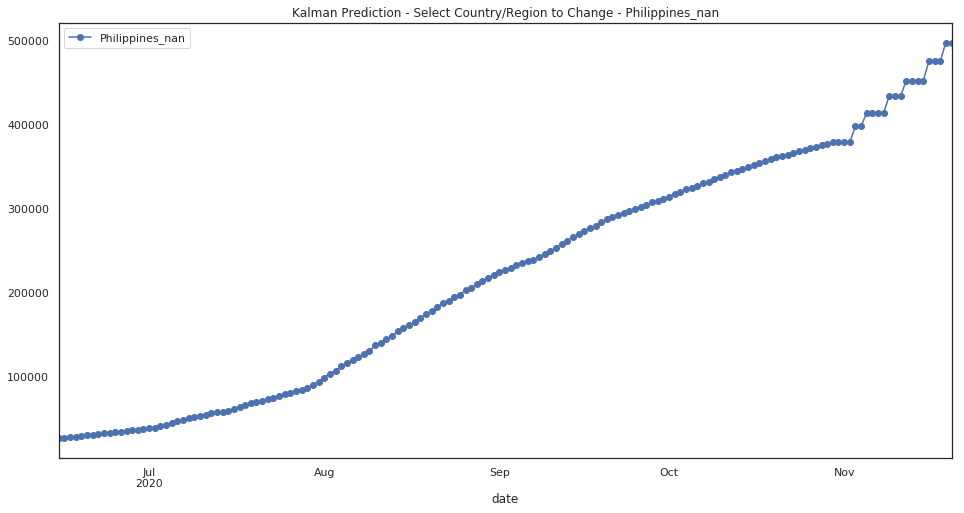

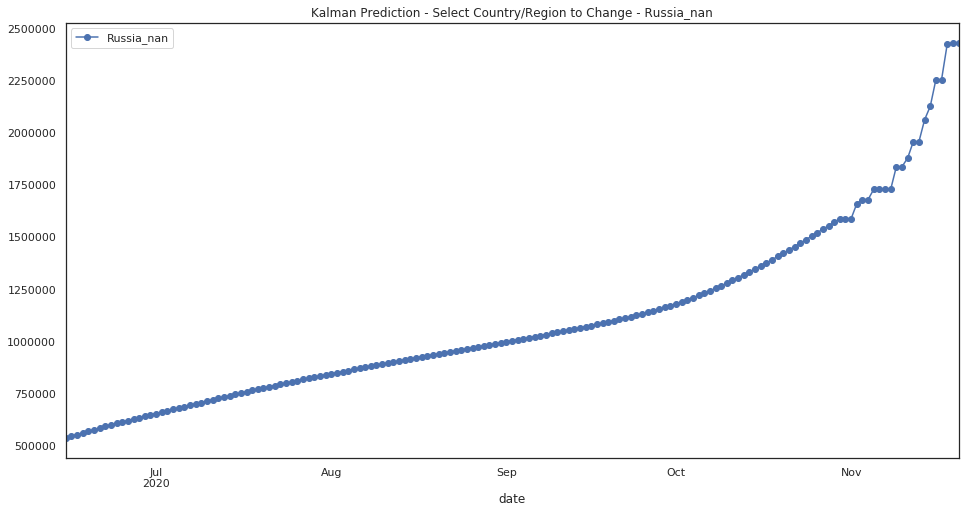

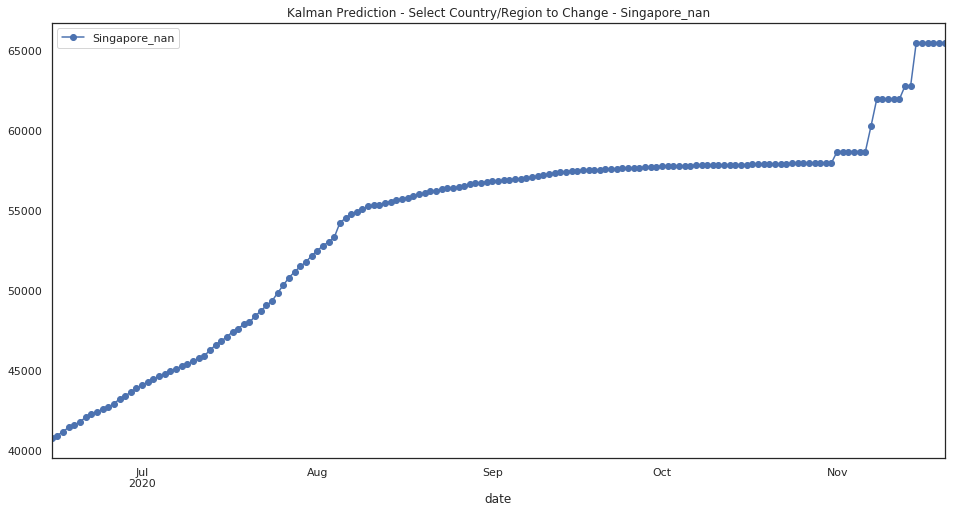

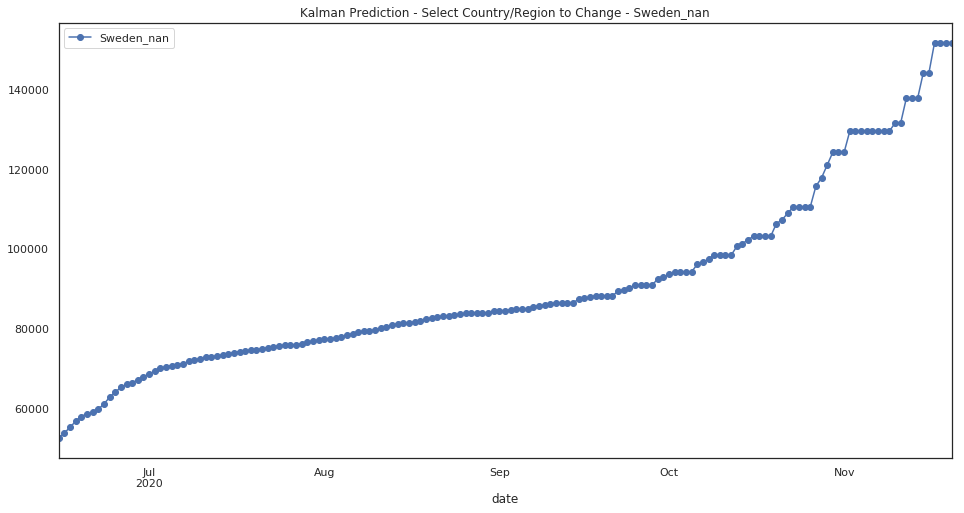

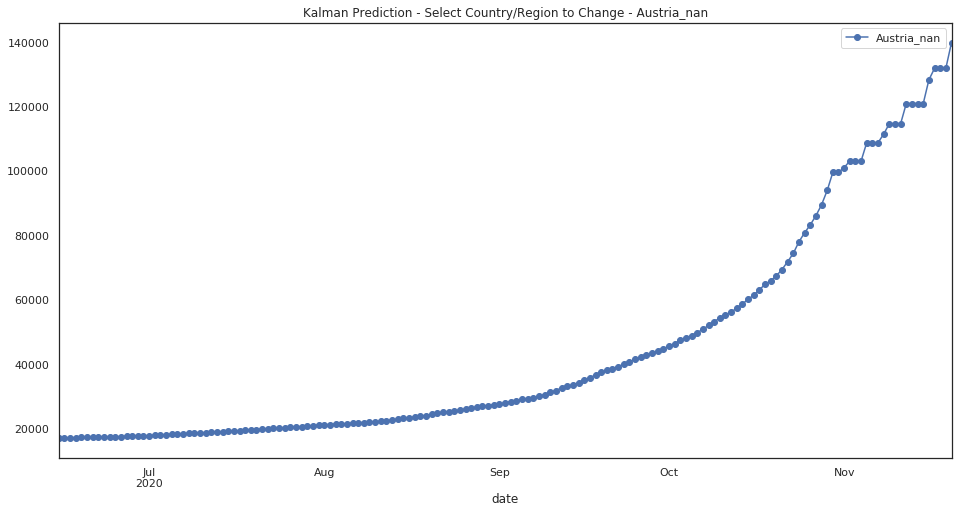

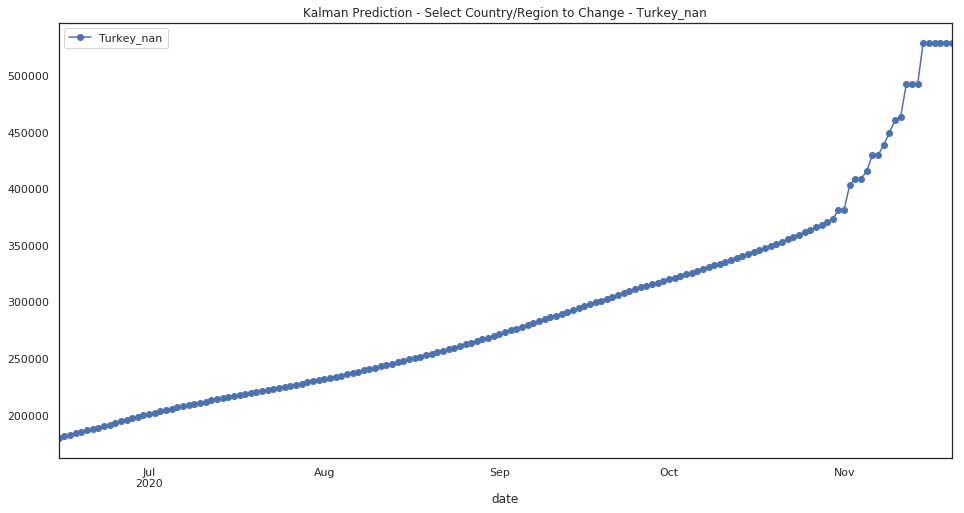

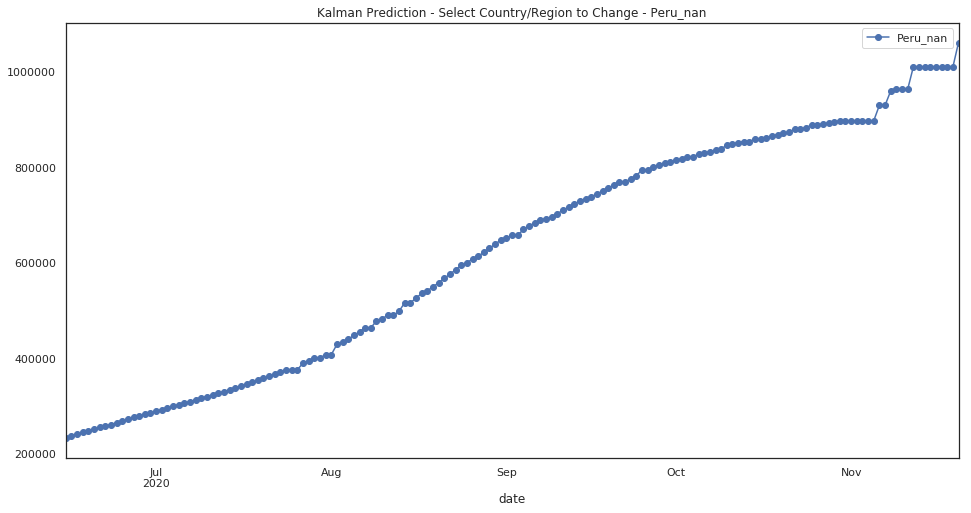

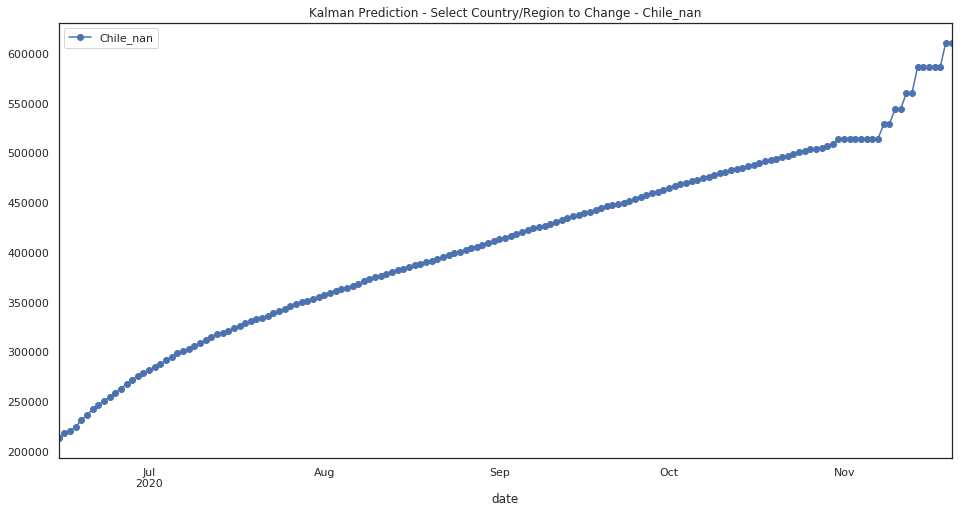

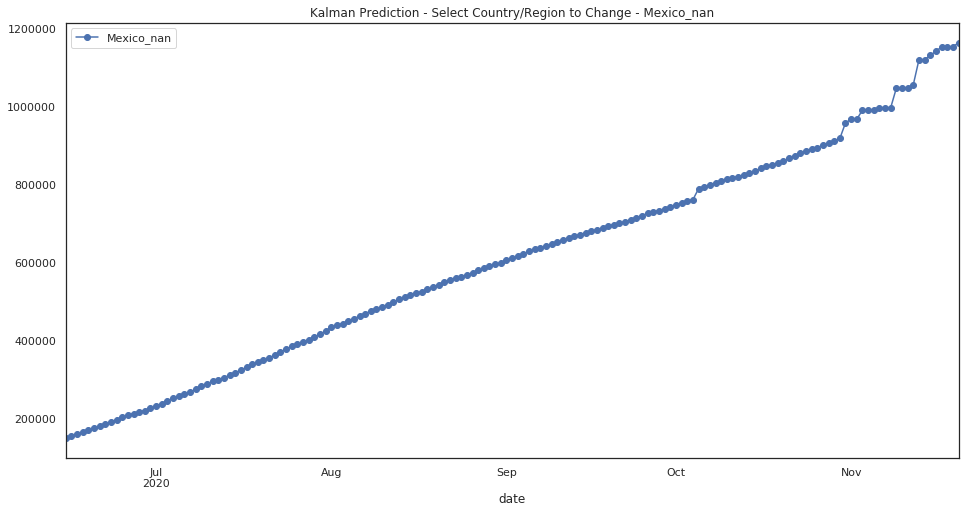

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-11-20 00:00:00
dtype: object


0  pred_confirmed
United States_nan                           NaN      12780912.0
India_nan                                   NaN       9181047.0
Brazil_nan                                  NaN       6522070.0
Russia_nan                                  NaN       2432230.0
France_nan                                  NaN       2108927.0
Argentina_nan                               NaN       1625022.0
Spain_nan                                   NaN       1460711.0
Colombia_nan                                NaN       1441599.0
Italy_nan                                   NaN       1190652.0
United Kingdom_nan                          NaN       1186126.0
Mexico_nan                                  NaN       1164743.0
Peru_nan                                    NaN       1061319.0
Germany_nan                                 NaN       1018588.0
South Africa_nan                            NaN        990339.0
Iran_nan                                    NaN        640628.0
Chile_nan                                   NaN        610962.0
Iraq_nan                                    NaN        596507.0
Czechia_nan                                 NaN        578288.0
Turkey_nan                                  NaN        529577.0
Netherlands_nan                             NaN        516992.0
Bangladesh_nan                              NaN        513053.0
Ukraine_nan                                 NaN        507061.0
Poland_nan                                  NaN        503186.0
Belgium_nan                                 NaN        500728.0
Philippines_nan                             NaN        497471.0
Indonesia_nan                               NaN        477563.0
Saudi Arabia_nan                            NaN        474226.0
Israel_nan                                  NaN        406251.0
Pakistan_nan                                NaN        358885.0
Romania_nan                                 NaN        287482.0
...                                         ...             ...
Saint Lucia_nan                             NaN           125.0
Saint Vincent and the Grenadines_nan        NaN            94.0
United Kingdom_British Virgin Islands       NaN            82.0
China_Ningxia                               NaN            81.0
Canada_Prince Edward Island                 NaN            67.0
Dominica_nan                                NaN            57.0
China_Macau                                 NaN            55.0
Australia_Northern Territory                NaN            52.0
Fiji_nan                                    NaN            43.0
France_New Caledonia                        NaN            40.0
Canada_Yukon                                NaN            39.0
Timor-Leste_nan                             NaN            38.0
Holy See_nan                                NaN            33.0
Laos_nan                                    NaN            31.0
Grenada_nan                                 NaN            31.0
Solomon Islands_nan                         NaN            22.0
Saint Kitts and Nevis_nan                   NaN            21.0
China_Qinghai                               NaN            21.0
Canada_Grand Princess                       NaN            19.0
Denmark_Greenland                           NaN            19.0
France_Saint Pierre and Miquelon            NaN            18.0
United Kingdom_Falkland Islands (Malvinas)  NaN            14.0
United Kingdom_Montserrat                   NaN            13.0
Canada_Northwest Territories                NaN            10.0
Western Sahara_nan                          NaN            10.0
MS Zaandam_nan                              NaN             9.0
United Kingdom_Anguilla                     NaN             3.0
Marshall Islands_nan                        NaN             3.0
China_Tibet                                 NaN             1.0
Canada_Diamond Princess                     NaN             0.0

[268 rows x 2 columns]

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-06-15          30113.0       9436.0      17591.0       8799.0   
2020-06-16          30789.0       9507.0      17691.0       8800.0   
2020-06-17          26310.0       1672.0      11147.0        854.0   
2020-06-18          26874.0       1722.0      11268.0        854.0   
2020-06-19          27616.0       1788.0      11385.0        855.0   
2020-06-20          28102.0       1838.0      11504.0        855.0   
2020-06-21          28554.0       1891.0      11631.0        855.0   
2020-06-22          28874.0       1962.0      11771.0        855.0   
2020-06-23          29526.0       2120.0      12109.0       1046.0   
2020-06-24          29709.0       2100.0      12279.0       1046.0   
2020-06-25          30174.0       2123.0      12470.0       1046.0   
2020-06-26          30536.0       2192.0      12700.0       1045.0   
2020-06-27          30682.0       2269.0      12970.0       1045.0   
2020-06-28          30995.0       2394.0      13267.0       1045.0   
2020-06-29          31304.0       2423.0      13568.0       1045.0   
2020-06-30          31571.0       2525.0      13906.0       1045.0   
2020-07-01          31886.0       2565.0      14265.0       1045.0   
2020-07-02          32095.0       2710.0      14648.0       1045.0   
2020-07-03          32364.0       2691.0      15060.0       1045.0   
2020-07-04          32724.0       2752.0      15490.0       1045.0   
2020-07-05          33018.0       2897.0      15933.0       1045.0   
2020-07-06          33252.0       2950.0      16397.0       1045.0   
2020-07-07          33446.0       3033.0      16874.0       1045.0   
2020-07-08          33648.0       3098.0      17348.0       1045.0   
2020-07-09          33951.0       3198.0      17814.0       1045.0   
2020-07-10          34257.0       3256.0      18256.0       1045.0   
2020-07-11          34440.0       3336.0      18724.0       1045.0   
2020-07-12          34519.0       3424.0      19205.0       1045.0   
2020-07-13          34521.0       3563.0      19700.0       1048.0   
2020-07-14          34756.0       3601.0      20226.0       1024.0   
...                     ...          ...          ...          ...   
2020-10-23          40759.0      18642.0      55694.0       4633.0   
2020-10-24          40825.0      18946.0      55945.0       4290.0   
2020-10-25          40897.0      19248.0      56199.0       4693.0   
2020-10-26          40992.0      19539.0      56476.0       4941.0   
2020-10-27          41096.0      19826.0      56764.0       4589.0   
2020-10-28          41205.0      20134.0      57082.0       5085.0   
2020-10-29          41331.0      20416.0      57397.0       5125.0   
2020-10-30          41406.0      20731.0      57710.0       5292.0   
2020-10-31          41403.0      20776.0      57756.0       5234.0   
2020-11-01          41390.0      20773.0      57673.0       5421.0   
2020-11-02          41391.0      20808.0      57679.0       5355.0   
2020-11-03          43124.0      20812.0      57684.0       5410.0   
2020-11-04          44076.0      20813.0      57689.0       5675.0   
2020-11-05          43748.0      20813.0      57693.0       5340.0   
2020-11-06          43678.0      20814.0      57698.0       5785.0   
2020-11-07          44248.0      20815.0      57703.0       5994.0   
2020-11-08          44478.0      21687.0      57703.0       5737.0   
2020-11-09          44327.0      21838.0      57703.0       6061.0   
2020-11-10          44327.0      22547.0      57703.0       6202.0   
2020-11-11          44354.0      22687.0      59134.0       6044.0   
2020-11-12          44358.0      22656.0      59786.0       6480.0   
2020-11-13          44358.0      22770.0      59672.0       6330.0   
2020-11-14          44358.0      23223.0      60591.0       6725.0   
2020-11-15          46132.0      23928.0      62810.0       6714.0   
2020-11-16

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'Russia_nan',
 'France_nan',
 'Argentina_nan',
 'Spain_nan',
 'Colombia_nan',
 'Italy_nan',
 'United Kingdom_nan',
 'Mexico_nan',
 'Peru_nan',
 'Germany_nan',
 'South Africa_nan',
 'Iran_nan',
 'Chile_nan',
 'Iraq_nan',
 'Czechia_nan',
 'Turkey_nan',
 'Netherlands_nan',
 'Bangladesh_nan',
 'Ukraine_nan',
 'Poland_nan',
 'Belgium_nan',
 'Philippines_nan',
 'Indonesia_nan',
 'Saudi Arabia_nan',
 'Israel_nan',
 'Pakistan_nan',
 'Romania_nan',
 'Morocco_nan',
 'Switzerland_nan',
 'United Arab Emirates_nan',
 'Portugal_nan',
 'Ecuador_nan',
 'Canada_Quebec',
 'Nepal_nan',
 'Dominican Republic_nan',
 'Kuwait_nan',
 'Panama_nan',
 'Qatar_nan',
 'Bolivia_nan',
 'Sweden_nan',
 'Oman_nan',
 'Austria_nan',
 'Japan_nan',
 'Honduras_nan',
 'Costa Rica_nan',
 'Kazakhstan_nan',
 'Guatemala_nan',
 'Egypt_nan',
 'Venezuela_nan',
 'Hungary_nan',
 'Lebanon_nan',
 'Ethiopia_nan',
 'Jordan_nan',
 'Bahrain_nan',
 'Belarus_nan',
 'Ireland_nan',
 'Armenia_na

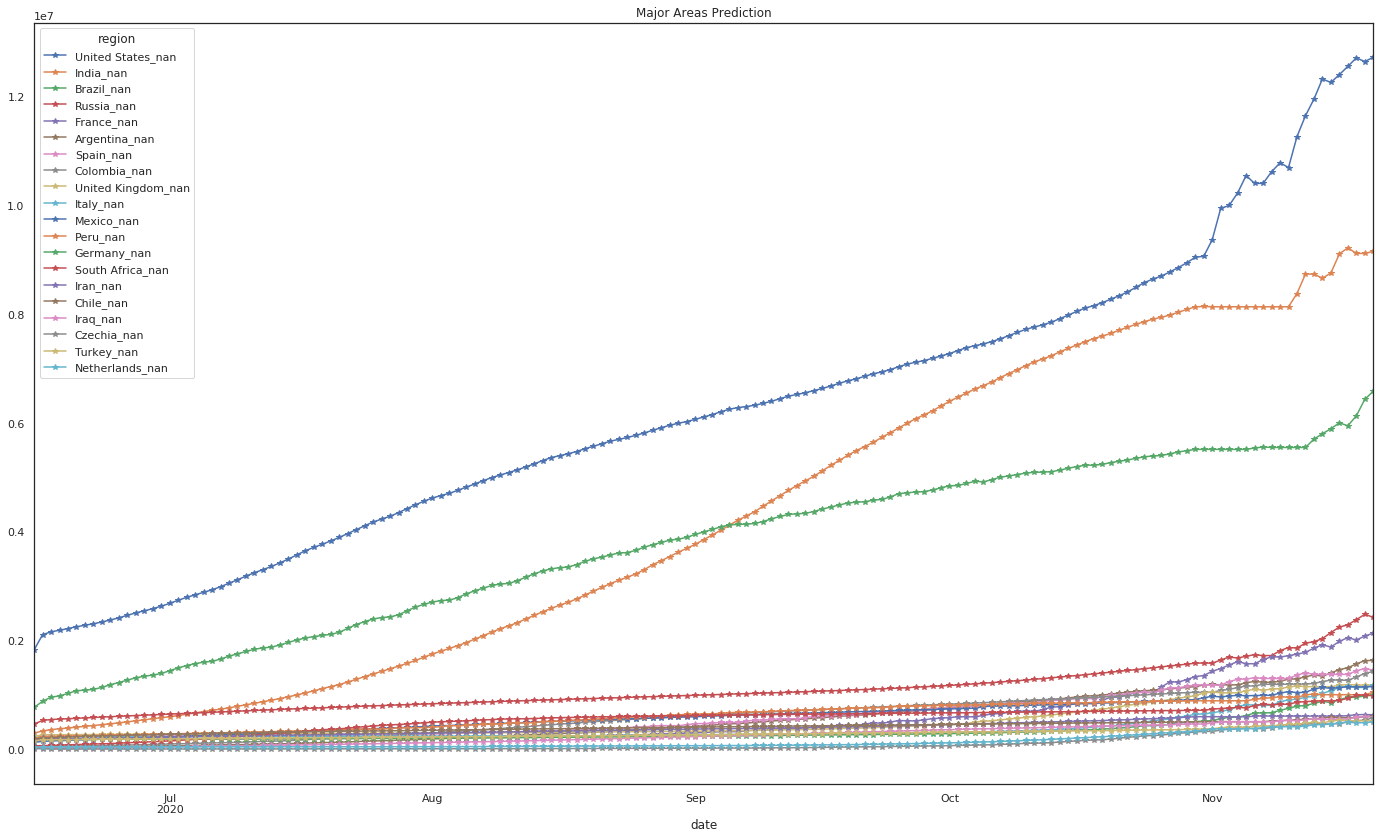

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

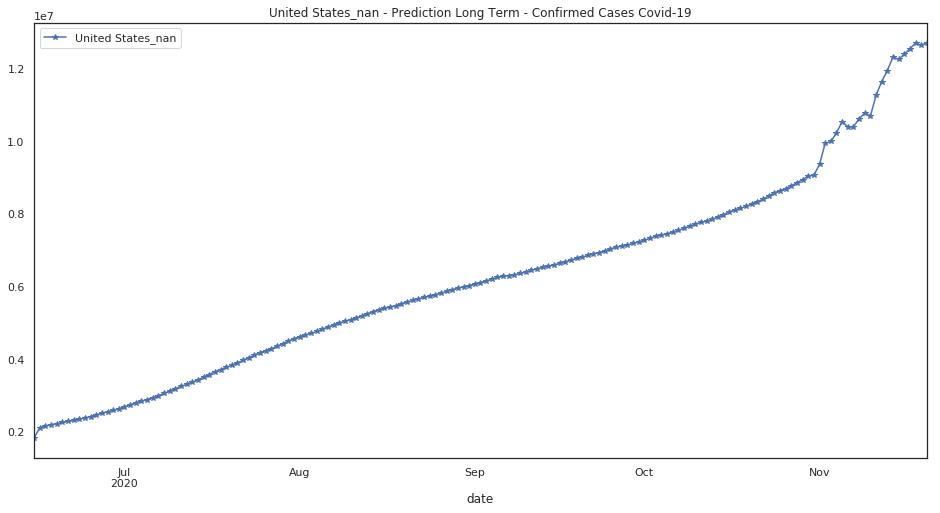

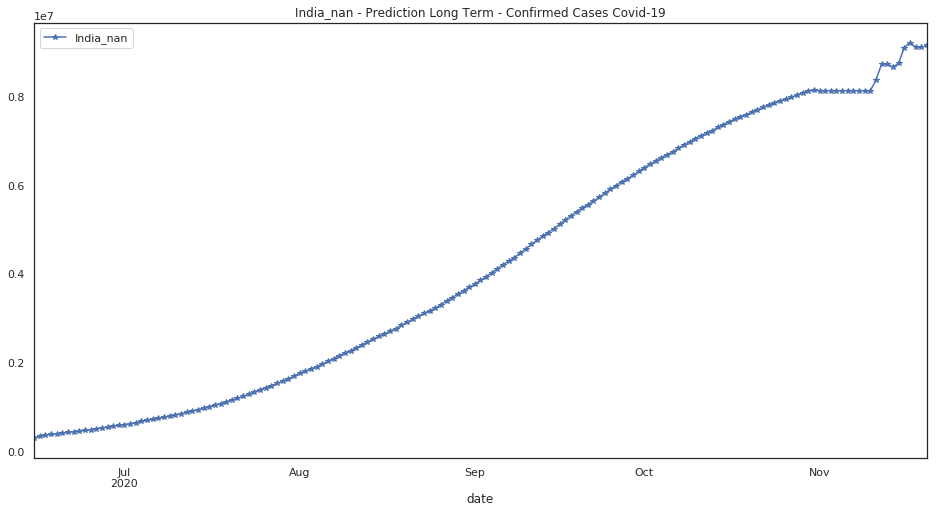

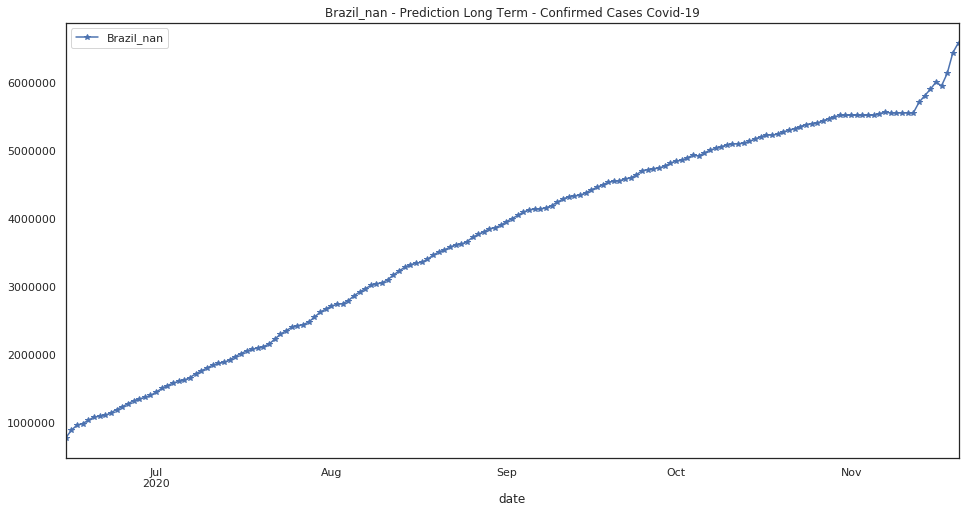

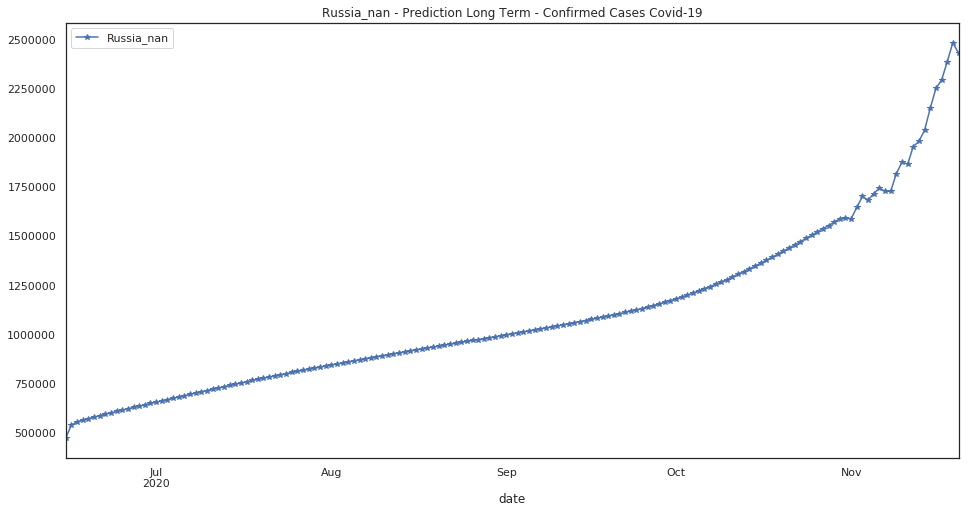

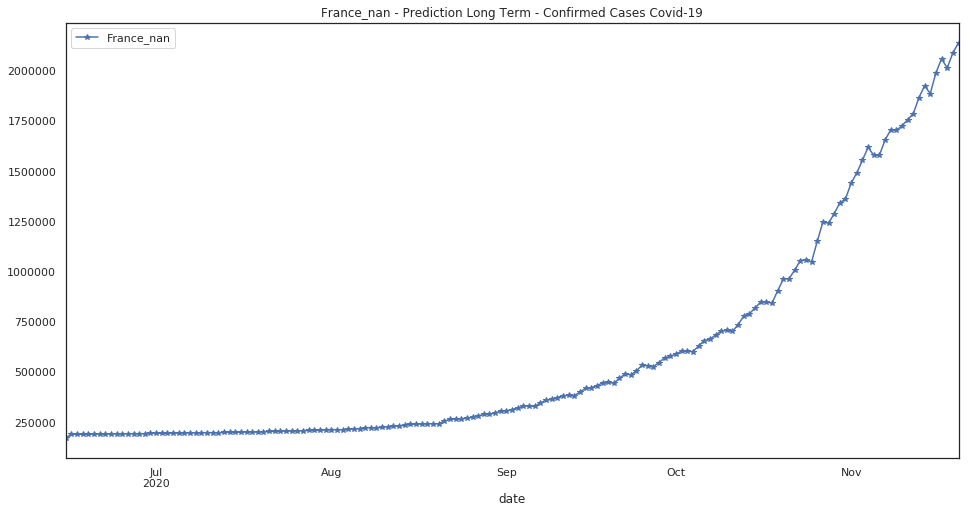

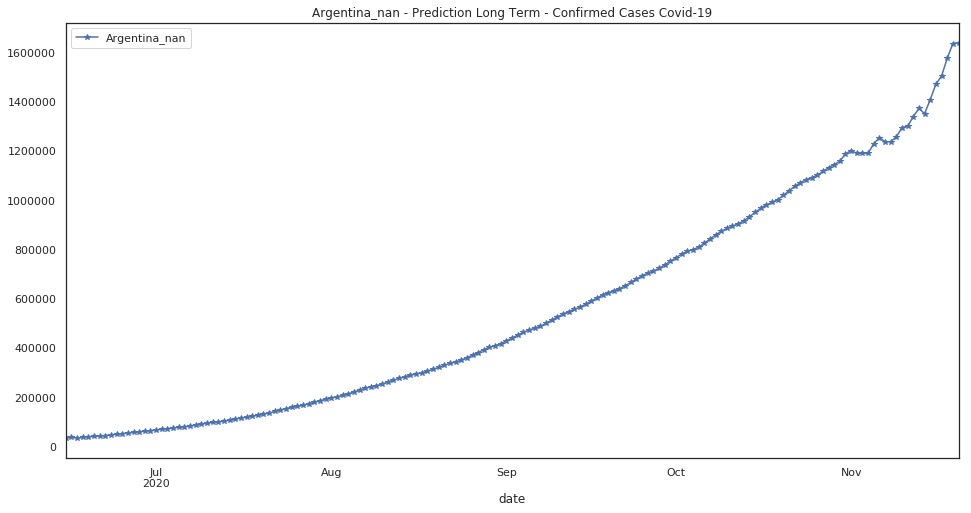

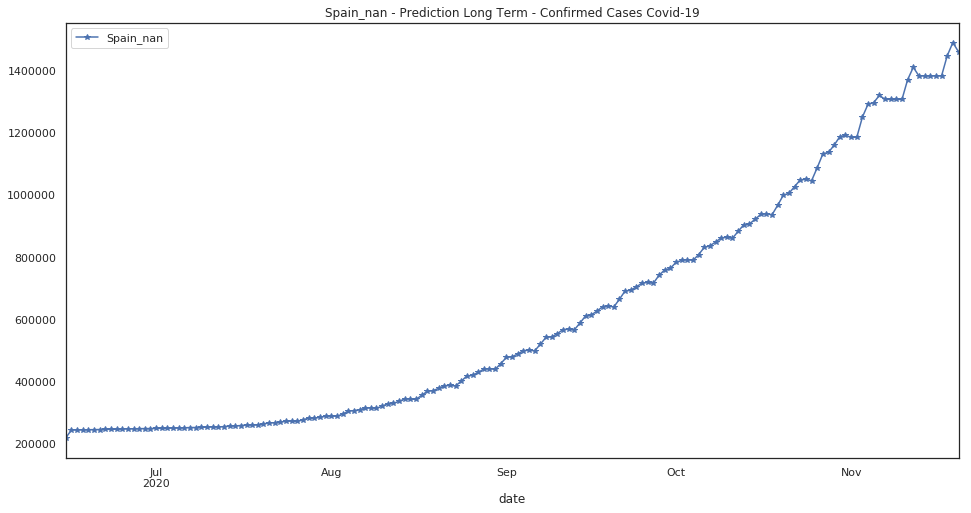

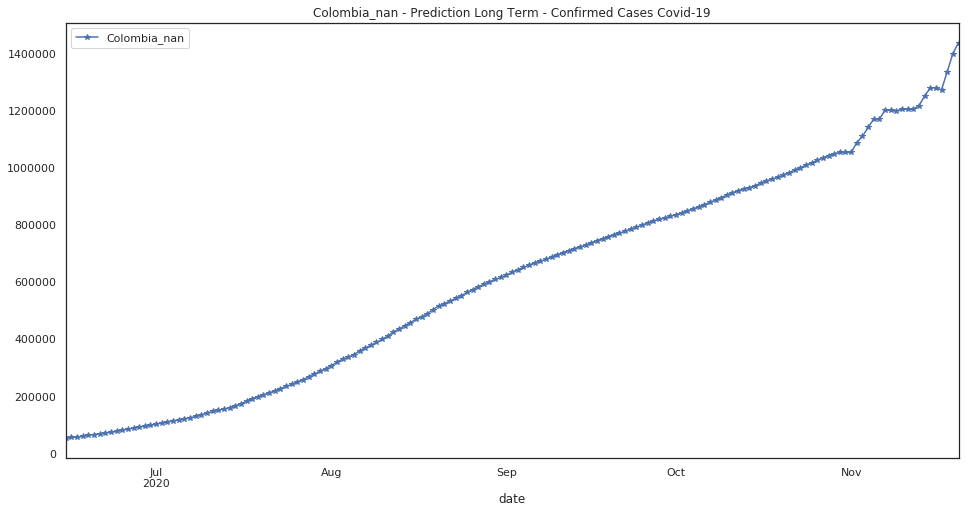

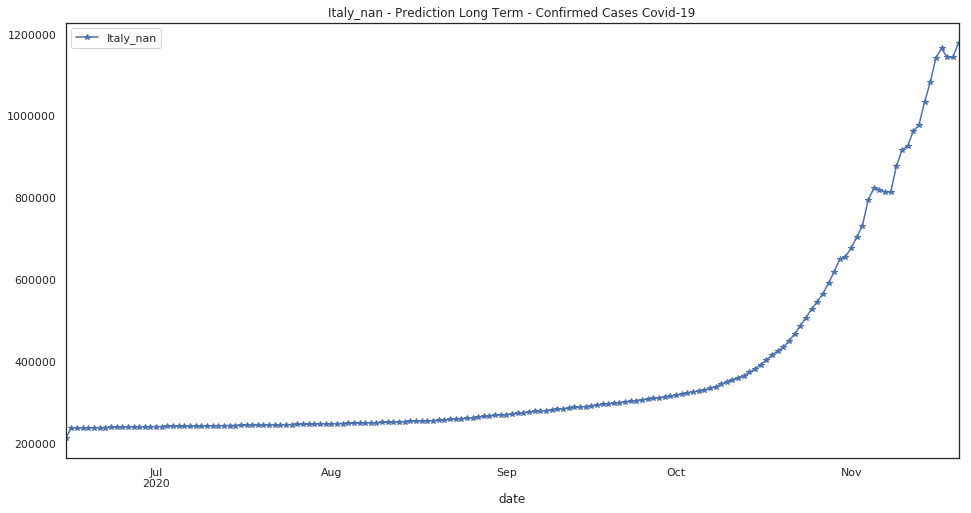

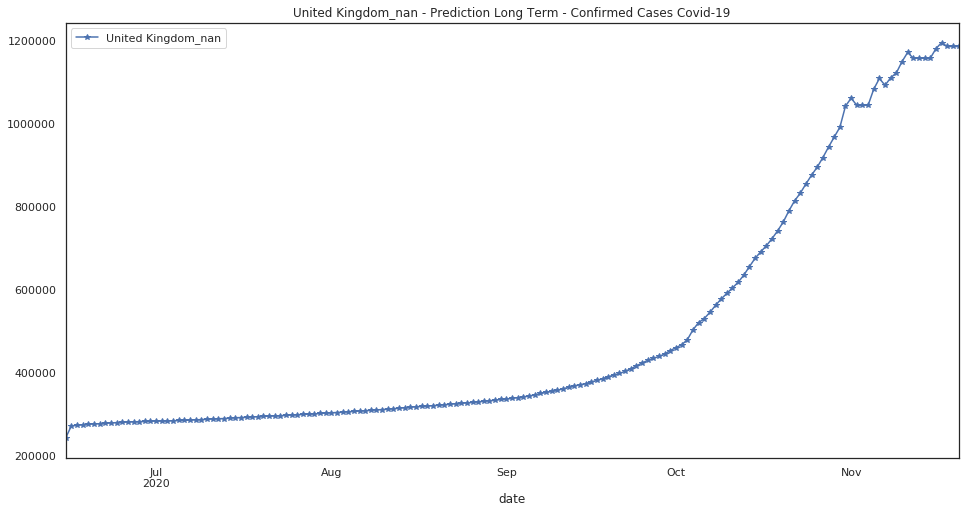

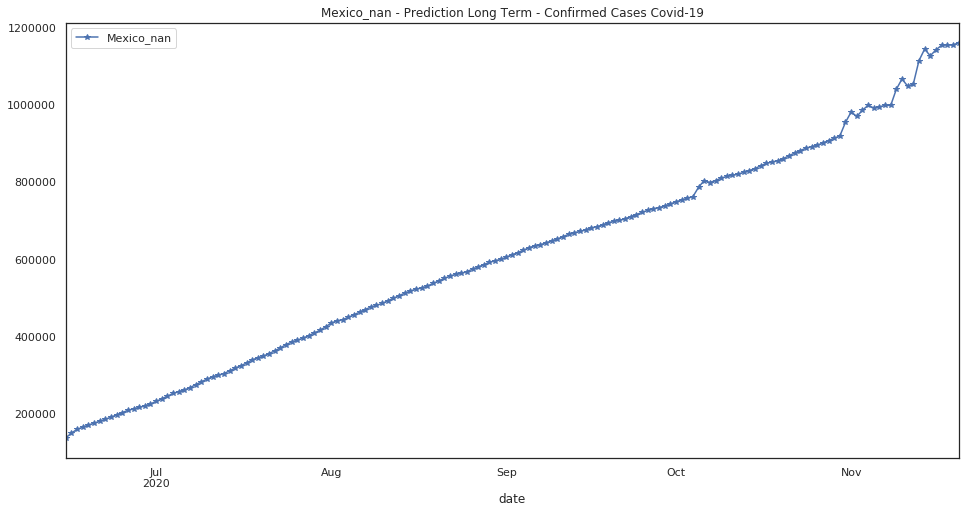

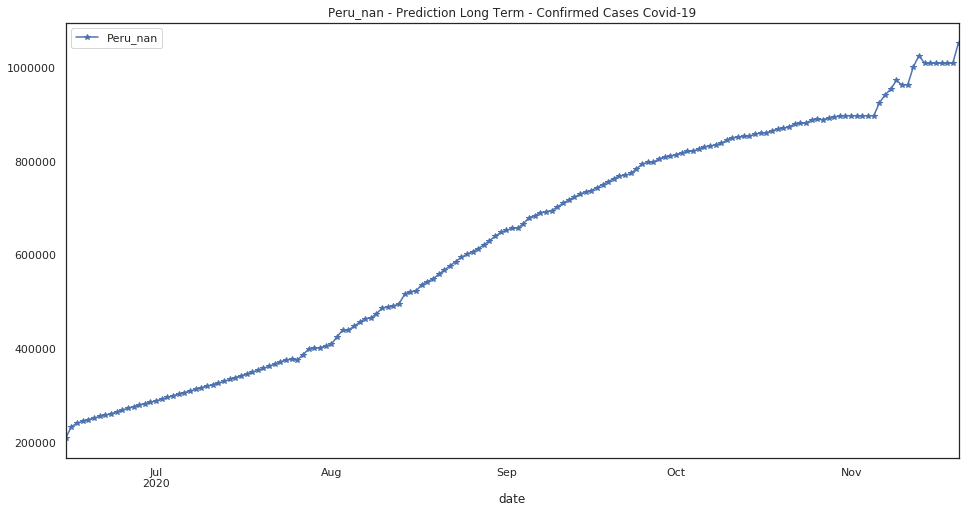

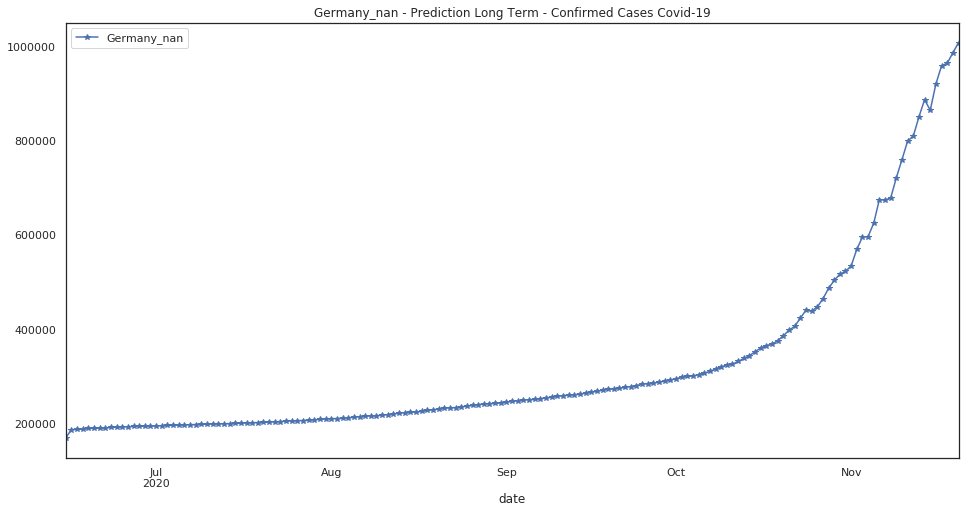

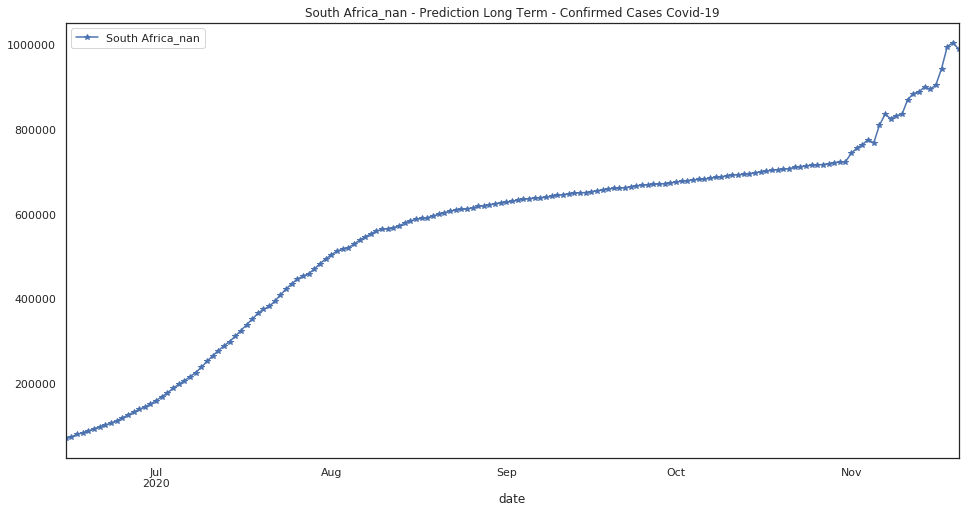

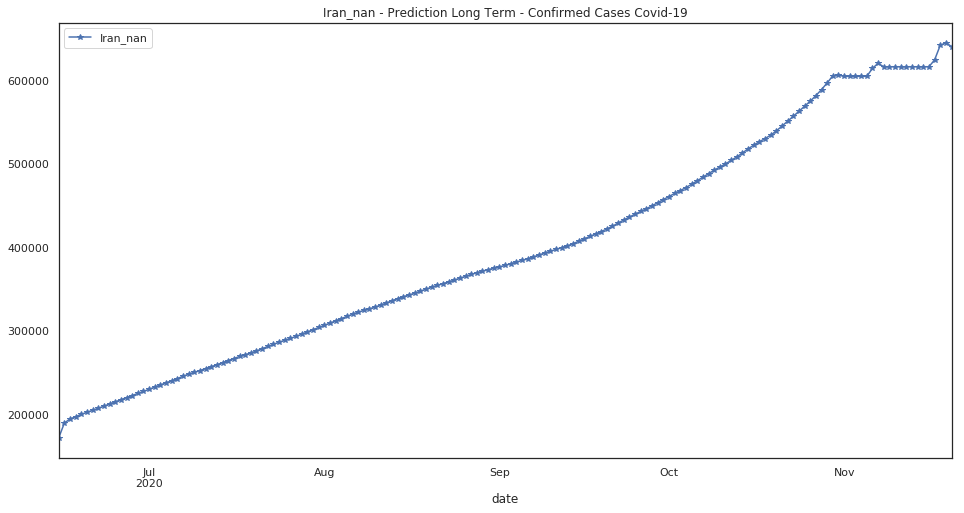

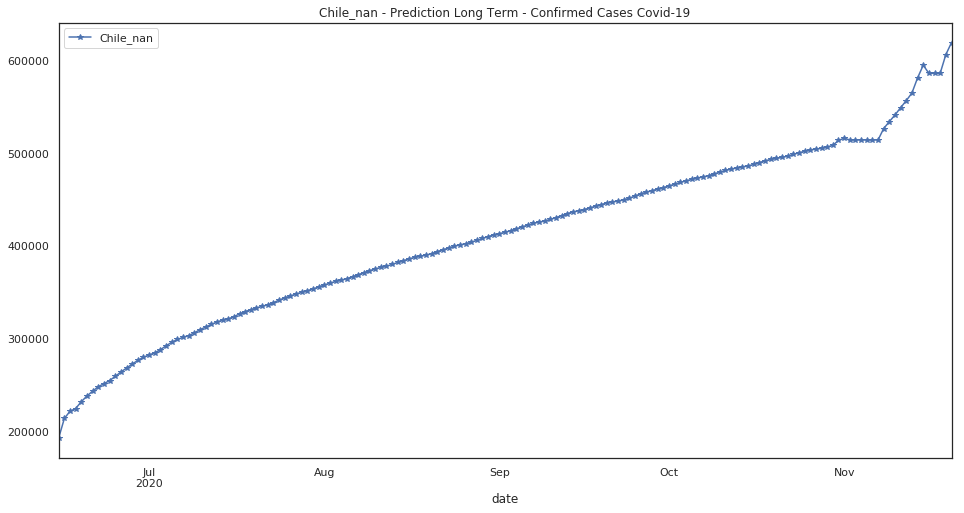

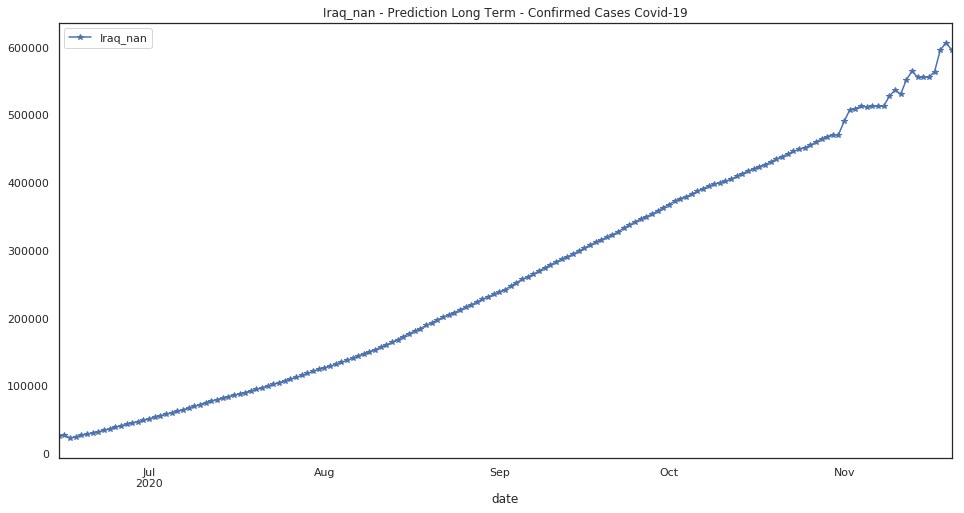

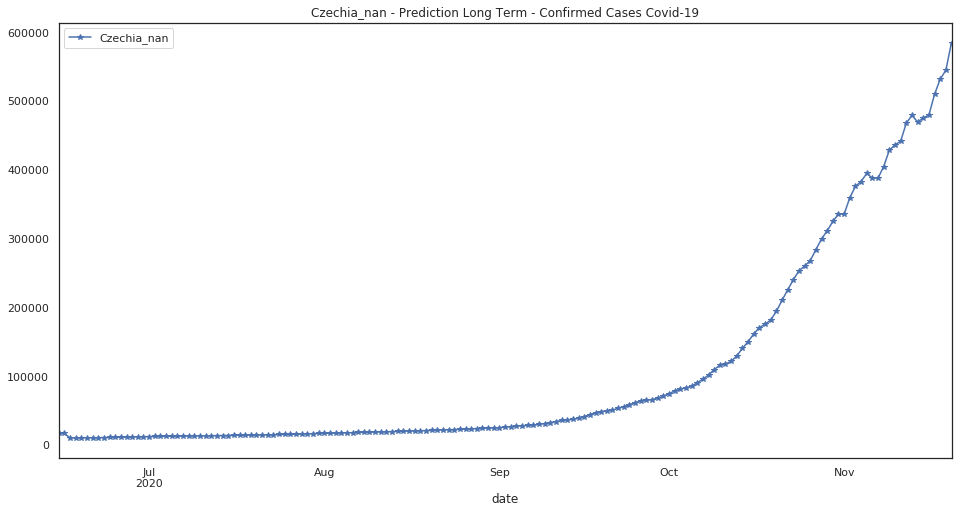

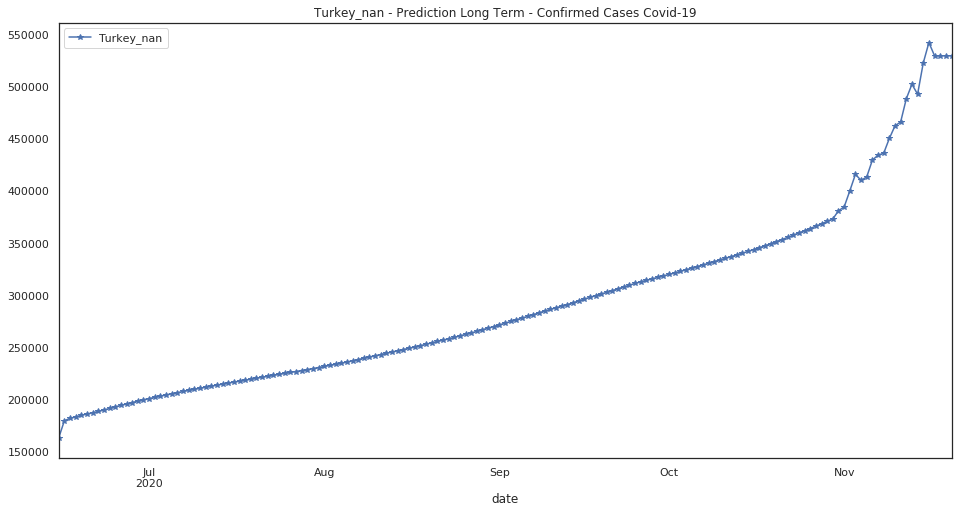

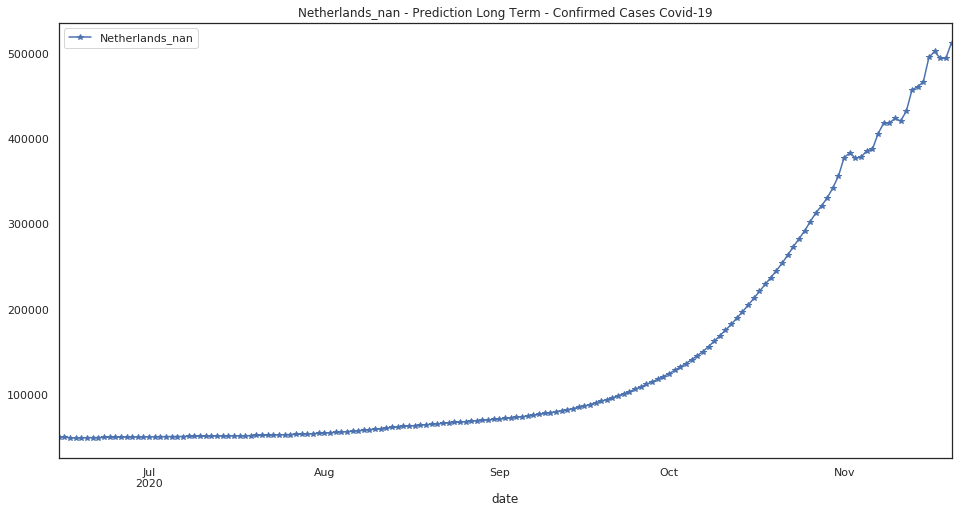

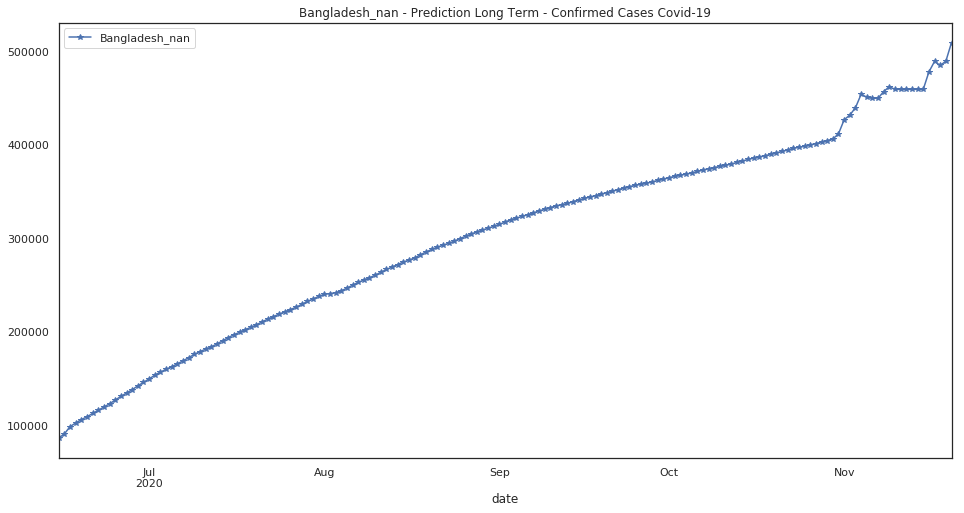

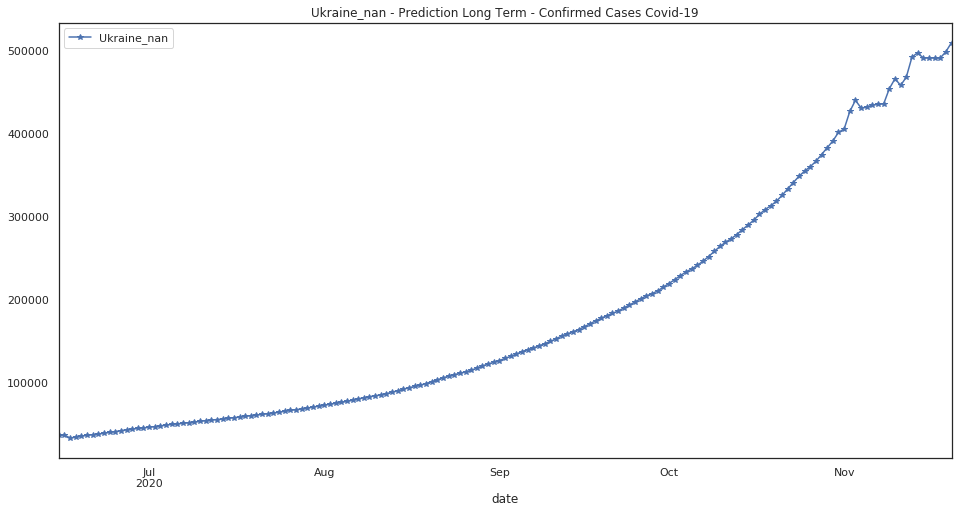

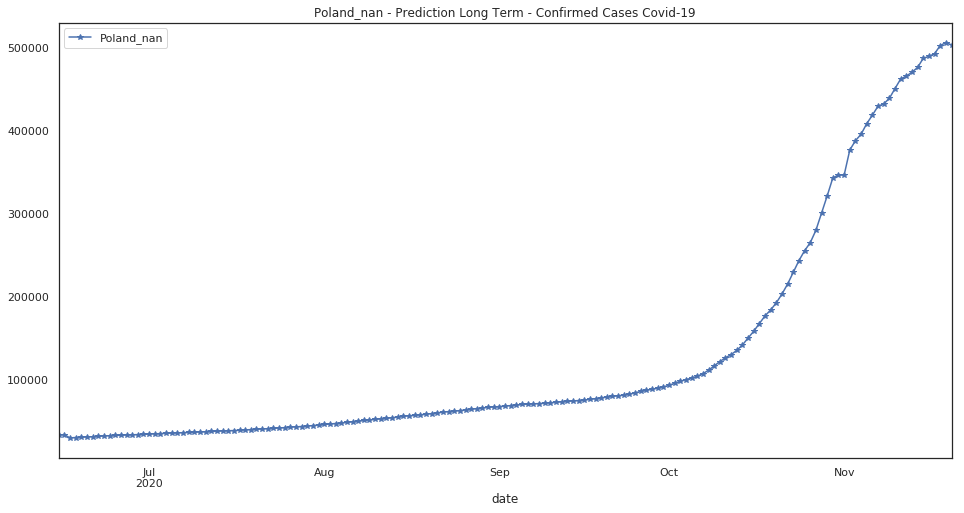

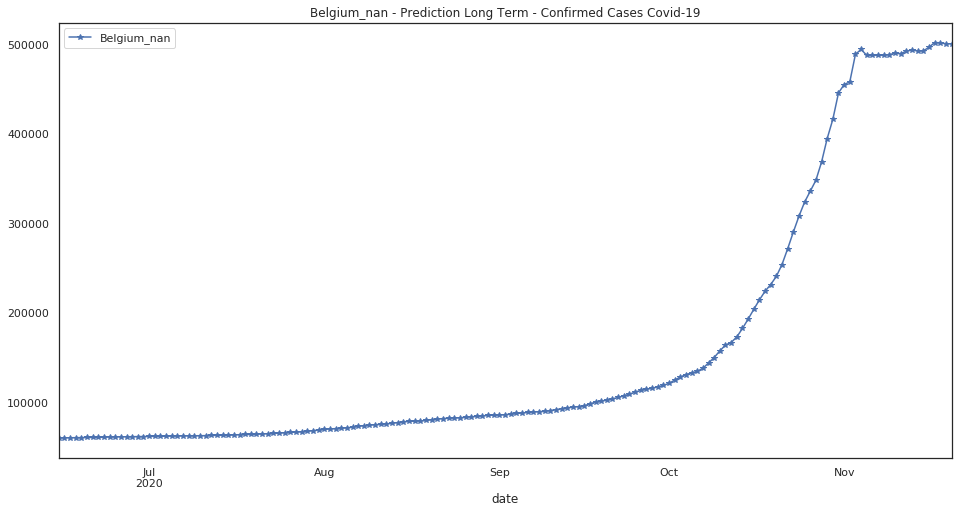

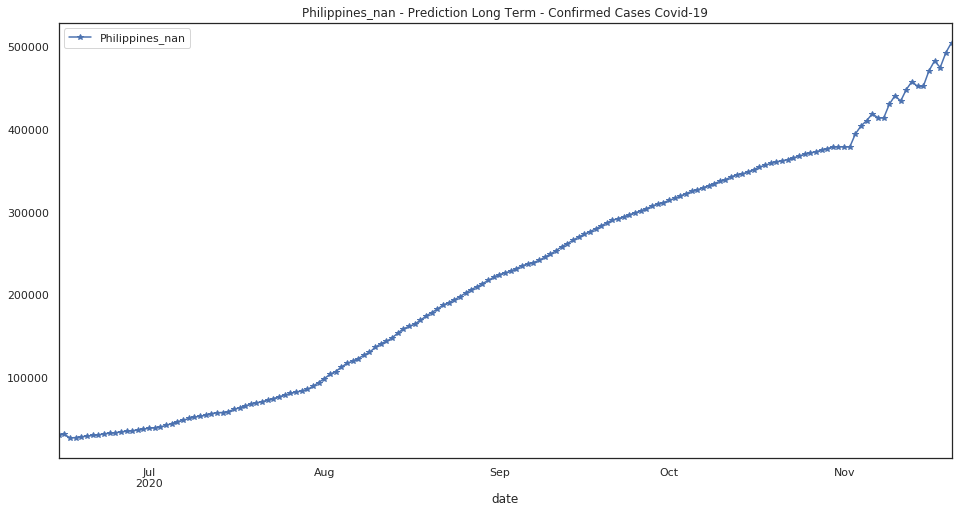

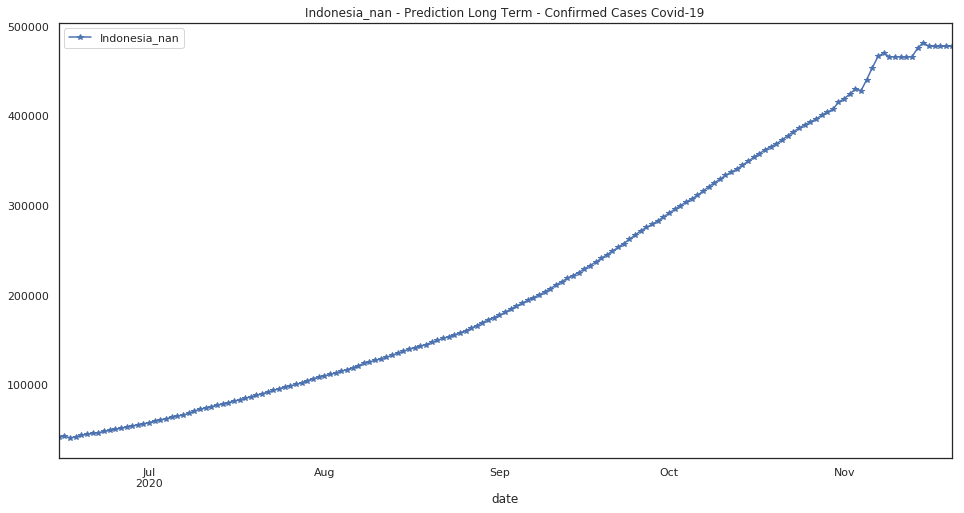

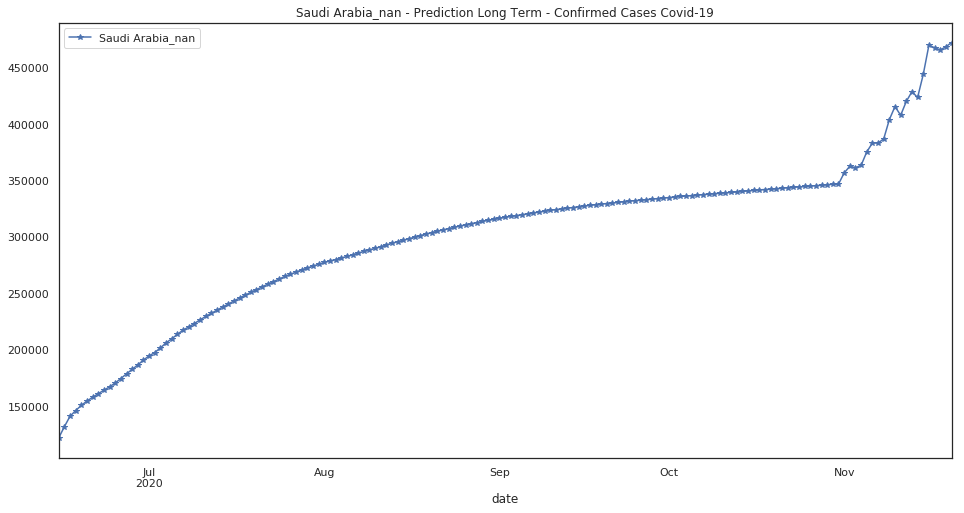

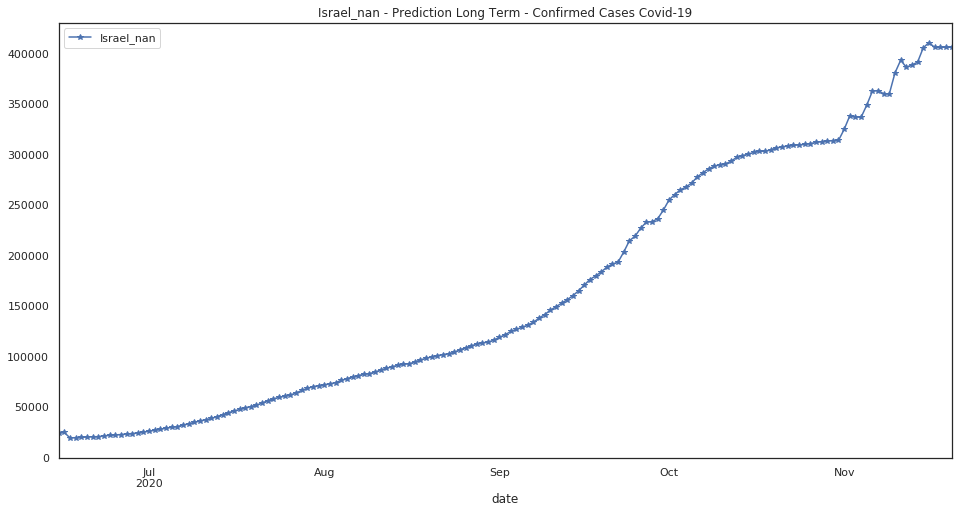

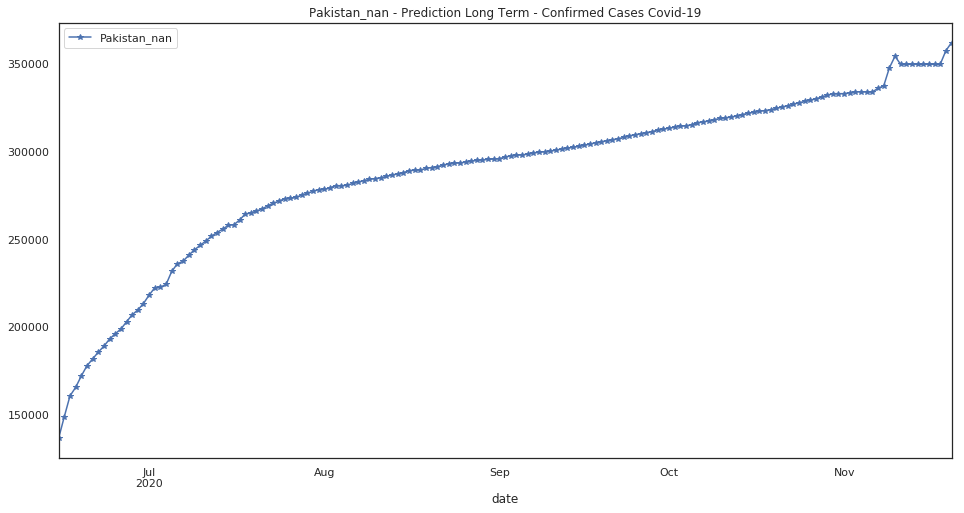

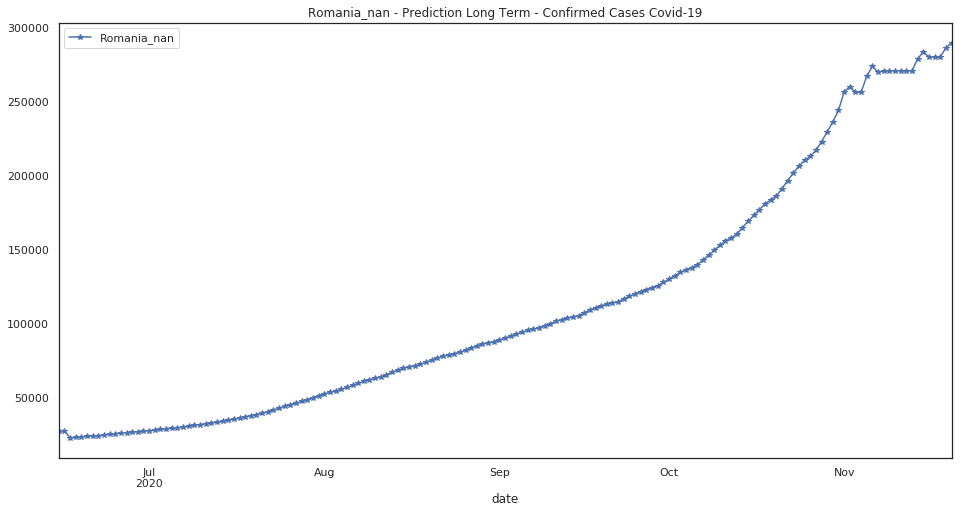

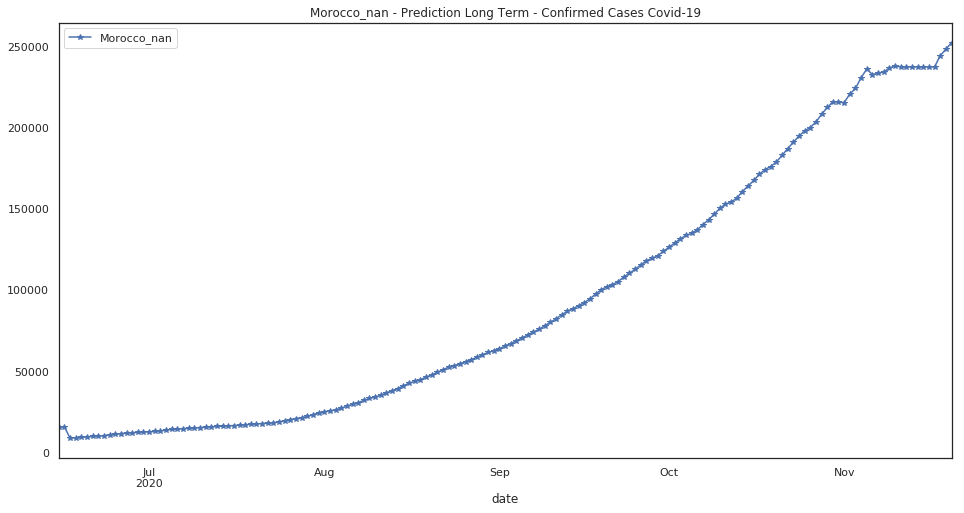

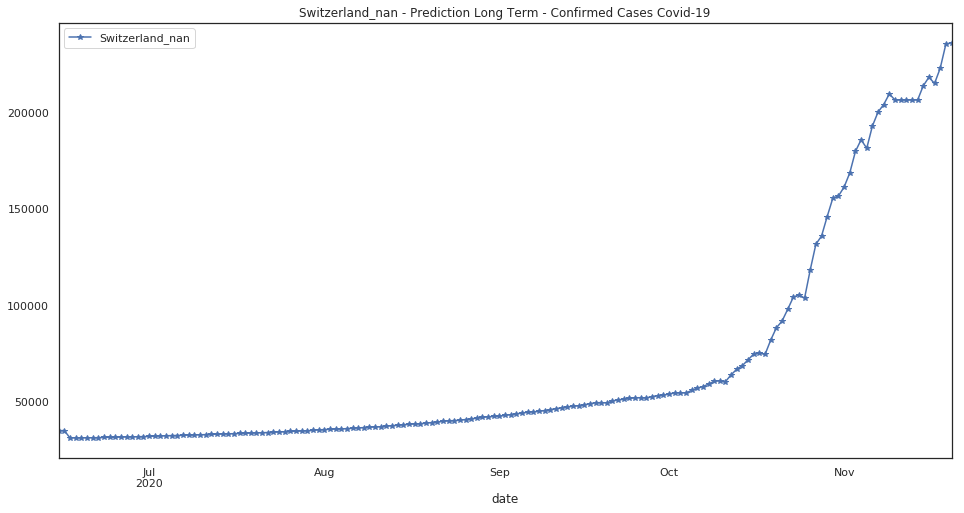

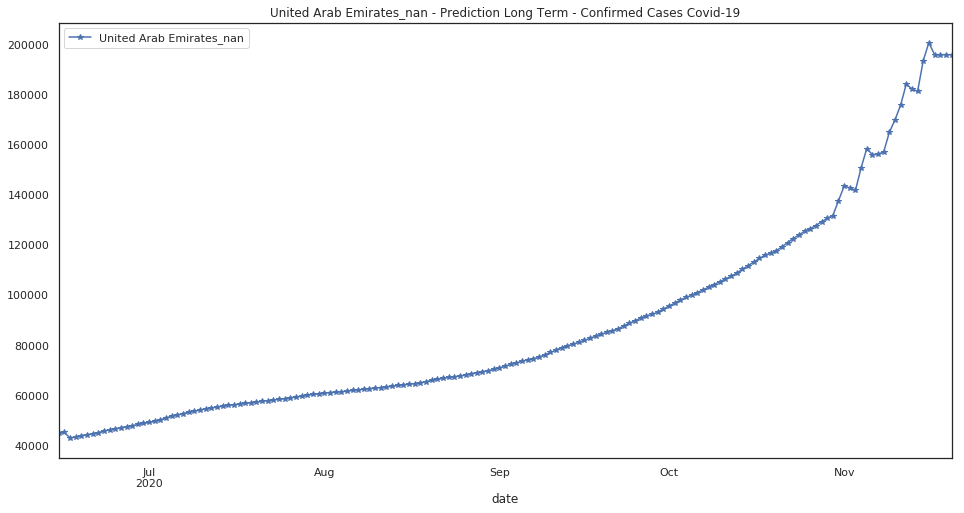

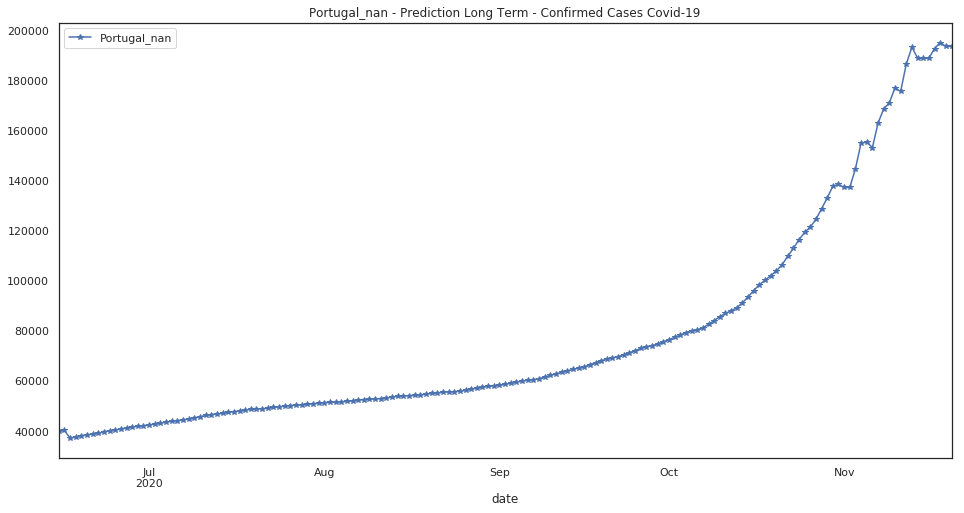

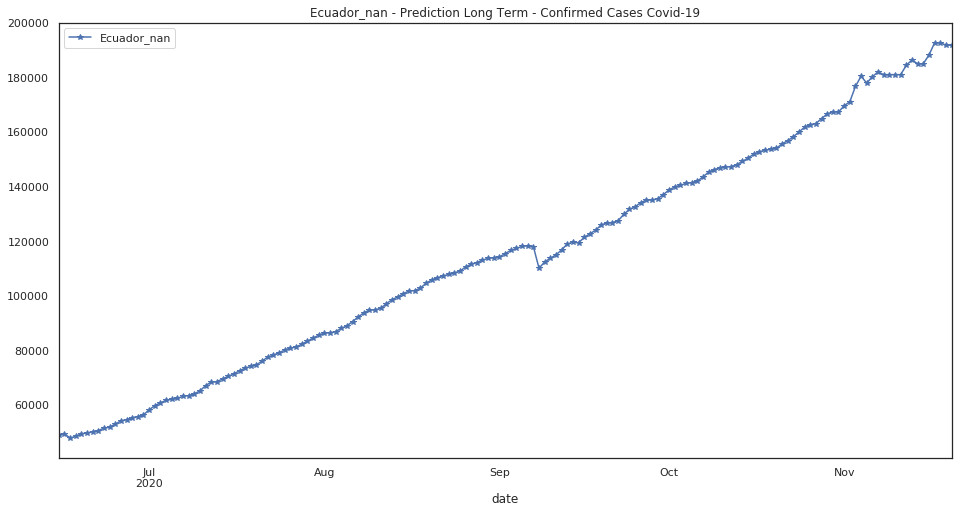

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

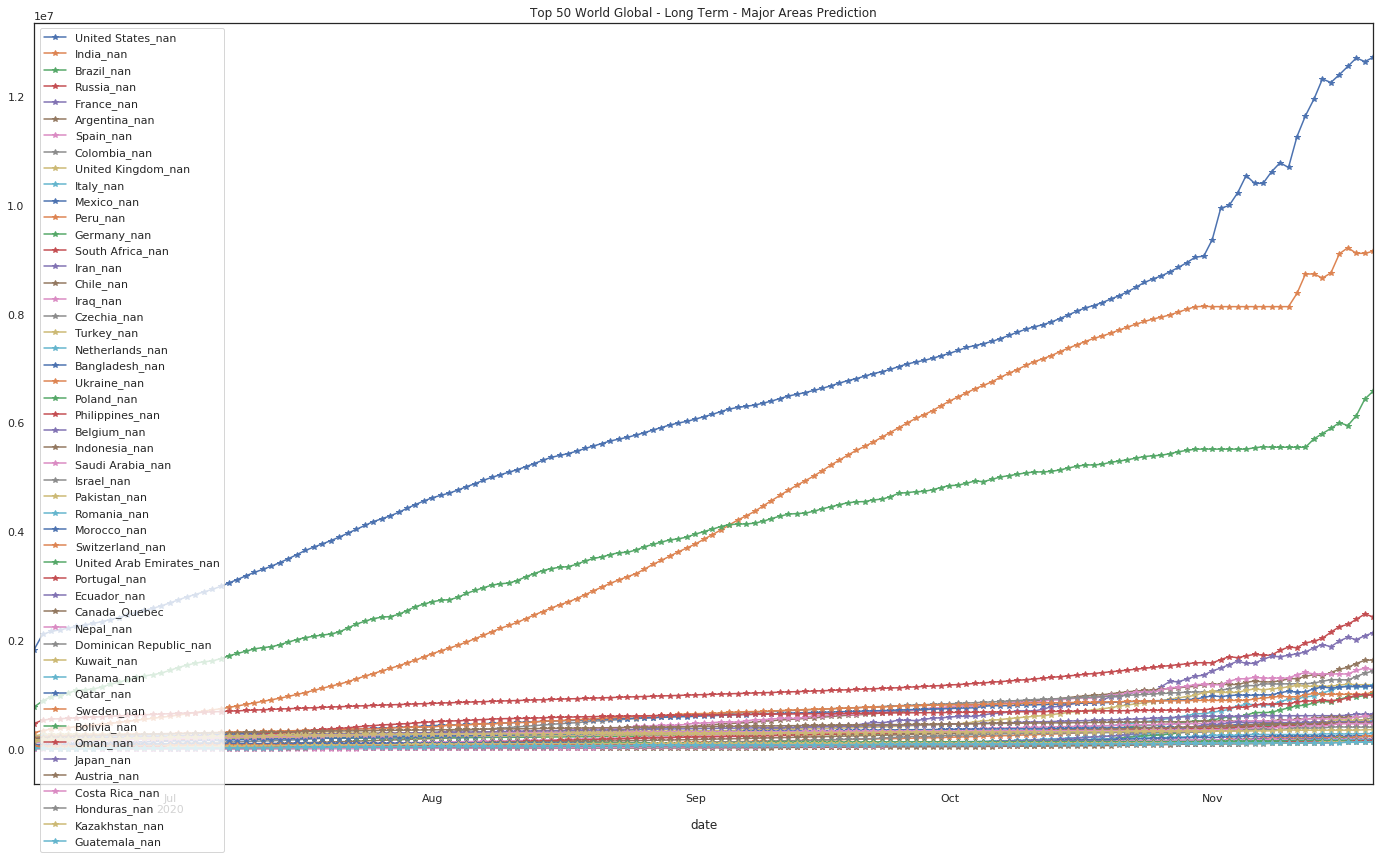

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

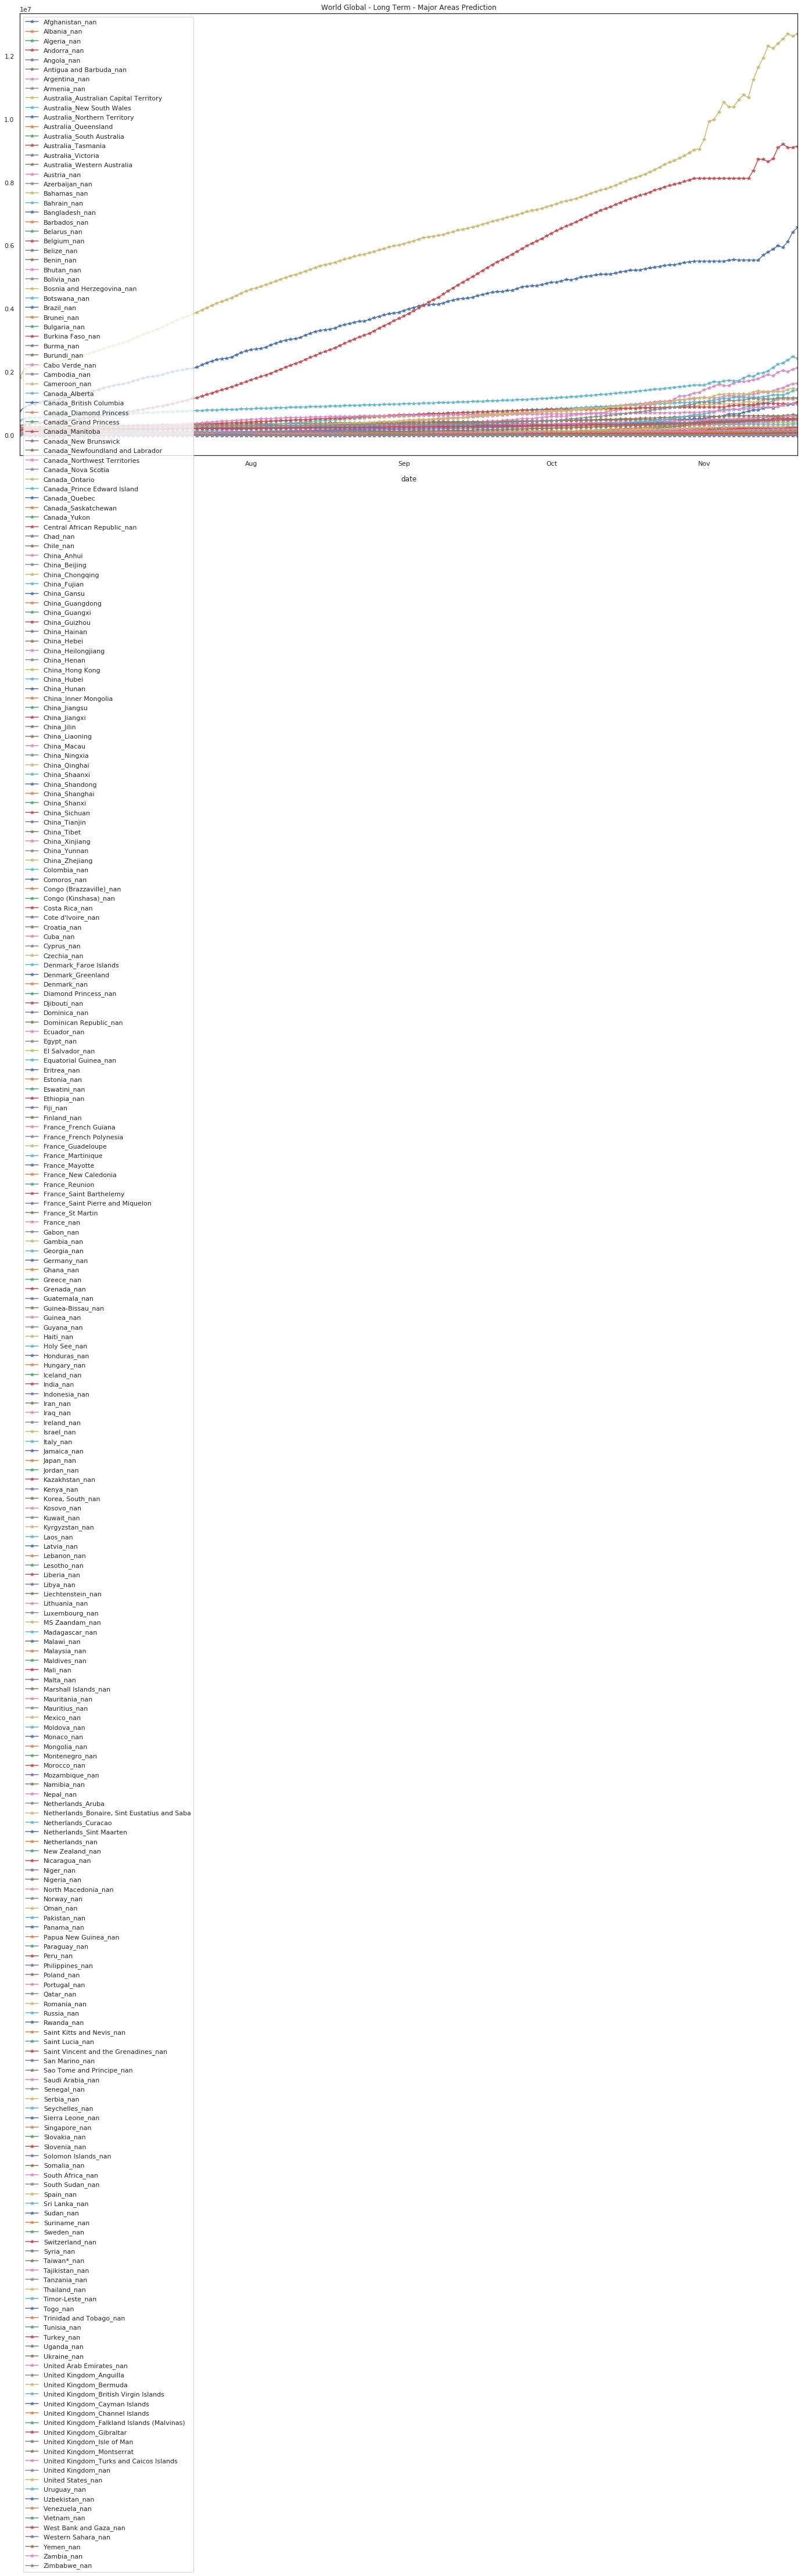

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-07-30          36609.0       5215.0      29871.0       1039.0   
2020-07-31          36729.0       5316.0      30439.0       1107.0   
2020-08-01          36788.0       5443.0      30992.0       1116.0   
2020-08-02          36775.0       5520.0      31513.0       1138.0   
2020-08-03          36801.0       5625.0      32016.0       1146.0   
2020-08-04          36845.0       5781.0      32545.0       1047.0   
2020-08-05          36890.0       5888.0      33099.0       1140.0   
2020-08-06          36958.0       6013.0      33671.0       1158.0   
2020-08-07          37073.0       6166.0      34210.0       1121.0   
2020-08-08          37133.0       6289.0      34741.0       1078.0   
2020-08-09          37123.0       6437.0      35220.0       1176.0   
2020-08-10          37209.0       6554.0      35749.0       1181.0   
2020-08-11          37336.0       6706.0      36265.0       1109.0   
2020-08-12          37415.0       6836.0      36749.0       1191.0   
2020-08-13          37487.0       6990.0      37240.0       1088.0   
2020-08-14          37505.0       7131.0      37718.0       1181.0   
2020-08-15          37597.0       7285.0      38187.0       1152.0   
2020-08-16          37673.0       7413.0      38639.0       1213.0   
2020-08-17          37666.0       7550.0      39079.0       1225.0   
2020-08-18          37660.0       7700.0      39501.0       1100.0   
2020-08-19          37661.0       7833.0      39903.0       1252.0   
2020-08-20          37884.0       7992.0      40310.0       1109.0   
2020-08-21          37999.0       8150.0      40722.0       1276.0   
2020-08-22          38012.0       8310.0      41125.0       1124.0   
2020-08-23          38064.0       8462.0      41518.0       1287.0   
2020-08-24          38116.0       8642.0      41914.0       1300.0   
2020-08-25          38138.0       8788.0      42289.0       1180.0   
2020-08-26          38170.0       8971.0      42672.0       1333.0   
2020-08-27          38194.0       9123.0      43073.0       1098.0   
2020-08-28          38204.0       9249.0      43463.0       1381.0   
...                     ...          ...          ...          ...   
2020-10-22          40700.0      18334.0      55416.0       4093.0   
2020-10-23          40759.0      18642.0      55694.0       4633.0   
2020-10-24          40825.0      18946.0      55945.0       4290.0   
2020-10-25          40897.0      19248.0      56199.0       4693.0   
2020-10-26          40992.0      19539.0      56476.0       4941.0   
2020-10-27          41096.0      19826.0      56764.0       4589.0   
2020-10-28          41205.0      20134.0      57082.0       5085.0   
2020-10-29          41331.0      20416.0      57397.0       5125.0   
2020-10-30          41406.0      20731.0      57710.0       5292.0   
2020-10-31          41403.0      20776.0      57756.0       5234.0   
2020-11-01          41390.0      20773.0      57673.0       5421.0   
2020-11-02          41391.0      20808.0      57679.0       5355.0   
2020-11-03          43124.0      20812.0      57684.0       5410.0   
2020-11-04          44076.0      20813.0      57689.0       5675.0   
2020-11-05          43748.0      20813.0      57693.0       5340.0   
2020-11-06          43678.0      20814.0      57698.0       5785.0   
2020-11-07          44248.0      20815.0      57703.0       5994.0   
2020-11-08          44478.0      21687.0      57703.0       5737.0   
2020-11-09          44327.0      21838.0      57703.0       6061.0   
2020-11-10          44327.0      22547.0      57703.0       6202.0   
2020-11-11          44354.0      22687.0      59134.0       6044.0   
2020-11-12          44358.0      22656.0      59786.0       6480.0   
2020-11-13          44358.0      22770.0      59672.0       6330.0   
2020-11-14          44358.0      23223.0      60591.0       6725.0   
2020-11-15

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
243                                Thailand_nan  15.870032  100.992541   
244                             Timor-Leste_nan  -8.874217  125.727539   
245                                    Togo_nan   8.619500    0.824800   
246                     Trinidad and Tobago_nan  10.691800  -61.222500   
247                                 Tunisia_nan  33.886917    9.537499   
248                                  Turkey_nan  38.963700   35.243300   
249                           United States_nan  40.000000 -100.000000   
250                                  Uganda_nan   1.373333   32.290275   
251                                 Ukraine_nan  48.379400   31.165600   
252                    United Arab Emirates_nan  23.424076   53.847818   
253                     United Kingdom_Anguilla  18.220600  -63.068600   
254                      United Kingdom_Bermuda  32.307800  -64.750500   
255       United Kingdom_British Virgin Islands  18.420700  -64.640000   
256               United Kingdom_Cayman Islands  19.313300  -81.254600   
257              United Kingdom_Channel Islands  49.372300   -2.364400   
258  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
259                    United Kingdom_Gibraltar  36.140800   -5.353600   
260                  United Kingdom_Isle of Man  54.236100   -4.548100   
261                   United Kingdom_Montserrat  16.742498  -62.187366   
262     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
263                          United Kingdom_nan  55.378100   -3.436000   
264                                 Uruguay_nan -32.522800  -55.765800   
265                              Uzbekistan_n

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      23               Belgium_nan  50.833300    4.469936   
4      27               Bolivia_nan -16.290200  -63.588700   
5      30                Brazil_nan -14.235000  -51.925300   
6      52             Canada_Quebec  52.939900  -73.549100   
7      57                 Chile_nan -35.675100  -71.543000   
8      91              Colombia_nan   4.570900  -74.297300   
9      95            Costa Rica_nan   9.748900  -83.753400   
10    100               Czechia_nan  49.817500   15.473000   
11    107    Dominican Republic_nan  18.735700  -70.162700   
12    108               Ecuador_nan  -1.831200  -78.183400   
13    109                 Egypt_nan  26.820553   30.802498   
14    128                France_nan  46.227600    2.213700   
15    133               Germany_nan  51.165691   10.451526   
16    137             Guatemala_nan  15.783500  -90.230800   
17    143              Honduras_nan  15.200000  -86.241900   
18    144              Honduras_nan  15.200000  -86.241900   
19    147                 India_nan  20.593684   78.962880   
20    148             Indonesia_nan  -0.789300  113.921300   
21    149                  Iran_nan  32.427908   53.688046   
22    150                  Iraq_nan  33.223191   43.679291   
23    152                Israel_nan  31.046051   34.851612   
24    153                 Italy_nan  41.871940   12.567380   
25    155                 Japan_nan  36.204824  138.252924   
26    157            Kazakhstan_nan  48.019600   66.923700   
27    161                Kuwait_nan  29.311660   47.481766   
28    183                Mexico_nan  23.634500 -102.552800   
29    188               Morocco_nan  31.791700   -7.092600   
30    191                 Nepal_nan  28.166700   84.250000   
31    196           Netherlands_nan  52.132600    5.291300   
32    203                  Oman_nan  21.512583   55.923255   
33    204              Pakistan_nan  30.375300   69.345100   
34    205                Panama_nan   8.538000  -80.782100   
35    208                  Peru_nan  -9.190000  -75.015200   
36    209           Philippines_nan  12.879721  121.774017   
37    210                Poland_nan  51.919400   19.145100   
38    211              Portugal_nan  39.399900   -8.224500   
39    212                 Qatar_nan  25.354800   51.183900   
40    213               Romania_nan  45.943200   24.966800   
41    214                Russia_nan  61.524010  105.318756   
42    221          Saudi Arabia_nan  23.885942   45.079162   
43    231          South Africa_nan -30.559500   22.937500   
44    233                 Spain_nan  40.463667   -3.749220   
45    237                Sweden_nan  60.128161   18.643501   
46    238           Switzerland_nan  46.818200    8.227500   
47    248                Turkey_nan  38.963700   35.243300   
48    249         United States_nan  40.000000 -100.000000   
49    251               Ukraine_nan  48.379400   31.165600   
50    252  United Arab Emirates_nan  23.424076   53.847818   
51    263        United Kingdom_nan  55.378100   -3.436000   

    2020-06-15 00:00:00  2020-06-16 00:00:00  2020-06-17 00:00:00  \
0               36382.0              37569.0              34819.0   
1               22864.0              22910.0              17189.0   
2               86340.0              90619.0              98416.0   
3               59977.0              60100.0              60155.0   
4               24538.0              25237.0              19883.0   
5              775357.0             888271.0             964241.0   
6               54755.0              54834.0              54146.0   
7              192671.0             213715.0             221505.0   
8               53899.0              55512.0              56473.0   
9                9569.0    

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()